In [88]:
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd

# Organizing the data into a Pandas Dataframe

### Load in SALVAGE sample

In [90]:
fpath = '/arc/projects/salvage/ALMA_reduction/samples/'
file  = 'salvage-AGN-Sep20-sample_match-lt-4rp_mrs-gt-1p5rp_res-lt-3p05_qa2-pass_no-inf-dups.txt'

objID_sample, year_sample, muid_sample, auid_sample, proj_sample, name_sample = np.loadtxt(fpath+file, unpack = True, dtype = str, usecols = [0,9,10,11,12,13])
z_sample, mass_sample, rpetro_sample, ra_sample, dec_sample, res_sample, mrs_sample, sens_sample  = np.loadtxt(fpath+file, unpack = True, dtype = float, usecols = [1,2,3,4,5,6,7,8])
K03, K01, WISE, LERG = np.loadtxt(fpath+file, unpack = True, dtype = bool, usecols = [14,15,16,17])
AGN = K01|K03|WISE|LERG

In [91]:
d = {'objID': objID_sample, 'source_name': name_sample, 'project_code': proj_sample, 'year': year_sample, 'MUID': muid_sample, 'AUID': auid_sample, \
    'ra': ra_sample, 'dec': dec_sample, 'z': z_sample, 'mstar_total': mass_sample, 'rpetro': rpetro_sample, 'MRS': mrs_sample, 'resolution': res_sample, \
    'K03_flag': K03, 'K01_flag': K01, 'WISE_flag': WISE, 'LERG_flag': LERG, 'AGN_flag': AGN}
df = pd.DataFrame(data=d)
df

objID              source_name    project_code  year  \
0    587722982291865751                   105386  2021.1.01089.S  2021   
1    587722984438235345  HATLAS_J140608.2+005501  2017.1.00025.S  2017   
2    587722984440135850               GAMA106389  2017.1.00601.S  2017   
3    587722984441250023  HATLAS_J143336.7+005042  2017.1.00025.S  2017   
4    587724197746311240            PM1_9195_3702  2019.1.00260.S  2019   
..                  ...                      ...             ...   ...   
292  588848900465950856               GAMA618935  2017.1.00601.S  2017   
293  588848900466213053               GAMA619098  2017.1.00601.S  2017   
294  588848900966449330    HOT2_EI_CII_G09.v2.48  2013.1.00530.S  2013   
295  588848900966514994    HOT2_EI_CII_G09.v2.80  2013.1.00530.S  2013   
296  588848901003346106  HATLAS_J143430.9+004133  2017.1.00025.S  2017   

                       MUID                      AUID          ra        dec  \
0     uid://A001/X15a2/X746  uid://A002/Xf73ead/X1ef2  214.120631  -0.743872   
1    uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1  211.534082   0.917440   
2     uid://A001/X1273/X70e  uid://A002/Xca525b/X1280  215.901052   1.007603   
3    uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1  218.403317   0.845238   
4    uid://A001/X1465/X34ed  uid://A002/Xe2eefc/X2470   27.842786  13.060354   
..                      ...                       ...         ...        ...   
292   uid://A001/X1273/X732  uid://A002/Xca5b1c/X6121  217.552018   0.333570   
293   uid://A001/X1273/X736  uid://A002/Xca5b1c/X5e51  218.051181   0.223245   
294    uid://A001/X147/X2e5  uid://A002/X9a5759/X13e6  134.450256   0.778145   
295    uid://A001/X147/X2e1  uid://A002/X9a5759/X168b  134.619168   0.637113   
296  uid://A001/X1284/X152c  uid://A002/Xcbdb2a/X3612  218.629700   0.692440   

            z  mstar_total   rpetro        MRS  resolution  K03_flag  \
0    0.048882     10.94580  6.57337  26.901359    2.668418     False   
1    0.071910     10.57950  2.52984  14.162201    1.041652     False   
2    0.040088     10.46760  4.06591  11.622371    1.019629     False   
3    0.069836     10.20370  1.43384  14.286183    1.055615     False   
4    0.064220     11.26600  4.64896  21.421219    1.741225      True   
..        ...          ...      ...        ...         ...       ...   
292  0.034456      9.64543  3.29034  13.041583    1.020661     False   
293  0.035564      9.30252  5.16701  13.063742    1.005473     False   
294  0.071769     10.63610  1.32740  25.690643    2.474643      True   
295  0.052361     10.89190  4.21978  23.544166    2.348117      True   
296  0.072010     10.22590  3.26406  20.030666    1.749980     False   

     K01_flag  WISE_flag  LERG_flag  AGN_flag  
0       False      False      False     False  
1       False      False      False     False  
2       False      False      False     False  
3       False      False      False     False  
4       False      False      False      True  
..        ...        ...        ...       ...  
292     False      False      False     False  
293     False      False      False     False  
294     False      False      False      True  
295     False      False      False      True  
296     False      False      False     False  

[297 rows x 18 columns]

### Load in SALVAGE masses

In [442]:
file = 'salvage-AGN-Sep25-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups_ellipap.out'

objID_masses = np.loadtxt(file, dtype = str, usecols = [0], unpack = True)
MH2_inner, MH2_outer, MH2_total, MH2_inner_err, MH2_outer_err, MH2_total_err, f_inner, f_outer = np.loadtxt(file, dtype = float, usecols = [1,2,3,4,5,6,7,8], unpack = True)

In [443]:
d21 = {'objID': objID_masses, 'MH2_total': MH2_total, 'MH2_total_err': MH2_total_err, 'MH2_inner': MH2_inner, 'MH2_inner_err': MH2_inner_err, 'MH2_outer': MH2_outer, 'MH2_outer_err': MH2_outer_err, 'f_inner': f_inner, 'f_outer': f_outer}
df21 = pd.DataFrame(data=d21)
df21

objID  MH2_total  MH2_total_err  MH2_inner  MH2_inner_err  \
0    587722982291865751   9.771375       7.776410   8.921285       6.924322   
1    587722984438235345   9.695468       8.461075   8.981036       7.705149   
2    587722984440135850   9.470133       7.544546   8.851292       6.656322   
3    587722984441250023   9.142019       8.114607   9.028279       7.623646   
4    587724197746311240  10.050489       8.225072   9.706477       7.155198   
..                  ...        ...            ...        ...            ...   
258  588848900465885460   9.688705       7.987591   9.091136       7.183154   
259  588848900465950856   8.547738       7.419129   7.987544       6.590214   
260  588848900466213053   8.615303       7.595993       -inf       6.645994   
261  588848900966449330  10.433176       8.933867   9.528312       7.468073   
262  588848901003346106   9.176568       8.365486   7.952479       7.308778   

     MH2_outer  MH2_outer_err   f_inner   f_outer  
0     9.705255       7.787402  1.000000  0.073013  
1     9.602339       8.451968  0.000000  0.000000  
2     9.350648       7.553727  0.916667  0.053456  
3     8.504517       8.105717  0.000000  0.000000  
4     9.788568       8.235096  1.000000  0.010094  
..         ...            ...       ...       ...  
258   9.562260       8.000238  0.783333  0.014801  
259   8.407897       7.431404  0.616667  0.007777  
260   8.653717       7.603226  0.000000  0.000000  
261  10.375436       8.936242  1.000000  0.168161  
262   9.149838       8.364785  0.000000  0.000000  

[263 rows x 9 columns]

In [94]:
df3 = df.set_index('objID').join(df2.set_index('objID'), on = 'objID')
df3

source_name    project_code  year  \
objID                                                               
587722982291865751                   105386  2021.1.01089.S  2021   
587722984438235345  HATLAS_J140608.2+005501  2017.1.00025.S  2017   
587722984440135850               GAMA106389  2017.1.00601.S  2017   
587722984441250023  HATLAS_J143336.7+005042  2017.1.00025.S  2017   
587724197746311240            PM1_9195_3702  2019.1.00260.S  2019   
...                                     ...             ...   ...   
588848900465950856               GAMA618935  2017.1.00601.S  2017   
588848900466213053               GAMA619098  2017.1.00601.S  2017   
588848900966449330    HOT2_EI_CII_G09.v2.48  2013.1.00530.S  2013   
588848900966514994    HOT2_EI_CII_G09.v2.80  2013.1.00530.S  2013   
588848901003346106  HATLAS_J143430.9+004133  2017.1.00025.S  2017   

                                      MUID                      AUID  \
objID                                                                  
587722982291865751   uid://A001/X15a2/X746  uid://A002/Xf73ead/X1ef2   
587722984438235345  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587722984440135850   uid://A001/X1273/X70e  uid://A002/Xca525b/X1280   
587722984441250023  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587724197746311240  uid://A001/X1465/X34ed  uid://A002/Xe2eefc/X2470   
...                                    ...                       ...   
588848900465950856   uid://A001/X1273/X732  uid://A002/Xca5b1c/X6121   
588848900466213053   uid://A001/X1273/X736  uid://A002/Xca5b1c/X5e51   
588848900966449330    uid://A001/X147/X2e5  uid://A002/X9a5759/X13e6   
588848900966514994    uid://A001/X147/X2e1  uid://A002/X9a5759/X168b   
588848901003346106  uid://A001/X1284/X152c  uid://A002/Xcbdb2a/X3612   

                            ra        dec         z  mstar_total   rpetro  \
objID                                                                       
587722982291865751  214.120631  -0.743872  0.048882     10.94580  6.57337   
587722984438235345  211.534082   0.917440  0.071910     10.57950  2.52984   
587722984440135850  215.901052   1.007603  0.040088     10.46760  4.06591   
587722984441250023  218.403317   0.845238  0.069836     10.20370  1.43384   
587724197746311240   27.842786  13.060354  0.064220     11.26600  4.64896   
...                        ...        ...       ...          ...      ...   
588848900465950856  217.552018   0.333570  0.034456      9.64543  3.29034   
588848900466213053  218.051181   0.223245  0.035564      9.30252  5.16701   
588848900966449330  134.450256   0.778145  0.071769     10.63610  1.32740   
588848900966514994  134.619168   0.637113  0.052361     10.89190  4.21978   
588848901003346106  218.629700   0.692440  0.072010     10.22590  3.26406   

                    ...  LERG_flag  AGN_flag  MH2_total  MH2_total_err  \
objID               ...                                                  
587722982291865751  ...      False     False   8.921285       6.924322   
587722984438235345  ...      False     False   8.981036       7.705149   
587722984440135850  ...      False     False   8.851292       6.656322   
587722984441250023  ...      False     False   9.028279       7.623646   
587724197746311240  ...      False      True   9.706477       7.155198   
...                 ...        ...       ...        ...            ...   
588848900465950856  ...      False     False   7.987544       6.590214   
588848900466213053  ...      False     False       -inf       6.645994   
588848900966449330  ...      False      True   9.528312       7.468073   
588848900966514994  ...      False      True        NaN            NaN   
588848901003346106  ...      False     False   7.952479       7.308778   

                    MH2_inner  MH2_inner_err  MH2_outer  MH2_outer_err  \
objID                                                                    
587722982291865751   9.705255       7.787402   9.771375       7.776410   
5877229844

In [95]:
# adding my own higher order columns

df3['fgas_total'] = 10**df3['MH2_total'] / (10**df3['MH2_total'] + 10**df3['mstar_total'])

df3['Nsigma_total'] = 10**df3['MH2_total'] / 10**df3['MH2_total_err']

In [96]:
df3

source_name    project_code  year  \
objID                                                               
587722982291865751                   105386  2021.1.01089.S  2021   
587722984438235345  HATLAS_J140608.2+005501  2017.1.00025.S  2017   
587722984440135850               GAMA106389  2017.1.00601.S  2017   
587722984441250023  HATLAS_J143336.7+005042  2017.1.00025.S  2017   
587724197746311240            PM1_9195_3702  2019.1.00260.S  2019   
...                                     ...             ...   ...   
588848900465950856               GAMA618935  2017.1.00601.S  2017   
588848900466213053               GAMA619098  2017.1.00601.S  2017   
588848900966449330    HOT2_EI_CII_G09.v2.48  2013.1.00530.S  2013   
588848900966514994    HOT2_EI_CII_G09.v2.80  2013.1.00530.S  2013   
588848901003346106  HATLAS_J143430.9+004133  2017.1.00025.S  2017   

                                      MUID                      AUID  \
objID                                                                  
587722982291865751   uid://A001/X15a2/X746  uid://A002/Xf73ead/X1ef2   
587722984438235345  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587722984440135850   uid://A001/X1273/X70e  uid://A002/Xca525b/X1280   
587722984441250023  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587724197746311240  uid://A001/X1465/X34ed  uid://A002/Xe2eefc/X2470   
...                                    ...                       ...   
588848900465950856   uid://A001/X1273/X732  uid://A002/Xca5b1c/X6121   
588848900466213053   uid://A001/X1273/X736  uid://A002/Xca5b1c/X5e51   
588848900966449330    uid://A001/X147/X2e5  uid://A002/X9a5759/X13e6   
588848900966514994    uid://A001/X147/X2e1  uid://A002/X9a5759/X168b   
588848901003346106  uid://A001/X1284/X152c  uid://A002/Xcbdb2a/X3612   

                            ra        dec         z  mstar_total   rpetro  \
objID                                                                       
587722982291865751  214.120631  -0.743872  0.048882     10.94580  6.57337   
587722984438235345  211.534082   0.917440  0.071910     10.57950  2.52984   
587722984440135850  215.901052   1.007603  0.040088     10.46760  4.06591   
587722984441250023  218.403317   0.845238  0.069836     10.20370  1.43384   
587724197746311240   27.842786  13.060354  0.064220     11.26600  4.64896   
...                        ...        ...       ...          ...      ...   
588848900465950856  217.552018   0.333570  0.034456      9.64543  3.29034   
588848900466213053  218.051181   0.223245  0.035564      9.30252  5.16701   
588848900966449330  134.450256   0.778145  0.071769     10.63610  1.32740   
588848900966514994  134.619168   0.637113  0.052361     10.89190  4.21978   
588848901003346106  218.629700   0.692440  0.072010     10.22590  3.26406   

                    ...  MH2_total  MH2_total_err  MH2_inner  MH2_inner_err  \
objID               ...                                                       
587722982291865751  ...   8.921285       6.924322   9.705255       7.787402   
587722984438235345  ...   8.981036       7.705149   9.602339       8.451968   
587722984440135850  ...   8.851292       6.656322   9.350648       7.553727   
587722984441250023  ...   9.028279       7.623646   8.504517       8.105717   
587724197746311240  ...   9.706477       7.155198   9.788568       8.235096   
...                 ...        ...            ...        ...            ...   
588848900465950856  ...   7.987544       6.590214   8.407897       7.431404   
588848900466213053  ...       -inf       6.645994   8.653717       7.603226   
588848900966449330  ...   9.528312       7.468073  10.375436       8.936242   
588848900966514994  ...        NaN            NaN        NaN            NaN   
588848901003346106  ...   7.952479       7.308778   9.149838       8.364785   

                    MH2_outer  MH2_outer_err   f_inner   f_outer  fgas_total  \
objID                                                                          
5877229

### Load in SALVAGE classifications

In [97]:
file = 'SALVAGE-MORPHCLASS.rtf'

objID_classes, Class = np.loadtxt(file, dtype = str, unpack = True)

In [98]:
d4 = {'objID': objID_classes, 'visual_class': Class}
df4 = pd.DataFrame(data=d4)
df4

objID visual_class
0    587722982291865751            M
1    587722984438235345            N
2    587722984440135850            N
3    587722984441250023            N
4    587724197746311240            M
..                  ...          ...
285  588848900465950856            N
286  588848900466213053            N
287  588848900966449330            M
288  588848900966514994            N
289  588848901003346106            N

[290 rows x 2 columns]

In [99]:
df5 = df3.join(df4.set_index('objID'), on = 'objID')

In [100]:
df5

source_name    project_code  year  \
objID                                                               
587722982291865751                   105386  2021.1.01089.S  2021   
587722984438235345  HATLAS_J140608.2+005501  2017.1.00025.S  2017   
587722984440135850               GAMA106389  2017.1.00601.S  2017   
587722984441250023  HATLAS_J143336.7+005042  2017.1.00025.S  2017   
587724197746311240            PM1_9195_3702  2019.1.00260.S  2019   
...                                     ...             ...   ...   
588848900465950856               GAMA618935  2017.1.00601.S  2017   
588848900466213053               GAMA619098  2017.1.00601.S  2017   
588848900966449330    HOT2_EI_CII_G09.v2.48  2013.1.00530.S  2013   
588848900966514994    HOT2_EI_CII_G09.v2.80  2013.1.00530.S  2013   
588848901003346106  HATLAS_J143430.9+004133  2017.1.00025.S  2017   

                                      MUID                      AUID  \
objID                                                                  
587722982291865751   uid://A001/X15a2/X746  uid://A002/Xf73ead/X1ef2   
587722984438235345  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587722984440135850   uid://A001/X1273/X70e  uid://A002/Xca525b/X1280   
587722984441250023  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587724197746311240  uid://A001/X1465/X34ed  uid://A002/Xe2eefc/X2470   
...                                    ...                       ...   
588848900465950856   uid://A001/X1273/X732  uid://A002/Xca5b1c/X6121   
588848900466213053   uid://A001/X1273/X736  uid://A002/Xca5b1c/X5e51   
588848900966449330    uid://A001/X147/X2e5  uid://A002/X9a5759/X13e6   
588848900966514994    uid://A001/X147/X2e1  uid://A002/X9a5759/X168b   
588848901003346106  uid://A001/X1284/X152c  uid://A002/Xcbdb2a/X3612   

                            ra        dec         z  mstar_total   rpetro  \
objID                                                                       
587722982291865751  214.120631  -0.743872  0.048882     10.94580  6.57337   
587722984438235345  211.534082   0.917440  0.071910     10.57950  2.52984   
587722984440135850  215.901052   1.007603  0.040088     10.46760  4.06591   
587722984441250023  218.403317   0.845238  0.069836     10.20370  1.43384   
587724197746311240   27.842786  13.060354  0.064220     11.26600  4.64896   
...                        ...        ...       ...          ...      ...   
588848900465950856  217.552018   0.333570  0.034456      9.64543  3.29034   
588848900466213053  218.051181   0.223245  0.035564      9.30252  5.16701   
588848900966449330  134.450256   0.778145  0.071769     10.63610  1.32740   
588848900966514994  134.619168   0.637113  0.052361     10.89190  4.21978   
588848901003346106  218.629700   0.692440  0.072010     10.22590  3.26406   

                    ...  MH2_total_err  MH2_inner  MH2_inner_err  MH2_outer  \
objID               ...                                                       
587722982291865751  ...       6.924322   9.705255       7.787402   9.771375   
587722984438235345  ...       7.705149   9.602339       8.451968   9.695468   
587722984440135850  ...       6.656322   9.350648       7.553727   9.470133   
587722984441250023  ...       7.623646   8.504517       8.105717   9.142019   
587724197746311240  ...       7.155198   9.788568       8.235096  10.050489   
...                 ...            ...        ...            ...        ...   
588848900465950856  ...       6.590214   8.407897       7.431404   8.547738   
588848900466213053  ...       6.645994   8.653717       7.603226   8.615303   
588848900966449330  ...       7.468073  10.375436       8.936242  10.433176   
588848900966514994  ...            NaN        NaN            NaN        NaN   
588848901003346106  ...       7.308778   9.149838       8.364785   9.176568   

                    MH2_outer_err   f_inner   f_outer  fgas_total  \
objID                                                               
587722982291865751       7.77

In [129]:
#Query MySQL
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')

x = 'SELECT u.objID, u.total_mass_med, u.fiber_mass_med, u.total_sfr_med, u.fiber_sfr_med, u.z_spec, \
            u.agn_sn, u.new_K03_flag, u.new_K01_flag, e.Halpha_flux, e.Halpha_cont, w.W1, w.W2, w.W1_sn, w.W2_sn, e.Hbeta_flux, e.Hbeta_flux_err, e.OIII_5007_flux, e.OIII_5007_flux_err, NII_flux, NII_flux_err, m.incd, u.vdisp\
    FROM dr7_uberuber u, dr7_emmlines e, dr7_unwise w, sdss_dr7_morph_mybkg_mydeblend_sersic_gr_pub2011 m WHERE u.objID = e.objID AND u.objID = w.objID AND u.objID = m.objID AND u.total_mass_med>5'

c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
db_data = np.array(db_data, dtype = str).T

table_id = db_data[0]

# inner and outer masses
mass_tot = np.array(db_data[1], dtype = float)
mass_fib = np.array(db_data[2], dtype = float)
sfr_tot = np.array(db_data[3], dtype = float)
sfr_fib = np.array(db_data[4], dtype = float)
mass_out = np.log10(10**mass_tot - 10**mass_fib)
sfr_out = np.log10(10**sfr_tot - 10**sfr_fib)

# spectroscopic redshift
z_sdss = np.array(db_data[5], dtype = float)

# Optical AGN classifications
agn_sn = np.array(db_data[6], dtype = str)
agn_sn[agn_sn=='None'] = -1
agn_sn = np.array(agn_sn, dtype = float)
K03 = np.array(db_data[7], dtype = str)
K01 = np.array(db_data[8], dtype = str)

# Ha flux
Ha_flux = np.array(db_data[9], dtype = float)
Ha_cont  = np.array(db_data[10], dtype = float)
Ha_eqw = Ha_flux/Ha_cont

# Mid-IR AGN Classifications
W1 = np.array(db_data[11], dtype = str)
W2 = np.array(db_data[12], dtype = str)
W1_sn = np.array(db_data[13], dtype = str)
W2_sn = np.array(db_data[14], dtype = str)
W1[W1=='None'] = -1
W2[W2=='None'] = -1
W1_sn[W1_sn=='None'] = -1
W2_sn[W2_sn=='None'] = -1
W1 = np.array(W1, dtype = float)
W2 = np.array(W2, dtype = float)
W1_sn = np.array(W1_sn, dtype = float)
W2_sn = np.array(W2_sn, dtype = float)

# other emission lines (MW corrected!)
Hb_flux        = np.array(db_data[15], dtype = float)
Hb_err    = np.array(db_data[16], dtype = float)
OIII_flux      = np.array(db_data[17], dtype = float)
OIII_err  = np.array(db_data[18], dtype = float)
NII_flux       = np.array(db_data[19], dtype = float)
NII_err   = np.array(db_data[20], dtype = float)

# orientation
incl = np.array(db_data[21], dtype = str)
incl[incl=='None'] = -1
incl = np.array(incl, dtype = float)

# velocity dispersion
vdisp = np.array(db_data[22], dtype = float)

/tmp/ipykernel_13711/1435083165.py:24: RuntimeWarning: divide by zero encountered in log10
  mass_out = np.log10(10**mass_tot - 10**mass_fib)
/tmp/ipykernel_13711/1435083165.py:24: RuntimeWarning: invalid value encountered in log10
  mass_out = np.log10(10**mass_tot - 10**mass_fib)
/tmp/ipykernel_13711/1435083165.py:25: RuntimeWarning: invalid value encountered in log10
  sfr_out = np.log10(10**sfr_tot - 10**sfr_fib)
/tmp/ipykernel_13711/1435083165.py:40: RuntimeWarning: invalid value encountered in divide
  Ha_eqw = Ha_flux/Ha_err
/tmp/ipykernel_13711/1435083165.py:64: RuntimeWarning: invalid value encountered in divide
  Hb_eqw = Hb_flux/Hb_err
/tmp/ipykernel_13711/1435083165.py:65: RuntimeWarning: invalid value encountered in divide
  OIII_eqw = OIII_flux/OIII_err
/tmp/ipykernel_13711/1435083165.py:66: RuntimeWarning: invalid value encountered in divide
  NII_eqw = NII_flux/NII_err


In [298]:
#Query MySQL
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')

x = 'SELECT u.objID, u.total_mass_med, u.fiber_mass_med, u.total_sfr_med, u.fiber_sfr_med, u.z_spec, e.Halpha_flux, e.Halpha_cont, e.Hbeta_flux, e.Hbeta_flux_err, e.OIII_5007_flux, e.OIII_5007_flux_err, NII_flux, NII_flux_err, m.incd\
    FROM dr7_uberuber u, dr7_emmlines e, sdss_dr7_morph_mybkg_mydeblend_sersic_gr_pub2011 m WHERE u.objID = e.objID AND u.objID = m.objID AND u.total_mass_med>5'

c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
db_data = np.array(db_data, dtype = str).T

table_id = db_data[0]

# inner and outer masses
mass_tot = np.array(db_data[1], dtype = float)
mass_fib = np.array(db_data[2], dtype = float)
sfr_tot = np.array(db_data[3], dtype = float)
sfr_fib = np.array(db_data[4], dtype = float)
mass_out = np.log10(10**mass_tot - 10**mass_fib)
sfr_out = np.log10(10**sfr_tot - 10**sfr_fib)

# spectroscopic redshift
z_sdss = np.array(db_data[5], dtype = float)

# Ha flux
Ha_flux = np.array(db_data[6], dtype = float)
Ha_cont  = np.array(db_data[7], dtype = float)
Ha_eqw = Ha_flux/Ha_cont

# other emission lines (MW corrected!)
Hb_flux   = np.array(db_data[8], dtype = float)
Hb_err    = np.array(db_data[9], dtype = float)
OIII_flux = np.array(db_data[10], dtype = float)
OIII_err  = np.array(db_data[11], dtype = float)
NII_flux  = np.array(db_data[12], dtype = float)
NII_err   = np.array(db_data[12], dtype = float)

# orientation
incl = np.array(db_data[13], dtype = str)
incl[incl=='None'] = -1
incl = np.array(incl, dtype = float)

KeyboardInterrupt: 

In [325]:

#Query MySQL
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')

x = 'SELECT e.objID, e.Halpha_flux, e.Halpha_cont FROM dr7_emmlines e'

c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
db_data = np.array(db_data, dtype = str).T

table_id = db_data[0]

# Ha flux
Ha_flux = np.array(db_data[1], dtype = float)
Ha_cont  = np.array(db_data[2], dtype = float)
Ha_eqw = Ha_flux/Ha_cont


/tmp/ipykernel_13711/3913541215.py:20: RuntimeWarning: divide by zero encountered in divide
  Ha_eqw = Ha_flux/Ha_cont
/tmp/ipykernel_13711/3913541215.py:20: RuntimeWarning: invalid value encountered in divide
  Ha_eqw = Ha_flux/Ha_cont


In [300]:
d6['Ha_eqw'] = -Ha_eqw

(array([2.62000e+02, 3.34000e+02, 5.14000e+02, 8.55000e+02, 1.37900e+03,
        2.95900e+03, 7.33600e+03, 2.41540e+04, 9.23380e+04, 5.31003e+05,
        2.05900e+04, 4.00000e+01, 2.10000e+01, 1.20000e+01, 1.20000e+01,
        6.00000e+00, 7.00000e+00, 7.00000e+00, 5.00000e+00, 6.00000e+00]),
 array([-200., -180., -160., -140., -120., -100.,  -80.,  -60.,  -40.,
         -20.,    0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,
         160.,  180.,  200.]),
 <BarContainer object of 20 artists>)

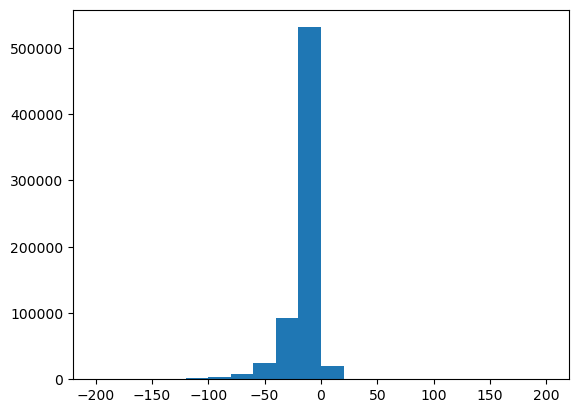

In [319]:
plt.hist(d6['Ha_eqw'], range = [-200, 200], bins = 20)

# add to dataframe

In [159]:
d6 = {'objID': table_id, 'mstar_inner': mass_fib, 'sfr_inner': sfr_fib, 'mstar_outer': mass_out, 'sfr_outer': sfr_out, \
      'Ha_flux': Ha_flux, 'Hb_flux': Hb_flux, 'OIII_flux': OIII_flux, 'NII_flux': NII_flux, 'Ha_eqw': -Ha_eqw, 'incl': incl, \
      'W1': W1, 'W2': W2, 'K03_lauca': K03, 'K01_lauca': K01, 'agn_sn': agn_sn, 'vdisp': vdisp}
df6 = pd.DataFrame(data=d6)
df6

objID  mstar_inner  sfr_inner  mstar_outer  sfr_outer  \
0       587722953304310243      9.47997  -1.603380     9.992561  -1.164663   
1       587722953304310184     10.34830  -1.535400    10.667324  -0.877563   
2       587722953304310091     10.26990  -0.228897    10.211691  -0.973782   
3       587722953304179134     10.59850  -0.027715    11.102010  -0.567031   
4       587722953304179097      9.71313   0.118628    10.280915   0.618732   
...                    ...          ...        ...          ...        ...   
674219  588848900972413059      9.92884   0.398303    10.345415   0.379927   
674220  588848900972150967     10.71910  -1.317530    11.092810  -0.732465   
674221  588848900972281999      9.30709  -0.603690     9.632285   0.016902   
674222  588848900972282016     10.74400  -1.280890    11.229687  -0.527753   
674223  588848900972282040     10.49690  -1.496090    10.806570  -1.154289   

         Ha_flux   Hb_flux  OIII_flux  NII_flux     Ha_eqw    incl         W1  \
0        47.9913   6.13819    5.30474  30.27300 -23.728585  47.455  12.965566   
1        16.9953   3.03558    6.37644  16.02380  -7.238912  66.774  13.428092   
2        61.4287   4.73889   19.69090  74.45400 -12.960270  56.930  14.230101   
3        37.6216   4.50046  676.71100   6.31903  -6.131191  46.329  12.950433   
4       183.6090  42.96280   18.64760  62.23580 -60.592230  41.835  14.074845   
...          ...       ...        ...       ...        ...     ...        ...   
674219  234.9540  53.53410   14.18540  80.64310 -72.264188  53.838  14.364127   
674220   24.4224   2.23851    4.53037  14.76770  -4.505945  56.326  13.799143   
674221  255.3860  79.70150   46.05840  81.54810 -76.303870  32.273  14.877636   
674222   10.1353   8.75187   -5.99466   6.18492  -2.970695  26.675  13.109364   
674223   22.2858  11.55060   16.88920  50.50240  -5.428147  83.129  13.082797   

               W2 K03_lauca K01_lauca    agn_sn     vdisp  
0       12.901688       AGN        SF   1.70629   122.729  
1       13.282893      NULL      NULL  -1.00000   135.416  
2       14.015929      NULL      NULL  -1.00000   177.879  
3       12.815365      NULL      NULL  -1.00000   222.414  
4       13.974850        SF        SF   2.89088 -9999.000  
...           ...       ...       ...       ...       ...  
674219  14.213073        SF        SF   4.10051 -9999.000  
674220  13.599174      NULL      NULL  -1.00000   149.139  
674221  14.636757        SF        SF  11.49850 -9999.000  
674222  12.981295      NULL      NULL  -1.00000 -9999.000  
674223  13.060726       AGN       AGN   1.59817   178.915  

[674224 rows x 17 columns]

In [102]:
d6 = {'objID': table_id, 'mstar_inner': mass_fib, 'sfr_inner': sfr_fib, 'mstar_outer': mass_out, 'sfr_outer': sfr_out, \
      'Ha_flux': Ha_flux, 'Hb_flux': Hb_flux, 'OIII_flux': OIII_flux, 'NII_flux': NII_flux, 'Ha_eqw': -Ha_eqw, 'incl': incl}
df6 = pd.DataFrame(data=d6)
df6

objID  mstar_inner  sfr_inner  mstar_outer  sfr_outer  \
0       587722953304310243      9.47997  -1.603380     9.992561  -1.164663   
1       587722953304310184     10.34830  -1.535400    10.667324  -0.877563   
2       587722953304310091     10.26990  -0.228897    10.211691  -0.973782   
3       587722953304179134     10.59850  -0.027715    11.102010  -0.567031   
4       587722953304179097      9.71313   0.118628    10.280915   0.618732   
...                    ...          ...        ...          ...        ...   
674630  588848900972413059      9.92884   0.398303    10.345415   0.379927   
674631  588848900972150967     10.71910  -1.317530    11.092810  -0.732465   
674632  588848900972281999      9.30709  -0.603690     9.632285   0.016902   
674633  588848900972282016     10.74400  -1.280890    11.229687  -0.527753   
674634  588848900972282040     10.49690  -1.496090    10.806570  -1.154289   

         Ha_flux   Hb_flux  OIII_flux  NII_flux     Ha_eqw     incl  
0        47.9913   6.13819    5.30474  30.27300  -2.498688  1.98403  
1        16.9953   3.03558    6.37644  16.02380  -0.787359  2.36684  
2        61.4287   4.73889   19.69090  74.45400  -4.105017  3.84420  
3        37.6216   4.50046  676.71100   6.31903  -1.496388  2.12761  
4       183.6090  42.96280   18.64760  62.23580 -24.907551  2.24980  
...          ...       ...        ...       ...        ...      ...  
674630  234.9540  53.53410   14.18540  80.64310 -33.268906  2.56272  
674631   24.4224   2.23851    4.53037  14.76770  -2.046507  3.63875  
674632  255.3860  79.70150   46.05840  81.54810 -32.992666  2.07859  
674633   10.1353   8.75187   -5.99466   6.18492  -0.402832  2.56422  
674634   22.2858  11.55060   16.88920  50.50240  -0.731548  5.06028  

[674635 rows x 11 columns]

In [301]:
df7 = df5.join(df6.set_index('objID'), on = 'objID')

In [302]:
# adding my own columns

df7['fgas_inner'] = 10**df7['MH2_inner'] / (10**df7['MH2_inner'] + 10**df7['mstar_inner'])
df7['fgas_outer'] = 10**df7['MH2_outer'] / (10**df7['MH2_outer'] + 10**df7['mstar_outer'])

df7['Nsigma_inner'] = 10**df7['MH2_inner'] / 10**df7['MH2_inner_err']
df7['Nsigma_outer'] = 10**df7['MH2_outer'] / 10**df7['MH2_outer_err']

## adding lauca Heqw 

In [305]:
#Query MySQL
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')

x = 'SELECT H.objID, H.Halpha_EW, H.Halpha_EW_err, u.specObjID FROM Heqw H, dr7_uberuber u WHERE u.objID = H.objID'

c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
db_data = np.array(db_data, dtype = str).T

table_id = db_data[0]
specObjID = db_data[3]

# inner and outer masses
Ha_eqw_lauca = np.array(db_data[1], dtype = float)
Ha_eqw_lauca_err = np.array(db_data[2], dtype = float)


In [306]:
d8 = {'objID': table_id, 'Ha_eqw_lauca': Ha_eqw_lauca, 'Ha_eqw_lauca_err': Ha_eqw_lauca_err}
df8 = pd.DataFrame(data=d8)
df8

objID  Ha_eqw_lauca  Ha_eqw_lauca_err
0       587728947973193882    -31.544200          0.461838
1       588848898825191654     -4.518860          0.121219
2       588848898825191592     -2.147520          0.164247
3       587728947973259495     -8.461630          0.119494
4       588848898825191586     -1.078230          0.187023
...                    ...           ...               ...
335757  587736541491429758     -0.775421          0.157874
335758  587736541491298661     -0.058964          0.211469
335759  587736542564975177      0.053487          0.176766
335760  588017991778042178     -0.326158          0.178165
335761  588017991777976727    -20.471400          0.232496

[335762 rows x 3 columns]

In [307]:
df9 = df7.join(df8.set_index('objID'), on = 'objID')

## Adding SDSS-queried Ha_eqw

In [253]:
specObjID_query = np.loadtxt('eqws_swilkinson.csv', unpack = True, delimiter = ',', dtype = str, usecols = [0], skiprows = 1)

Ha_eqw_query, ewErr_query, sigma_query, cont_query, wavelength_query, chisq_query, restwave_query, z_query = np.loadtxt('eqws_swilkinson.csv', unpack = True, delimiter = ',', usecols = [1,2,3,4,5,6,7,8], skiprows = 1)

In [254]:
specObjID_query_matched = []
Ha_eqw_query_matched = []
ewErr_query_matched = []

for i in range(len(table_id)):
    
    matches = specObjID_query == specObjID[i]
    
    #print(len(Ha_eqw_query[matches]))
    
    if len(specObjID_query[matches]) < 1:
        
        specObjID_query_matched.append(-8888)
        Ha_eqw_query_matched.append(-8888)
        ewErr_query_matched.append(-8888)
        
        continue
    
    best_match = chisq_query[matches] == np.min(chisq_query[matches])
    
    specObjID_query_matched.append(specObjID_query[matches][best_match][0])
    Ha_eqw_query_matched.append(Ha_eqw_query[matches][best_match][0])
    ewErr_query_matched.append(ewErr_query[matches][best_match][0])
    
    
Ha_eqw_query_matched = np.array(Ha_eqw_query_matched)
ewErr_query_matched = np.array(ewErr_query_matched)

In [255]:
d10 = {'objID': table_id, 'Ha_eqw_sdssquery': Ha_eqw_query_matched, 'Ha_eqw_sdssquery_err': ewErr_query_matched}
df10 = pd.DataFrame(data=d10)
df10

objID  Ha_eqw_sdssquery  Ha_eqw_sdssquery_err
0       587728947973193882         30.154130              0.509065
1       588848898825191654          3.824039              0.190898
2       588848898825191592          1.218066              0.173444
3       587728947973259495          7.395660              0.163643
4       588848898825191586         -0.672551              0.270376
...                    ...               ...                   ...
335757  587736541491429758         -0.966307              0.726047
335758  587736541491298661         -1.798172              0.386532
335759  587736542564975177         -1.345189              0.320798
335760  588017991778042178         -1.444698              0.294158
335761  588017991777976727         19.945080              0.288660

[335762 rows x 3 columns]

In [343]:
df11 = df9.join(df10.set_index('objID'), on = 'objID')

In [344]:
df11

source_name    project_code  year  \
objID                                                               
587722982291865751                   105386  2021.1.01089.S  2021   
587722984438235345  HATLAS_J140608.2+005501  2017.1.00025.S  2017   
587722984440135850               GAMA106389  2017.1.00601.S  2017   
587722984441250023  HATLAS_J143336.7+005042  2017.1.00025.S  2017   
587724197746311240            PM1_9195_3702  2019.1.00260.S  2019   
...                                     ...             ...   ...   
588848900465950856               GAMA618935  2017.1.00601.S  2017   
588848900466213053               GAMA619098  2017.1.00601.S  2017   
588848900966449330    HOT2_EI_CII_G09.v2.48  2013.1.00530.S  2013   
588848900966514994    HOT2_EI_CII_G09.v2.80  2013.1.00530.S  2013   
588848901003346106  HATLAS_J143430.9+004133  2017.1.00025.S  2017   

                                      MUID                      AUID  \
objID                                                                  
587722982291865751   uid://A001/X15a2/X746  uid://A002/Xf73ead/X1ef2   
587722984438235345  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587722984440135850   uid://A001/X1273/X70e  uid://A002/Xca525b/X1280   
587722984441250023  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587724197746311240  uid://A001/X1465/X34ed  uid://A002/Xe2eefc/X2470   
...                                    ...                       ...   
588848900465950856   uid://A001/X1273/X732  uid://A002/Xca5b1c/X6121   
588848900466213053   uid://A001/X1273/X736  uid://A002/Xca5b1c/X5e51   
588848900966449330    uid://A001/X147/X2e5  uid://A002/X9a5759/X13e6   
588848900966514994    uid://A001/X147/X2e1  uid://A002/X9a5759/X168b   
588848901003346106  uid://A001/X1284/X152c  uid://A002/Xcbdb2a/X3612   

                            ra        dec         z  mstar_total   rpetro  \
objID                                                                       
587722982291865751  214.120631  -0.743872  0.048882     10.94580  6.57337   
587722984438235345  211.534082   0.917440  0.071910     10.57950  2.52984   
587722984440135850  215.901052   1.007603  0.040088     10.46760  4.06591   
587722984441250023  218.403317   0.845238  0.069836     10.20370  1.43384   
587724197746311240   27.842786  13.060354  0.064220     11.26600  4.64896   
...                        ...        ...       ...          ...      ...   
588848900465950856  217.552018   0.333570  0.034456      9.64543  3.29034   
588848900466213053  218.051181   0.223245  0.035564      9.30252  5.16701   
588848900966449330  134.450256   0.778145  0.071769     10.63610  1.32740   
588848900966514994  134.619168   0.637113  0.052361     10.89190  4.21978   
588848901003346106  218.629700   0.692440  0.072010     10.22590  3.26406   

                    ...    agn_sn     vdisp  fgas_inner  fgas_outer  \
objID               ...                                               
587722982291865751  ...   1.73504   126.095    0.408031    0.068043   
587722984438235345  ...   3.57294   100.000    0.263380    0.156261   
587722984440135850  ...   5.25658 -9999.000    0.231529    0.118750   
587722984441250023  ...   6.15106 -9999.000    0.042274    0.136873   
587724197746311240  ...   7.86812 -9999.000    0.172483    0.067566   
...                 ...       ...       ...         ...         ...   
588848900465950856  ...  31.63980 -9999.000    0.211135    0.092466   
588848900466213053  ...   6.21568 -9999.000    0.645757    0.189854   
588848900966449330  ...  35.19400 -9999.000    0.567306    0.518717   
588848900966514994  ...  20.88040 -9999.000         NaN         NaN   
588848901003346106  ...   3.29970 -9999.000    0.265570    0.104139   

                    Nsigma_inner  Nsigma_outer  Ha_eqw_lauca  \
objID                                                          
587722982291865751     82.766178     98.847482     -11.62650   
587722984438235345     14.137431     17.155089      -8.32997   
587722984440135

In [340]:
d_tmp = {'objID': table_id, 'Ha_eqw':-Ha_eqw}
df_tmp = pd.DataFrame(data=d_tmp)

In [444]:
df11.update(df21.set_index('objID'))

In [447]:
df11

source_name    project_code  year  \
objID                                                               
587722982291865751                   105386  2021.1.01089.S  2021   
587722984438235345  HATLAS_J140608.2+005501  2017.1.00025.S  2017   
587722984440135850               GAMA106389  2017.1.00601.S  2017   
587722984441250023  HATLAS_J143336.7+005042  2017.1.00025.S  2017   
587724197746311240            PM1_9195_3702  2019.1.00260.S  2019   
...                                     ...             ...   ...   
588848900465950856               GAMA618935  2017.1.00601.S  2017   
588848900466213053               GAMA619098  2017.1.00601.S  2017   
588848900966449330    HOT2_EI_CII_G09.v2.48  2013.1.00530.S  2013   
588848900966514994    HOT2_EI_CII_G09.v2.80  2013.1.00530.S  2013   
588848901003346106  HATLAS_J143430.9+004133  2017.1.00025.S  2017   

                                      MUID                      AUID  \
objID                                                                  
587722982291865751   uid://A001/X15a2/X746  uid://A002/Xf73ead/X1ef2   
587722984438235345  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587722984440135850   uid://A001/X1273/X70e  uid://A002/Xca525b/X1280   
587722984441250023  uid://A001/X1284/X1534  uid://A002/Xca795f/X25d1   
587724197746311240  uid://A001/X1465/X34ed  uid://A002/Xe2eefc/X2470   
...                                    ...                       ...   
588848900465950856   uid://A001/X1273/X732  uid://A002/Xca5b1c/X6121   
588848900466213053   uid://A001/X1273/X736  uid://A002/Xca5b1c/X5e51   
588848900966449330    uid://A001/X147/X2e5  uid://A002/X9a5759/X13e6   
588848900966514994    uid://A001/X147/X2e1  uid://A002/X9a5759/X168b   
588848901003346106  uid://A001/X1284/X152c  uid://A002/Xcbdb2a/X3612   

                            ra        dec         z  mstar_total   rpetro  \
objID                                                                       
587722982291865751  214.120631  -0.743872  0.048882     10.94580  6.57337   
587722984438235345  211.534082   0.917440  0.071910     10.57950  2.52984   
587722984440135850  215.901052   1.007603  0.040088     10.46760  4.06591   
587722984441250023  218.403317   0.845238  0.069836     10.20370  1.43384   
587724197746311240   27.842786  13.060354  0.064220     11.26600  4.64896   
...                        ...        ...       ...          ...      ...   
588848900465950856  217.552018   0.333570  0.034456      9.64543  3.29034   
588848900466213053  218.051181   0.223245  0.035564      9.30252  5.16701   
588848900966449330  134.450256   0.778145  0.071769     10.63610  1.32740   
588848900966514994  134.619168   0.637113  0.052361     10.89190  4.21978   
588848901003346106  218.629700   0.692440  0.072010     10.22590  3.26406   

                    ...    agn_sn     vdisp  fgas_inner  fgas_outer  \
objID               ...                                               
587722982291865751  ...   1.73504   126.095    0.101811    0.059000   
587722984438235345  ...   3.57294   100.000    0.078777    0.130024   
587722984440135850  ...   5.25658 -9999.000    0.087105    0.092840   
587722984441250023  ...   6.15106 -9999.000    0.128488    0.035250   
587724197746311240  ...   7.86812 -9999.000    0.147147    0.038133   
...                 ...       ...       ...         ...         ...   
588848900465950856  ...  31.63980 -9999.000    0.092289    0.068760   
588848900466213053  ...   6.21568 -9999.000    0.000000    0.203833   
588848900966449330  ...  35.19400 -9999.000    0.157134    0.485492   
588848900966514994  ...  20.88040 -9999.000         NaN         NaN   
588848901003346106  ...   3.29970 -9999.000    0.022439    0.098536   

                    Nsigma_inner  Nsigma_outer  Ha_eqw_lauca  \
objID                                                          
587722982291865751     99.303028     82.766178     -11.62650   
587722984438235345     18.875007     14.137431      -8.32997   
587722984440135

## Save to file

In [448]:
df11.to_csv('salvage-scienceready-data-Sep27.csv')

# Selecting samples...

In [3]:
data = pd.read_csv('salvage-scienceready-data-Sep27.csv')

In [41]:
sample_mask = (data['incl']<70) & ((data['Nsigma_inner'] > 10) & (data['Nsigma_outer'] > 10)) & (data['visual_class'] != 'X')

In [42]:
len(data['MH2_total'][sample_mask])

150

In [9]:
## adding additional columns

In [10]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

kpc_per_arcsec = ((cosmo.arcsec_per_kpc_proper(z=data['z'].to_numpy()).value / 1e3) ** -1) / 1000

data['rpetro_kpc'] = data['rpetro']     * kpc_per_arcsec
data['res_kpc']    = data['resolution'] * kpc_per_arcsec

In [21]:
import astropy.units as u
d = cosmo.luminosity_distance(z = data['z'].to_numpy()).to(u.cm)

#                                    units from MPA/JHU catalogue page... (https://wwwmpa.mpa-garching.mpg.de/SDSS/DR7/raw_data.html)
data['L_OIII'] = data['OIII_flux'] * 1e-17 * 4 * np.pi * d**2 #erg/s
data['L_bol']  = data['OIII_flux'] * 1e-17 * 4 * np.pi * d**2 * 3500 #erg/s (conversion from Heckman et al. 2004)

In [30]:
# gradients

data['grad_fgas'] = data['fgas_inner'] / data['fgas_outer']

In [123]:
(data['Ha_eqw']>-3)

0      False
1      False
2      False
3      False
4      False
       ...  
292    False
293    False
294    False
295    False
296    False
Name: Ha_eqw, Length: 297, dtype: bool

In [124]:
# WHaN AGN

data['WHAN_flag'] = (data['Ha_eqw']<-3) & (np.log10(data['NII_flux']/data['Ha_flux']) > -0.4)

WHAN_flag_multi = []
for i in range(len(data['objID'])):

    if (data['Ha_eqw'][i]>-3):

        WHAN_flag_multi.append('R')
        
    elif (data['Ha_eqw'][i]<-3) & (data['Ha_eqw'][i]>-6) & (np.log10(data['NII_flux'][i]/data['Ha_flux'][i]) > -0.4):

        WHAN_flag_multi.append('wAGN')

    elif (data['Ha_eqw'][i]<-6) & (np.log10(data['NII_flux'][i]/data['Ha_flux'][i]) > -0.4):

        WHAN_flag_multi.append('sAGN')

    elif (data['Ha_eqw'][i]<-3) & (np.log10(data['NII_flux'][i]/data['Ha_flux'][i]) < -0.4):

        WHAN_flag_multi.append('SF')

data['WHAN_flag_multi'] = np.array(WHAN_flag_multi)

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 4., 4., 2., 0.]),
 array([38. , 38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. ,
        43.5, 44. , 44.5, 45. , 45.5, 46. ]),
 <BarContainer object of 16 artists>)

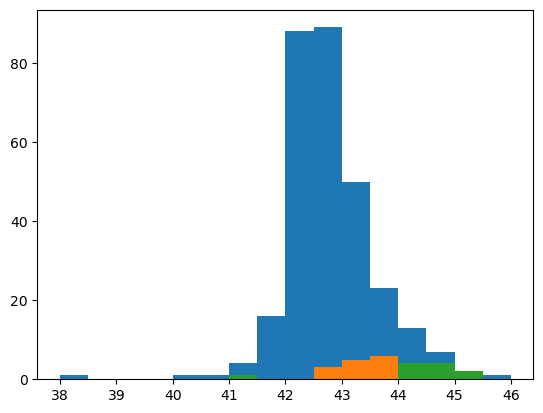

In [28]:
plt.hist(np.log10(data['L_bol']), range = [38,46], bins = 16)
plt.hist(np.log10(data['L_bol'][data['K01_flag']]), range = [38,46], bins = 16)
plt.hist(np.log10(data['L_bol'][data['WISE_flag']]), range = [38,46], bins = 16)

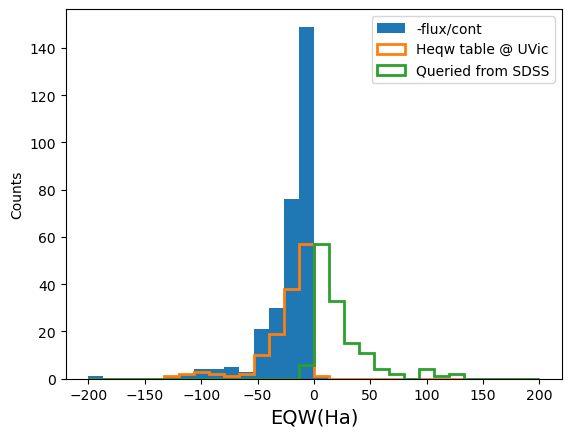

In [6]:
plt.figure()
plt.hist(data['Ha_eqw'], bins = 30, range = [-200, 200], label = '-flux/cont')
plt.hist(data['Ha_eqw_lauca'], bins = 30, range = [-200, 200], histtype = 'step', lw = 2, label = 'Heqw table @ UVic')
plt.hist(data['Ha_eqw_sdssquery'], bins = 30, range = [-200, 200], histtype = 'step', lw = 2, label = 'Queried from SDSS')
plt.xlabel('EQW(Ha)', fontsize = 14)
plt.ylabel('Counts')
plt.legend(fancybox = True)
plt.show()

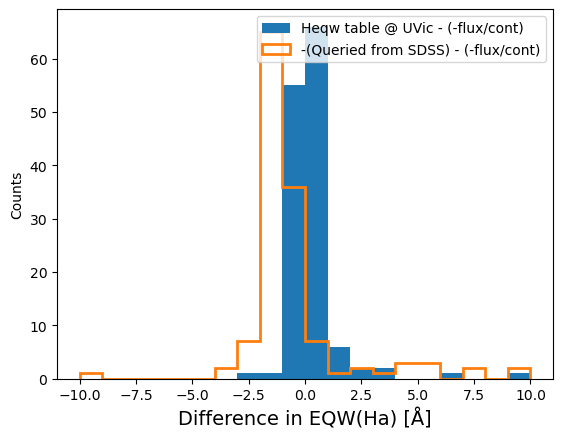

In [7]:
plt.figure()
plt.hist((-data['Ha_eqw_lauca']) - (-data['Ha_eqw']) , bins = 20, range = [-10, 10], label = 'Heqw table @ UVic - (-flux/cont)')
plt.hist(data['Ha_eqw_sdssquery'] - (-data['Ha_eqw']), bins = 20, range = [-10, 10], histtype = 'step', lw = 2, label = '-(Queried from SDSS) - (-flux/cont)')
plt.xlabel('Difference in EQW(Ha) [Å]', fontsize = 14)
plt.ylabel('Counts')
plt.legend(fancybox = True)
plt.show()

# AGN Samples using my EQW calculation

In [8]:
# initial criteria

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 3)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 3)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

92 28


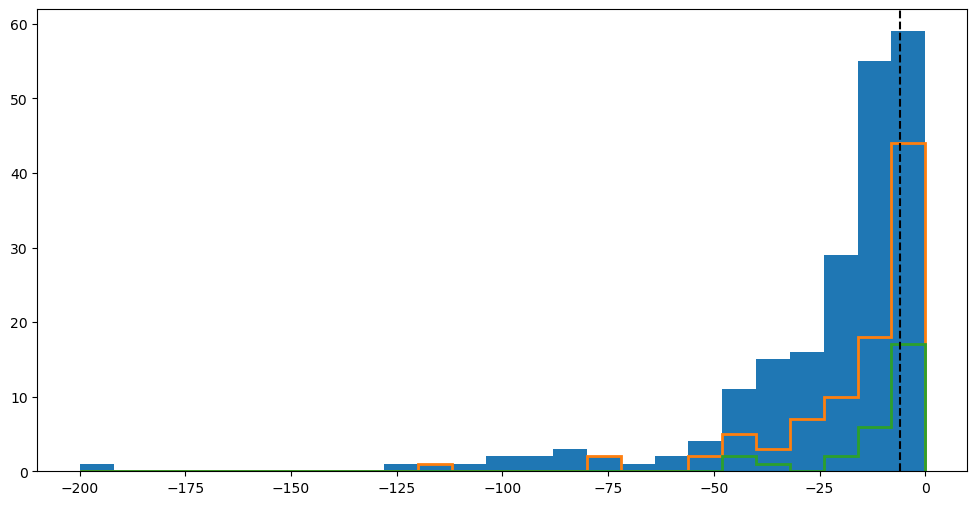

In [407]:
plt.figure(figsize = (12, 6))
plt.hist(data['Ha_eqw'][~K03_flag], bins = 25, range = [-200, 0])
plt.hist(data['Ha_eqw'][K03_flag], bins = 25, range = [-200, 0], histtype = 'step', lw = 2)
plt.hist(data['Ha_eqw'][K01_flag], bins = 25, range = [-200, 0], histtype = 'step', lw = 2)
plt.axvline(-6, ls = '--', c = 'k')
plt.show()

In [408]:
# relaxed S/N criterion

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 2)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 2)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

114 38


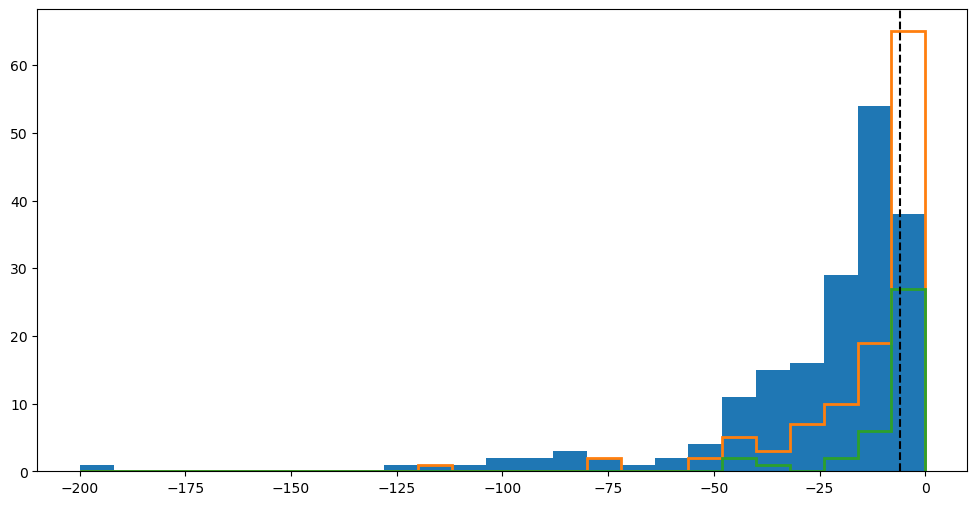

In [374]:
plt.figure(figsize = (12, 6))
plt.hist(data['Ha_eqw'][~K03_flag], bins = 25, range = [-200, 0])
plt.hist(data['Ha_eqw'][K03_flag], bins = 25, range = [-200, 0], histtype = 'step', lw = 2)
plt.hist(data['Ha_eqw'][K01_flag], bins = 25, range = [-200, 0], histtype = 'step', lw = 2)
plt.axvline(-6, ls = '--', c = 'k')
plt.show()

In [409]:
# Ellison et al. (2021) AGN criteria

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 2) & (-data['Ha_eqw'] > 6)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 2) & (-data['Ha_eqw'] > 6)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

59 12


In [410]:
# semi-strict cut

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 3) & (-data['Ha_eqw'] > 3)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 3) & (-data['Ha_eqw'] > 3)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

75 17


In [411]:
# strict cut

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 3) & (-data['Ha_eqw'] > 6)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 3) & (-data['Ha_eqw'] > 6)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

58 12


/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


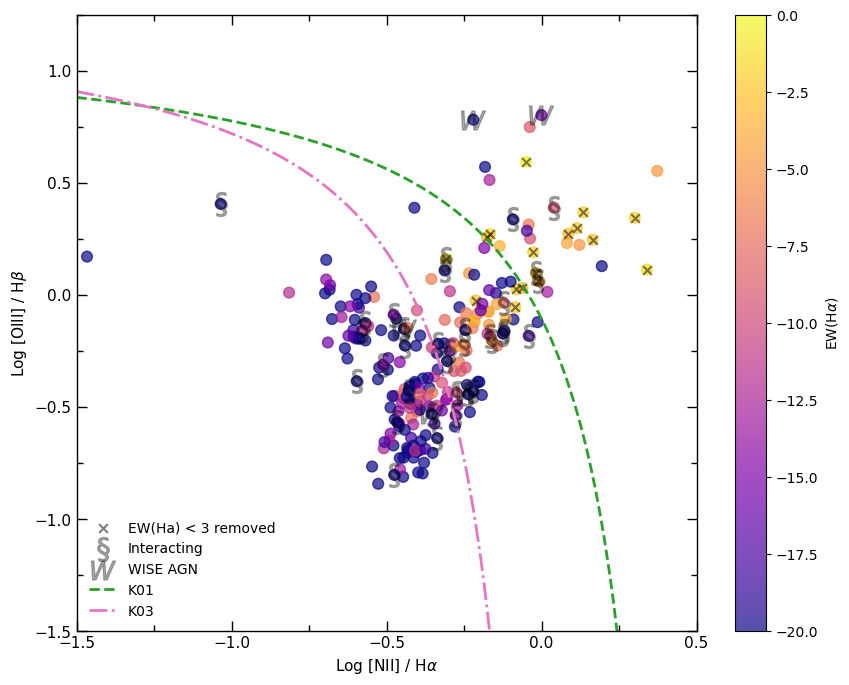

In [571]:
fig, ax = plt.subplots(1,1,figsize = (10,8))

#out = ax.scatter(np.log10(data['NII_flux'][sample_mask]/data['Ha_flux'][sample_mask]), np.log10(data['OIII_flux'][sample_mask]/data['Hb_flux'][sample_mask]), marker = 'o', c = data['Ha_eqw'][sample_mask], s = 60, cmap = 'plasma')
#out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux']), np.log10(data['OIII_flux']/data['Hb_flux']), marker = 'o', c = data['Ha_eqw'], s = 60, cmap = 'plasma', vmin = -20, vmax = 0, alpha = 0.7)
out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[data['agn_sn']>3], np.log10(data['OIII_flux']/data['Hb_flux'])[data['agn_sn']>3], marker = 'o', c = data['Ha_eqw'][data['agn_sn']>3], s = 60, cmap = 'plasma', vmin = -20, vmax = 0, alpha = 0.7)


ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']>-3)], np.log10(data['OIII_flux']/data['Hb_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']>-3)], marker = 'x', c = 'k', s = 40, alpha = 0.5, label = 'EW(Ha) < 3 removed')


ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & ((data['visual_class'] == 'M') | (data['visual_class'] == 'P'))], np.log10(data['OIII_flux']/data['Hb_flux'])[(data['agn_sn']>3) & ((data['visual_class'] == 'M') | (data['visual_class'] == 'P'))], marker = '$\\S$', c = 'k', s = 300, alpha = 0.3, label = 'Interacting')

ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['WISE_flag'])], np.log10(data['OIII_flux']/data['Hb_flux'])[(data['agn_sn']>3)  & (data['WISE_flag'])], marker = '$W$', c = 'k', s = 300, alpha = 0.3, label = 'WISE AGN')


plt.colorbar(out, label='EW(H$\\alpha$)')

x = np.linspace(-1.5, 0.25, 1000)
y =  0.61 / (x - 0.47) + 1.19

ax.plot(x,y, label = 'K01', color = 'tab:green', ls = '--', lw = 2)

x = np.linspace(-1.5, 0, 1000)
y =  0.61 / (x - 0.05) + 1.3

ax.plot(x,y, label = 'K03', color = 'tab:pink', ls = '-.', lw = 2)

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('Log [OIII] / H$\\beta$', fontsize = 11)
ax.set_xlabel('Log [NII] / H$\\alpha$', fontsize = 11)

ax.set_xticks(np.arange(-2,3,0.5))
ax.set_xticks(np.arange(-2,3,0.25), minor = True)
ax.set_yticks(np.arange(-2,3,0.5))
ax.set_yticks(np.arange(-2,3,0.25), minor = True)

ax.set_xlim(-1.5,0.5)
ax.set_ylim(-1.5,1.25)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


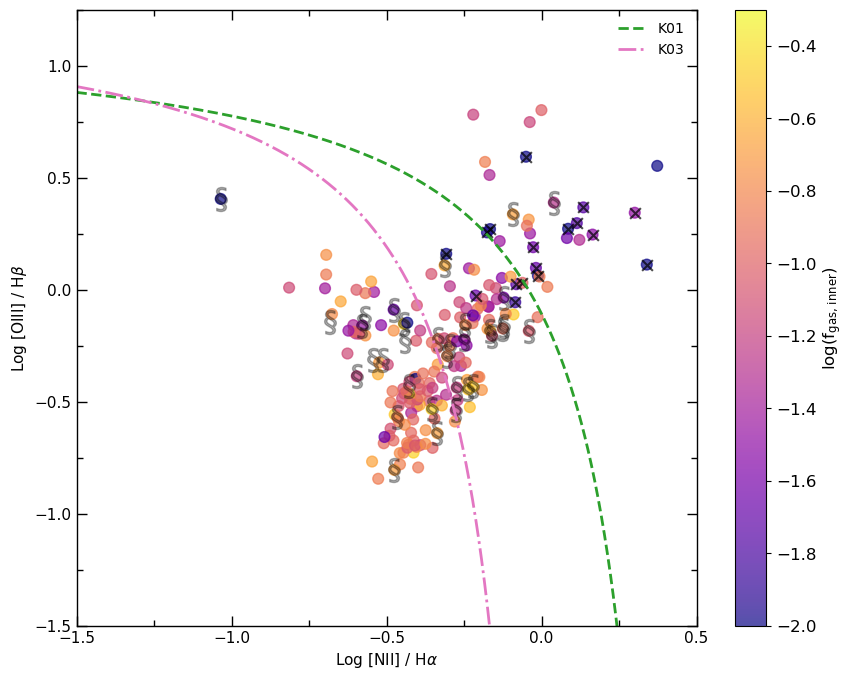

In [537]:
fig, ax = plt.subplots(1,1,figsize = (10,8))

#out = ax.scatter(np.log10(data['NII_flux'][sample_mask]/data['Ha_flux'][sample_mask]), np.log10(data['OIII_flux'][sample_mask]/data['Hb_flux'][sample_mask]), marker = 'o', c = data['Ha_eqw'][sample_mask], s = 60, cmap = 'plasma')
#out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux']), np.log10(data['OIII_flux']/data['Hb_flux']), marker = 'o', c = data['Ha_eqw'], s = 60, cmap = 'plasma', vmin = -20, vmax = 0, alpha = 0.7)
out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[data['agn_sn']>3], np.log10(data['OIII_flux']/data['Hb_flux'])[data['agn_sn']>3], marker = 'o', c = np.log10(data['fgas_inner'][data['agn_sn']>3]), s = 60, cmap = 'plasma', vmin = -2, vmax = -0.3, alpha = 0.7)
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']>-3)], np.log10(data['OIII_flux']/data['Hb_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']>-3)], marker = 'x', c = 'k', s = 60, alpha = 0.7)
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['visual_class'] == 'M') | (data['visual_class'] == 'P')], np.log10(data['OIII_flux']/data['Hb_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['visual_class'] == 'M') | (data['visual_class'] == 'P')], marker = '$\\S$', c = 'k', s = 300, alpha = 0.3)
cb = plt.colorbar(out)
cb.set_label(label='log(f$_\\text{gas, inner}$)', size='large')
cb.ax.tick_params(labelsize='large')

x = np.linspace(-1.5, 0.25, 1000)
y =  0.61 / (x - 0.47) + 1.19

ax.plot(x,y, label = 'K01', color = 'tab:green', ls = '--', lw = 2)

x = np.linspace(-1.5, 0, 1000)
y =  0.61 / (x - 0.05) + 1.3

ax.plot(x,y, label = 'K03', color = 'tab:pink', ls = '-.', lw = 2)

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('Log [OIII] / H$\\beta$', fontsize = 11)
ax.set_xlabel('Log [NII] / H$\\alpha$', fontsize = 11)

ax.set_xticks(np.arange(-2,3,0.5))
ax.set_xticks(np.arange(-2,3,0.25), minor = True)
ax.set_yticks(np.arange(-2,3,0.5))
ax.set_yticks(np.arange(-2,3,0.25), minor = True)

ax.set_xlim(-1.5,0.5)
ax.set_ylim(-1.5,1.25)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


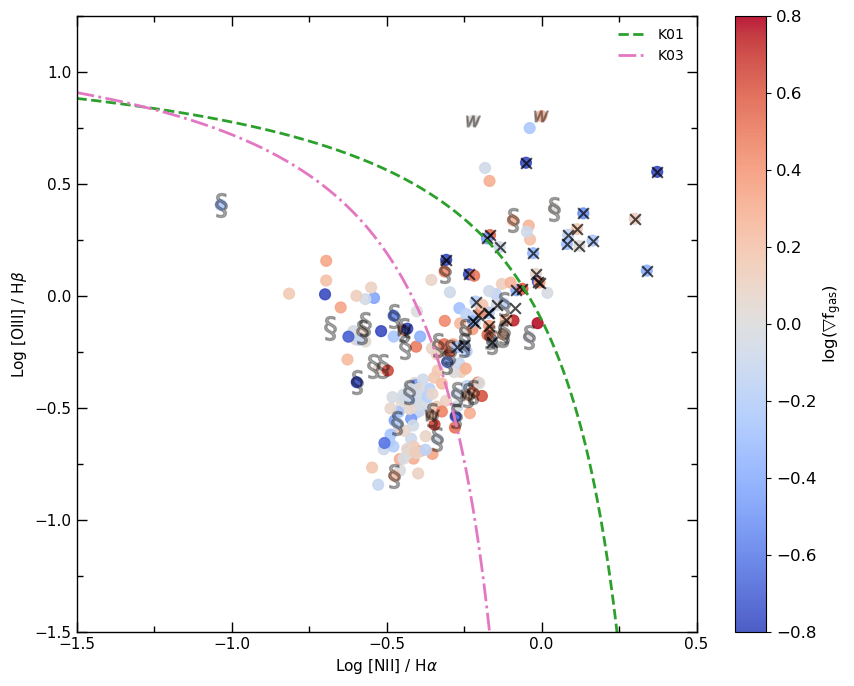

In [541]:
fig, ax = plt.subplots(1,1,figsize = (10,8))

#out = ax.scatter(np.log10(data['NII_flux'][sample_mask]/data['Ha_flux'][sample_mask]), np.log10(data['OIII_flux'][sample_mask]/data['Hb_flux'][sample_mask]), marker = 'o', c = data['Ha_eqw'][sample_mask], s = 60, cmap = 'plasma')
#out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux']), np.log10(data['OIII_flux']/data['Hb_flux']), marker = 'o', c = data['Ha_eqw'], s = 60, cmap = 'plasma', vmin = -20, vmax = 0, alpha = 0.7)
out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[data['agn_sn']>3], np.log10(data['OIII_flux']/data['Hb_flux'])[data['agn_sn']>3], marker = 'o', c = np.log10(data['grad_fgas'][data['agn_sn']>3]), s = 60, cmap = 'coolwarm', vmin = -0.8, vmax = 0.8, alpha = 0.9)
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']>-6)], np.log10(data['OIII_flux']/data['Hb_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']>-6)], marker = 'x', c = 'k', s = 60, alpha = 0.7)
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['visual_class'] == 'M') | (data['visual_class'] == 'P')], np.log10(data['OIII_flux']/data['Hb_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['visual_class'] == 'M') | (data['visual_class'] == 'P')], marker = '$\\S$', c = 'k', s = 300, alpha = 0.3)
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['WISE_flag'])], np.log10(data['OIII_flux']/data['Hb_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['WISE_flag'])], marker = '$W$', c = 'k', s = 100, alpha = 0.3)
cb = plt.colorbar(out)
cb.set_label(label='log($\\bigtriangledown$f$_\\text{gas}$)', size='large')
cb.ax.tick_params(labelsize='large')

x = np.linspace(-1.5, 0.25, 1000)
y =  0.61 / (x - 0.47) + 1.19

ax.plot(x,y, label = 'K01', color = 'tab:green', ls = '--', lw = 2)

x = np.linspace(-1.5, 0, 1000)
y =  0.61 / (x - 0.05) + 1.3

ax.plot(x,y, label = 'K03', color = 'tab:pink', ls = '-.', lw = 2)

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('Log [OIII] / H$\\beta$', fontsize = 11)
ax.set_xlabel('Log [NII] / H$\\alpha$', fontsize = 11)

ax.set_xticks(np.arange(-2,3,0.5))
ax.set_xticks(np.arange(-2,3,0.25), minor = True)
ax.set_yticks(np.arange(-2,3,0.5))
ax.set_yticks(np.arange(-2,3,0.25), minor = True)

ax.set_xlim(-1.5,0.5)
ax.set_ylim(-1.5,1.25)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

In [521]:
data['objID'][np.log10(data['OIII_flux']/data['Hb_flux'])>0.76]

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


25     587726015087575099
177    587741533840670747
277    588848898827288872
Name: objID, dtype: int64

In [530]:
data['objID'][(np.log10(data['NII_flux']/data['Ha_flux'])>0.35) & (data['Ha_eqw']<-3) & (data['agn_sn']>3)]

195    587742567322157192
Name: objID, dtype: int64

In [531]:
data['source_name'][data['objID']==587742567322157192]

195    33288
Name: source_name, dtype: object

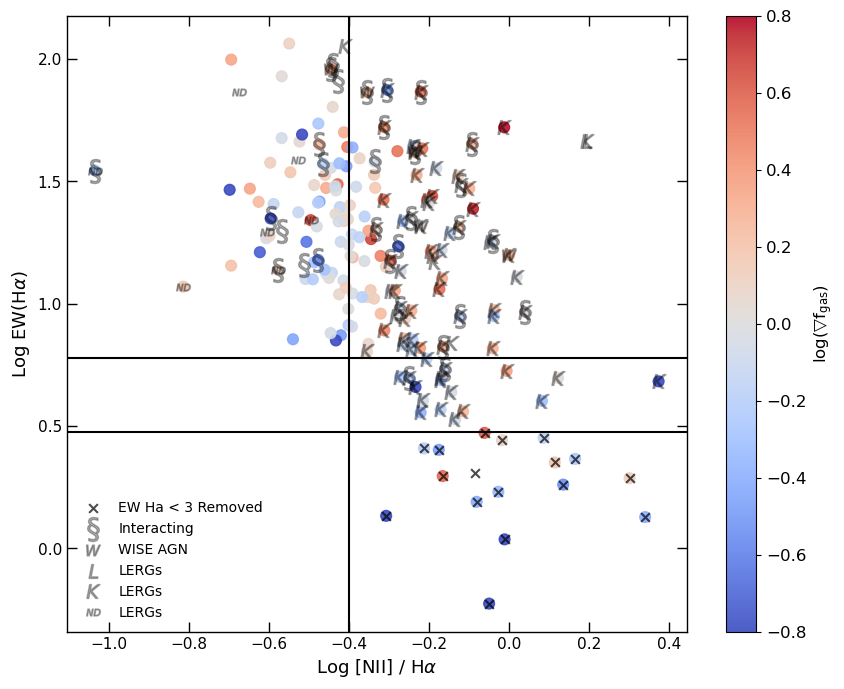

In [574]:
fig, ax = plt.subplots(1,1,figsize = (10,8))

#out = ax.scatter(np.log10(data['NII_flux'][sample_mask]/data['Ha_flux'][sample_mask]), np.log10(data['OIII_flux'][sample_mask]/data['Hb_flux'][sample_mask]), marker = 'o', c = data['Ha_eqw'][sample_mask], s = 60, cmap = 'plasma')
#out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux']), np.log10(data['OIII_flux']/data['Hb_flux']), marker = 'o', c = data['Ha_eqw'], s = 60, cmap = 'plasma', vmin = -20, vmax = 0, alpha = 0.7)
out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[data['agn_sn']>3], np.log10(-data['Ha_eqw'])[data['agn_sn']>3], marker = 'o', c = np.log10(data['grad_fgas'][data['agn_sn']>3]), s = 60, cmap = 'coolwarm', vmin = -0.8, vmax = 0.8, alpha = 0.9)
cb = plt.colorbar(out)
cb.set_label(label='log($\\bigtriangledown$f$_\\text{gas}$)', size='large')
cb.ax.tick_params(labelsize='large')


#ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[data['agn_sn']<3], np.log10(-data['Ha_eqw'])[data['agn_sn']<3], marker = 's', c = 'k', s = 60, cmap = 'coolwarm', vmin = -0.8, vmax = 0.8, alpha = 0.5)

# plot EW Ha > 3 removed galaxies as x's
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']>-3)], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']>-3)], marker = 'x', c = 'k', s = 40, alpha = 0.7, label = 'EW Ha < 3 Removed')

# plot interacting galaxies... 
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & ((data['visual_class'] == 'M') | (data['visual_class'] == 'P'))], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & ((data['visual_class'] == 'M') | (data['visual_class'] == 'P'))], marker = '$\\S$', c = 'k', s = 300, alpha = 0.3, label = 'Interacting')

# plot wise agn marker 
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['WISE_flag'])], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['WISE_flag'])], marker = '$W$', c = 'k', s = 100, alpha = 0.3, label = 'WISE AGN')

# plot LERG marker 
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['LERG_flag'])], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['LERG_flag'])], marker = '$L$', c = 'k', s = 100, alpha = 0.3, label = 'LERGs')

# plot LERG marker 
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['K03_flag'])], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['K03_flag'])], marker = '$K$', c = 'k', s = 100, alpha = 0.3, label = 'LERGs')


# plot non-detections ...
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['Nsigma_total'] < 5)], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['Nsigma_total'] < 5)], marker = '$ND$', c = 'k', s = 100, alpha = 0.3, label = 'LERGs')


'''
x = np.linspace(-1.5, 0.25, 1000)
y =  0.61 / (x - 0.47) + 1.19

ax.plot(x,y, label = 'K01', color = 'tab:green', ls = '--', lw = 2)

x = np.linspace(-1.5, 0, 1000)
y =  0.61 / (x - 0.05) + 1.3

ax.plot(x,y, label = 'K03', color = 'tab:pink', ls = '-.', lw = 2)





ax.set_xticks(np.arange(-2,3,0.5))
ax.set_xticks(np.arange(-2,3,0.25), minor = True)
ax.set_yticks(np.arange(-2,3,0.5))
ax.set_yticks(np.arange(-2,3,0.25), minor = True)

ax.set_xlim(-1.5,0.5)
ax.set_ylim(-1.5,1.25)
'''

ax.set_ylabel('Log EW(H$\\alpha$)', fontsize = 13)
ax.set_xlabel('Log [NII] / H$\\alpha$', fontsize = 13)

ax.axvline(-0.4, c = 'k')
ax.axhline(np.log10(6), c = 'k')
ax.axhline(np.log10(3), c = 'k')

ax.legend(fancybox = True, frameon = False)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_13711/1911461739.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[data['agn_sn']<3], np.log10(-data['Ha_eqw'])[data['agn_sn']<3], marker = 's', c = 'k', s = 60, cmap = 'coolwarm', vmin = -0.8, vmax = 0.8, alpha = 0.5, label = 'AGN SNR is too low')


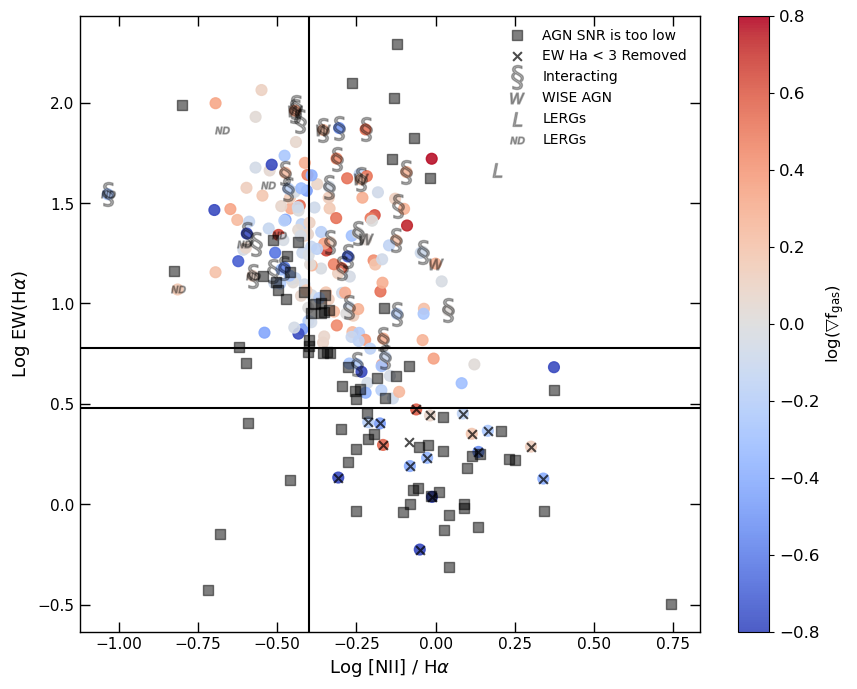

In [561]:
fig, ax = plt.subplots(1,1,figsize = (10,8))

#out = ax.scatter(np.log10(data['NII_flux'][sample_mask]/data['Ha_flux'][sample_mask]), np.log10(data['OIII_flux'][sample_mask]/data['Hb_flux'][sample_mask]), marker = 'o', c = data['Ha_eqw'][sample_mask], s = 60, cmap = 'plasma')
#out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux']), np.log10(data['OIII_flux']/data['Hb_flux']), marker = 'o', c = data['Ha_eqw'], s = 60, cmap = 'plasma', vmin = -20, vmax = 0, alpha = 0.7)
out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[data['agn_sn']>3], np.log10(-data['Ha_eqw'])[data['agn_sn']>3], marker = 'o', c = np.log10(data['grad_fgas'][data['agn_sn']>3]), s = 60, cmap = 'coolwarm', vmin = -0.8, vmax = 0.8, alpha = 0.9)
cb = plt.colorbar(out)
cb.set_label(label='log($\\bigtriangledown$f$_\\text{gas}$)', size='large')
cb.ax.tick_params(labelsize='large')


ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[data['agn_sn']<3], np.log10(-data['Ha_eqw'])[data['agn_sn']<3], marker = 's', c = 'k', s = 60, cmap = 'coolwarm', vmin = -0.8, vmax = 0.8, alpha = 0.5, label = 'AGN SNR is too low')

# plot EW Ha > 3 removed galaxies as x's
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']>-3)], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']>-3)], marker = 'x', c = 'k', s = 40, alpha = 0.7, label = 'EW Ha < 3 Removed')

# plot interacting galaxies... 
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & ((data['visual_class'] == 'M') | (data['visual_class'] == 'P'))], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & ((data['visual_class'] == 'M') | (data['visual_class'] == 'P'))], marker = '$\\S$', c = 'k', s = 300, alpha = 0.3, label = 'Interacting')

# plot wise agn marker 
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['WISE_flag'])], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['WISE_flag'])], marker = '$W$', c = 'k', s = 100, alpha = 0.3, label = 'WISE AGN')

# plot LERG marker 
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['LERG_flag'])], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['LERG_flag'])], marker = '$L$', c = 'k', s = 100, alpha = 0.3, label = 'LERGs')


# plot non-detections ...
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['Nsigma_total'] < 5)], np.log10(-data['Ha_eqw'])[(data['agn_sn']>3) & (data['Ha_eqw']<-3) & (data['Nsigma_total'] < 5)], marker = '$ND$', c = 'k', s = 100, alpha = 0.3, label = 'LERGs')


'''
x = np.linspace(-1.5, 0.25, 1000)
y =  0.61 / (x - 0.47) + 1.19

ax.plot(x,y, label = 'K01', color = 'tab:green', ls = '--', lw = 2)

x = np.linspace(-1.5, 0, 1000)
y =  0.61 / (x - 0.05) + 1.3

ax.plot(x,y, label = 'K03', color = 'tab:pink', ls = '-.', lw = 2)





ax.set_xticks(np.arange(-2,3,0.5))
ax.set_xticks(np.arange(-2,3,0.25), minor = True)
ax.set_yticks(np.arange(-2,3,0.5))
ax.set_yticks(np.arange(-2,3,0.25), minor = True)

ax.set_xlim(-1.5,0.5)
ax.set_ylim(-1.5,1.25)
'''

ax.set_ylabel('Log EW(H$\\alpha$)', fontsize = 13)
ax.set_xlabel('Log [NII] / H$\\alpha$', fontsize = 13)

ax.axvline(-0.4, c = 'k')
ax.axhline(np.log10(6), c = 'k')
ax.axhline(np.log10(3), c = 'k')

ax.legend(fancybox = True, frameon = False)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

In [563]:
len(data['objID'][(np.log10(data['NII_flux']/data['Ha_flux']) > -0.4) & (-data['Ha_eqw']>3)])

137

In [565]:
len(data['objID'][(np.log10(data['NII_flux']/data['Ha_flux']) > -0.4) & (-data['Ha_eqw']>3) & (data['agn_sn']>3)])

108

In [ ]:
587731512617664623

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


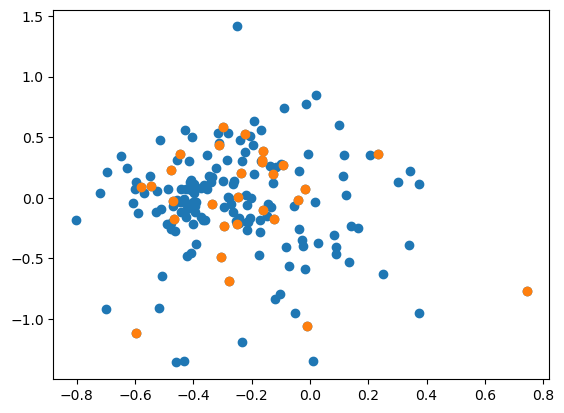

In [608]:
plt.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[sample_mask], np.log10(data['grad_fgas'])[sample_mask])
plt.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[sample_mask][((data['visual_class'][sample_mask] == 'M') | (data['visual_class'][sample_mask] == 'P'))], np.log10(data['grad_fgas'])[sample_mask][((data['visual_class'][sample_mask] == 'M') | (data['visual_class'][sample_mask] == 'P'))])




In [601]:
np.log10(data['grad_fgas'])[sample_mask][np.log10(data['grad_fgas'][sample_mask])<-13]

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


20    -inf
60    -inf
137   -inf
143   -inf
197   -inf
205   -inf
244   -inf
247   -inf
264   -inf
293   -inf
Name: grad_fgas, dtype: float64

In [607]:
data['objID'][sample_mask][(np.log10(data['grad_fgas'][sample_mask])<-1.1) & (np.log10(data['grad_fgas'][sample_mask])>-2)]

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


41     587726032765059337
142    587738409253994578
159    587739647273533569
202    587742627987980483
215    587742864742285484
Name: objID, dtype: int64

In [ ]:
# all of the above are blank moment 0 maps!! Look into S/N cuts, look at their images, 
# adjust the moment 0 map method to get an idea if these are trsutowrthy values at all

# without them, the trend becomes fairly clear... ?

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


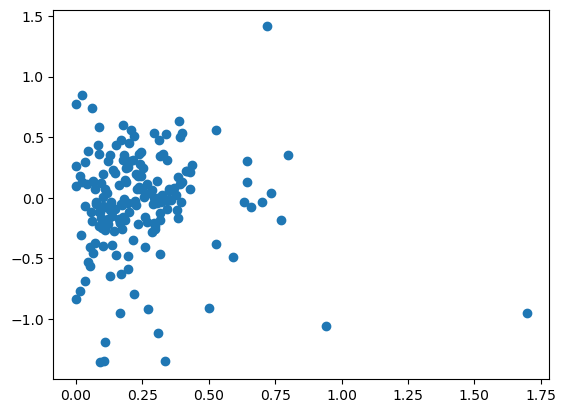

In [590]:
plt.scatter(np.log10(data['mstar_total']/data['rpetro_kpc'])[sample_mask]**2, np.log10(data['grad_fgas'])[sample_mask])

In [47]:
def movav(x, y, MIN, MAX, nbins):
    
    x = np.array(x)
    
    edges = np.linspace(MIN, MAX, nbins+1)
    
    print(len(x), len(edges), nbins)
    
    avs = np.array([np.nanmean(y[(x>edges[i]) & (x<edges[i+1])]) for i in range(nbins)])
    stds = np.array([np.nanstd(y[(x>edges[i]) & (x<edges[i+1])]) for i in range(nbins)])
    Ns = np.array([len(y[(x>edges[i]) & (x<edges[i+1])]) for i in range(nbins)])
    errs = stds/np.sqrt(Ns)
    centres = np.array([(edges[i] + edges[i+1])/2. for i in range(nbins)])
    
    return  centres, avs, errs

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


150 8 7


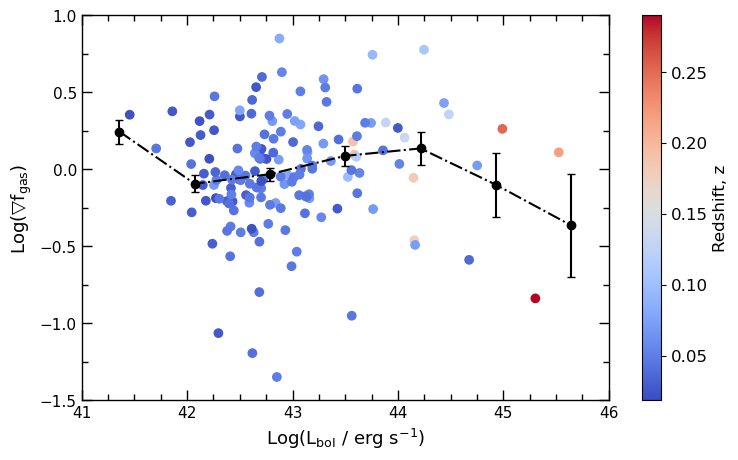

In [76]:
fig, ax = plt.subplots(1,1, figsize = (8.5,5))

out = ax.scatter(np.log10(data['L_bol'])[sample_mask], np.log10(data['grad_fgas'])[sample_mask], c = data['z'][sample_mask], cmap = 'coolwarm')

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask], np.log10(data['grad_fgas'])[sample_mask], 41, 46, 7)

ax.errorbar(x,y,yerr, fmt = 'ko-.', capsize = 3)

cb = plt.colorbar(out)
cb.set_label(label='Redshift, z', size='large')
cb.ax.tick_params(labelsize='large')

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('Log($\\bigtriangledown$f$_\\text{gas}$)', fontsize = 13)
ax.set_xlabel('Log(L$_\\text{bol}$ / erg s$^{-1})$' , fontsize = 13)

ax.set_xticks(np.arange(41,47,1))
ax.set_xticks(np.arange(41,47,0.25), minor = True)
ax.set_yticks(np.arange(-1.5,1.5,0.5))
ax.set_yticks(np.arange(-1.5,1.5,0.25), minor = True)

ax.set_xlim(41,46)
ax.set_ylim(-1.5,1.)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_140/836127634.py:9: RuntimeWarning: Mean of empty slice
  avs = np.array([np.nanmean(y[(x>edges[i]) & (x<edges[i+1])]) for i in range(nbins)])
/opt/conda/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


150 8 7
99 8 7


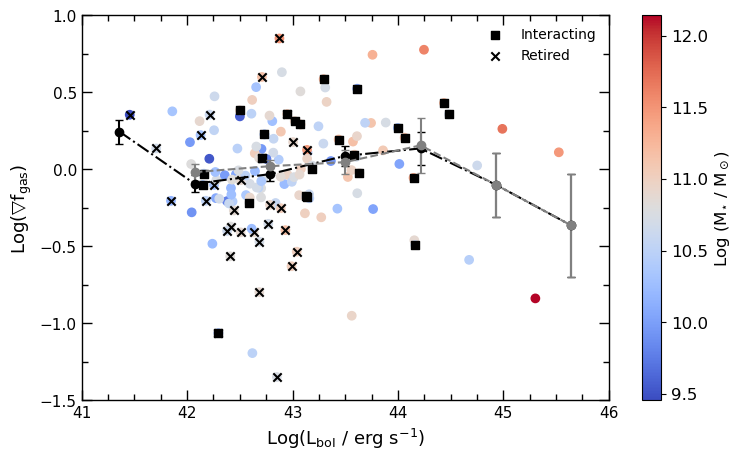

In [103]:
fig, ax = plt.subplots(1,1, figsize = (8.5,5))

out = ax.scatter(np.log10(data['L_bol'])[sample_mask], np.log10(data['grad_fgas'])[sample_mask], c = data['mstar_total'][sample_mask], cmap = 'coolwarm')

interacting = ((data['visual_class'][sample_mask] == 'M') | (data['visual_class'][sample_mask] == 'P'))
ax.scatter(np.log10(data['L_bol'])[sample_mask][interacting], np.log10(data['grad_fgas'])[sample_mask][interacting], marker = 's', c = 'k', label = 'Interacting')

retired = data['Ha_eqw'][sample_mask] > -3
ax.scatter(np.log10(data['L_bol'])[sample_mask][retired], np.log10(data['grad_fgas'])[sample_mask][retired], marker = 'x', c = 'k', label = 'Retired')

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask], np.log10(data['grad_fgas'])[sample_mask], 41, 46, 7)
ax.errorbar(x,y,yerr, fmt = 'ko-.', capsize = 3)

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask][(~retired) & (~interacting)], np.log10(data['grad_fgas'])[sample_mask][(~retired) & (~interacting)], 41, 46, 7, )
ax.errorbar(x,y,yerr, fmt = 'o--', capsize = 3, color = 'gray')



cb = plt.colorbar(out)
cb.set_label(label='Log (M$_{\\star}$ / M$_\\odot$)', size='large')
cb.ax.tick_params(labelsize='large')

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('Log($\\bigtriangledown$f$_\\text{gas}$)', fontsize = 13)
ax.set_xlabel('Log(L$_\\text{bol}$ / erg s$^{-1})$' , fontsize = 13)

ax.set_xticks(np.arange(41,47,1))
ax.set_xticks(np.arange(41,47,0.25), minor = True)
ax.set_yticks(np.arange(-1.5,1.5,0.5))
ax.set_yticks(np.arange(-1.5,1.5,0.25), minor = True)

ax.set_xlim(41,46)
ax.set_ylim(-1.5,1.)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_140/836127634.py:9: RuntimeWarning: Mean of empty slice
  avs = np.array([np.nanmean(y[(x>edges[i]) & (x<edges[i+1])]) for i in range(nbins)])
/opt/conda/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


150 8 7
99 8 7


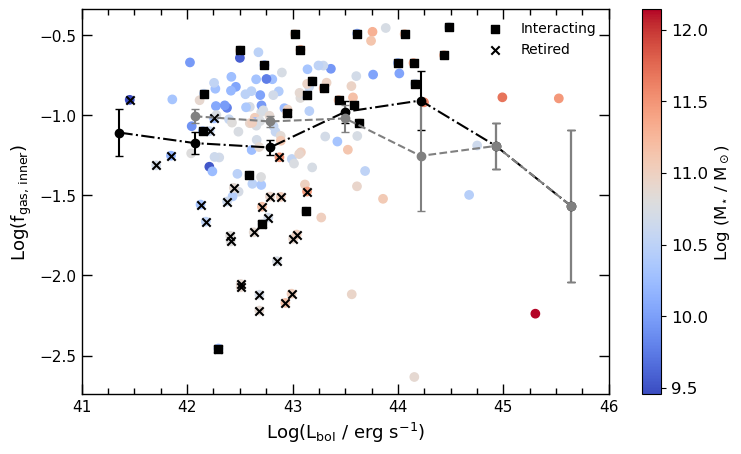

In [105]:
fig, ax = plt.subplots(1,1, figsize = (8.5,5))

out = ax.scatter(np.log10(data['L_bol'])[sample_mask], np.log10(data['fgas_inner'])[sample_mask], c = data['mstar_total'][sample_mask], cmap = 'coolwarm')

interacting = ((data['visual_class'][sample_mask] == 'M') | (data['visual_class'][sample_mask] == 'P'))
ax.scatter(np.log10(data['L_bol'])[sample_mask][interacting], np.log10(data['fgas_inner'])[sample_mask][interacting], marker = 's', c = 'k', label = 'Interacting')

retired = data['Ha_eqw'][sample_mask] > -3
ax.scatter(np.log10(data['L_bol'])[sample_mask][retired], np.log10(data['fgas_inner'])[sample_mask][retired], marker = 'x', c = 'k', label = 'Retired')

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask], np.log10(data['fgas_inner'])[sample_mask], 41, 46, 7)
ax.errorbar(x,y,yerr, fmt = 'ko-.', capsize = 3)

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask][(~retired) & (~interacting)], np.log10(data['fgas_inner'])[sample_mask][(~retired) & (~interacting)], 41, 46, 7, )
ax.errorbar(x,y,yerr, fmt = 'o--', capsize = 3, color = 'gray')



cb = plt.colorbar(out)
cb.set_label(label='Log (M$_{\\star}$ / M$_\\odot$)', size='large')
cb.ax.tick_params(labelsize='large')

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('Log(f$_\\text{gas, inner}$)', fontsize = 13)
ax.set_xlabel('Log(L$_\\text{bol}$ / erg s$^{-1})$' , fontsize = 13)

ax.set_xticks(np.arange(41,47,1))
ax.set_xticks(np.arange(41,47,0.25), minor = True)
#ax.set_yticks(np.arange(-1.5,1.5,0.5))
#ax.set_yticks(np.arange(-1.5,1.5,0.25), minor = True)

ax.set_xlim(41,46)
#ax.set_ylim(-1.5,1.)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


176 8 7
113 8 7


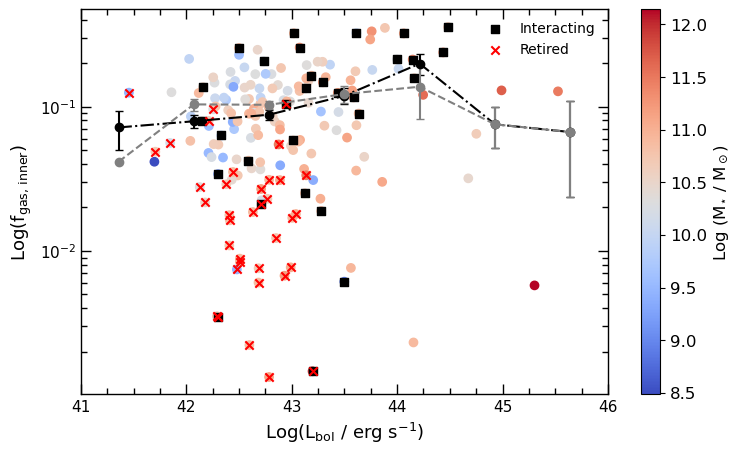

In [147]:
fig, ax = plt.subplots(1,1, figsize = (8.5,5))

sample_mask = (data['incl']<70) & (data['Nsigma_inner'] > 1) & (data['Nsigma_outer'] > 1) & (data['visual_class'] != 'X')

out = ax.scatter(np.log10(data['L_bol'])[sample_mask], data['fgas_inner'][sample_mask], c = data['mstar_total'][sample_mask], cmap = 'coolwarm')

interacting = ((data['visual_class'][sample_mask] == 'M') | (data['visual_class'][sample_mask] == 'P'))
ax.scatter(np.log10(data['L_bol'])[sample_mask][interacting], data['fgas_inner'][sample_mask][interacting], marker = 's', c = 'k', label = 'Interacting')

retired = data['Ha_eqw'][sample_mask] > -3
ax.scatter(np.log10(data['L_bol'])[sample_mask][retired], data['fgas_inner'][sample_mask][retired], marker = 'x', c = 'r', label = 'Retired')

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask], data['fgas_inner'][sample_mask], 41, 46, 7)
ax.errorbar(x, y,yerr, fmt = 'ko-.', capsize = 3)

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask][(~retired) & (~interacting)], data['fgas_inner'][sample_mask][(~retired) & (~interacting)], 41, 46, 7, )
ax.errorbar(x,y,yerr, fmt = 'o--', capsize = 3, color = 'gray')

ax.set_yscale('log')

cb = plt.colorbar(out)
cb.set_label(label='Log (M$_{\\star}$ / M$_\\odot$)', size='large')
cb.ax.tick_params(labelsize='large')

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('Log(f$_\\text{gas, inner}$)', fontsize = 13)
ax.set_xlabel('Log(L$_\\text{bol}$ / erg s$^{-1})$' , fontsize = 13)

ax.set_xticks(np.arange(41,47,1))
ax.set_xticks(np.arange(41,47,0.25), minor = True)
#ax.set_yticks(np.arange(-1.5,1.5,0.5))
#ax.set_yticks(np.arange(-1.5,1.5,0.25), minor = True)

ax.set_xlim(41,46)
#ax.set_ylim(-1.5,1.)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_140/836127634.py:9: RuntimeWarning: Mean of empty slice
  avs = np.array([np.nanmean(y[(x>edges[i]) & (x<edges[i+1])]) for i in range(nbins)])
/opt/conda/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


150 8 7
99 8 7


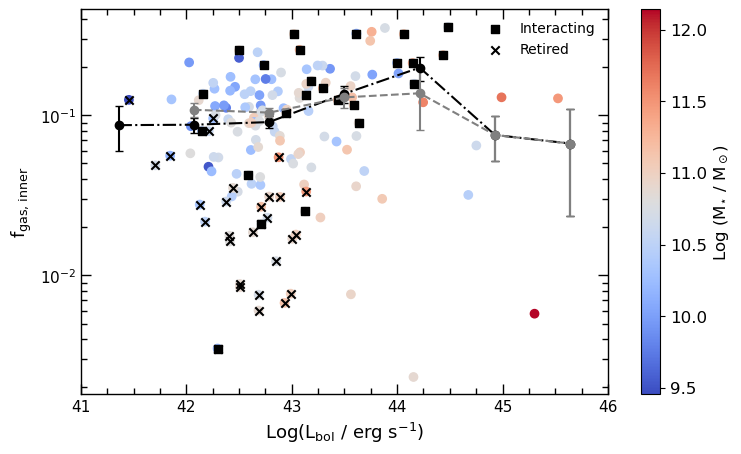

In [135]:
fig, ax = plt.subplots(1,1, figsize = (8.5,5))

out = ax.scatter(np.log10(data['L_bol'])[sample_mask], data['fgas_inner'][sample_mask], c = data['mstar_total'][sample_mask], cmap = 'coolwarm')

interacting = ((data['visual_class'][sample_mask] == 'M') | (data['visual_class'][sample_mask] == 'P'))
ax.scatter(np.log10(data['L_bol'])[sample_mask][interacting], data['fgas_inner'][sample_mask][interacting], marker = 's', c = 'k', label = 'Interacting')

retired = data['Ha_eqw'][sample_mask] > -3
ax.scatter(np.log10(data['L_bol'])[sample_mask][retired], data['fgas_inner'][sample_mask][retired], marker = 'x', c = 'k', label = 'Retired')

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask], data['fgas_inner'][sample_mask], 41, 46, 7)
ax.errorbar(x,y,yerr, fmt = 'ko-.', capsize = 3)

x, y, yerr = movav(np.log10(data['L_bol'])[sample_mask][(~retired) & (~interacting)], data['fgas_inner'][sample_mask][(~retired) & (~interacting)], 41, 46, 7, )
ax.errorbar(x,y,yerr, fmt = 'o--', capsize = 3, color = 'gray')

ax.set_yscale('log')

cb = plt.colorbar(out)
cb.set_label(label='Log (M$_{\\star}$ / M$_\\odot$)', size='large')
cb.ax.tick_params(labelsize='large')

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('f$_\\text{gas, inner}$', fontsize = 13)
ax.set_xlabel('Log(L$_\\text{bol}$ / erg s$^{-1})$' , fontsize = 13)

ax.set_xticks(np.arange(41,47,1))
ax.set_xticks(np.arange(41,47,0.25), minor = True)
#ax.set_yticks(np.arange(-1.5,1.5,0.5))
#ax.set_yticks(np.arange(-1.5,1.5,0.25), minor = True)

ax.set_xlim(41,46)
#ax.set_ylim(-1.5,1.)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_140/836127634.py:9: RuntimeWarning: Mean of empty slice
  avs = np.array([np.nanmean(y[(x>edges[i]) & (x<edges[i+1])]) for i in range(nbins)])
/opt/conda/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


150 13 12
99 13 12


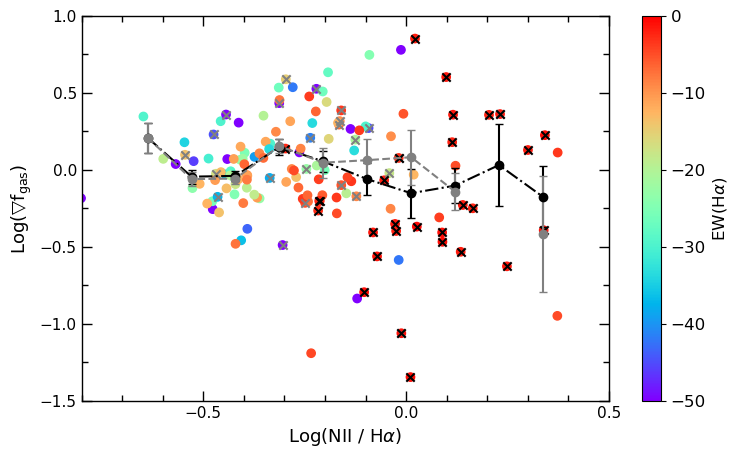

In [94]:
fig, ax = plt.subplots(1,1, figsize = (8.5,5))

#out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[sample_mask], np.log10(data['grad_fgas'])[sample_mask], c = data['z'][sample_mask], cmap = 'coolwarm')
out = ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[sample_mask], np.log10(data['grad_fgas'])[sample_mask], c = data['Ha_eqw'][sample_mask], cmap = 'rainbow', vmin = -50, vmax = 0)

interacting = ((data['visual_class'][sample_mask] == 'M') | (data['visual_class'][sample_mask] == 'P'))
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[sample_mask][interacting], np.log10(data['grad_fgas'])[sample_mask][interacting], marker = 'x', c = 'gray')

retired = data['Ha_eqw'][sample_mask] > -3
ax.scatter(np.log10(data['NII_flux']/data['Ha_flux'])[sample_mask][retired], np.log10(data['grad_fgas'])[sample_mask][retired], marker = 'x', c = 'k')

x, y, yerr = movav(np.log10(data['NII_flux']/data['Ha_flux'])[sample_mask], np.log10(data['grad_fgas'])[sample_mask], -0.8, 0.5,12)
ax.errorbar(x,y,yerr, fmt = 'ko-.', capsize = 3)

x, y, yerr = movav(np.log10(data['NII_flux']/data['Ha_flux'])[sample_mask][(~interacting) & (~retired)], np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired)], -0.8, 0.5,12)
ax.errorbar(x,y,yerr, fmt = 'o--', capsize = 3, color = 'gray')

cb = plt.colorbar(out)
#cb.set_label(label='Redshift, z', size='large')
cb.set_label(label='EW(H$\\alpha$)', size='large')
cb.ax.tick_params(labelsize='large')

ax.legend(fancybox = True, frameon = False)

ax.set_ylabel('Log($\\bigtriangledown$f$_\\text{gas}$)', fontsize = 13)
ax.set_xlabel('Log(NII / H$\\alpha$)' , fontsize = 13)

ax.set_xticks(np.arange(-1,0.75,0.5))
ax.set_xticks(np.arange(-1,0.75,0.1), minor = True)
ax.set_yticks(np.arange(-1.5,1.5,0.5))
ax.set_yticks(np.arange(-1.5,1.5,0.25), minor = True)

ax.set_xlim(-0.8,0.5)
ax.set_ylim(-1.5,1.)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1., labelsize = 11)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)


plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


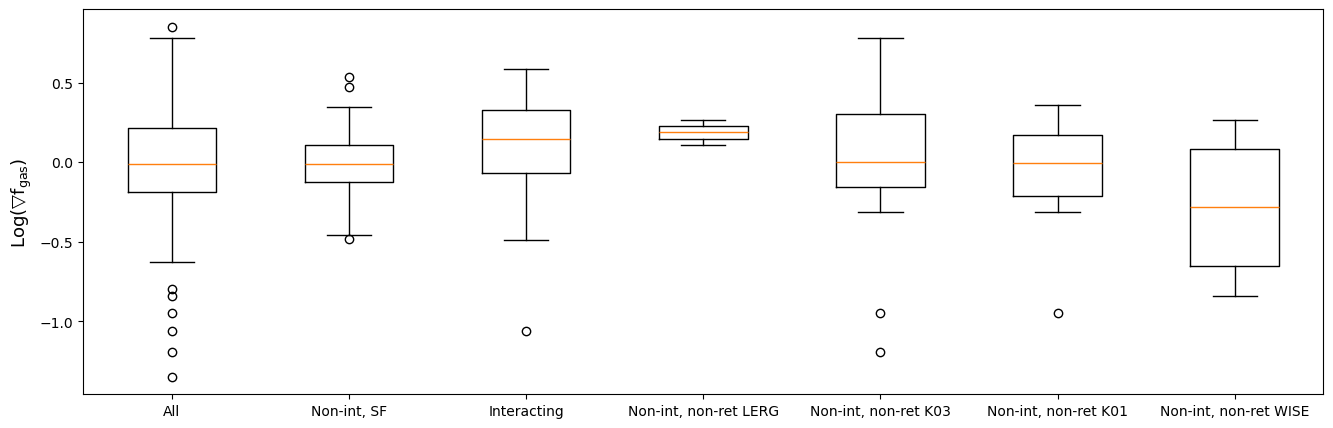

In [121]:
plt.figure(figsize = (16, 5))

plt.boxplot([np.log10(data['grad_fgas'])[sample_mask], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (~data['K03_flag']) & (~data['WISE_flag']) & (~data['LERG_flag'])],
             np.log10(data['grad_fgas'])[sample_mask][interacting], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['LERG_flag'])], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['K03_flag'])], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['K01_flag'])], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['WISE_flag'])]], \
             labels = ['All', 'Non-int, SF', 'Interacting', 'Non-int, non-ret LERG', 'Non-int, non-ret K03', 'Non-int, non-ret K01', 'Non-int, non-ret WISE'])

plt.ylabel('Log($\\bigtriangledown$f$_\\text{gas}$)', fontsize = 13)
plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  r

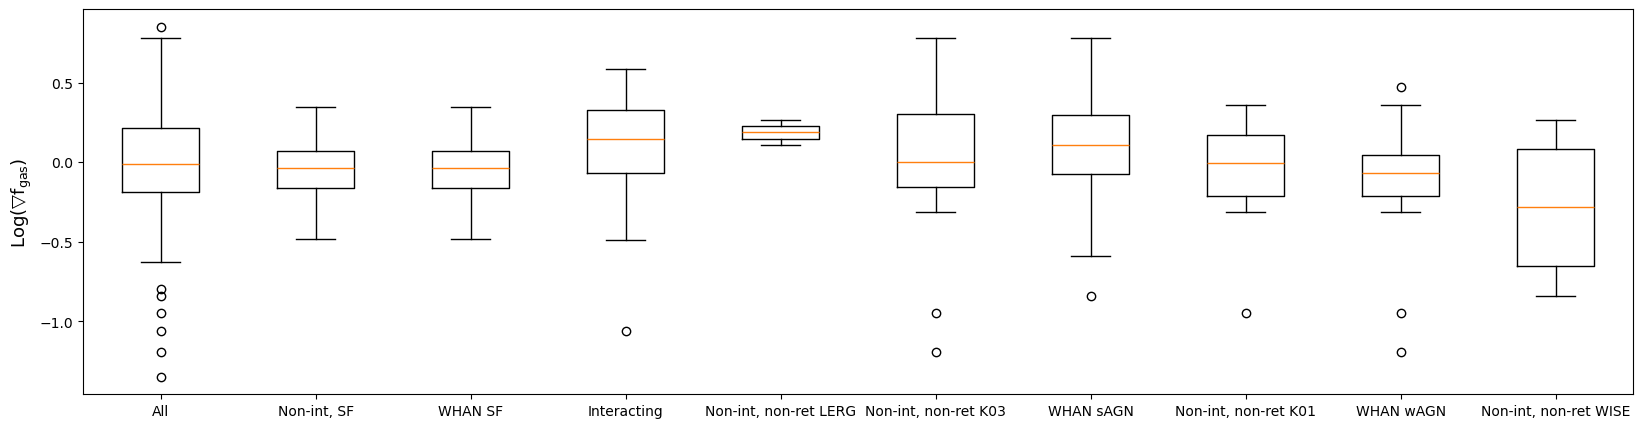

In [127]:
plt.figure(figsize = (20, 5))

plt.boxplot([np.log10(data['grad_fgas'])[sample_mask], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (~data['K03_flag']) & (~data['WISE_flag']) & (~data['LERG_flag']) & (~data['WHAN_flag'])],
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (data['WHAN_flag_multi']=='SF')],
             np.log10(data['grad_fgas'])[sample_mask][interacting], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['LERG_flag'])], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['K03_flag'])], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['WHAN_flag_multi']=='sAGN')], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['K01_flag'])], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['WHAN_flag_multi']=='wAGN')], \
             np.log10(data['grad_fgas'])[sample_mask][(~interacting) & (~retired) & (data['WISE_flag'])]], \
             labels = ['All', 'Non-int, SF', 'WHAN SF', 'Interacting', 'Non-int, non-ret LERG', 'Non-int, non-ret K03', 'WHAN sAGN', 'Non-int, non-ret K01', 'WHAN wAGN', 'Non-int, non-ret WISE'])

plt.ylabel('Log($\\bigtriangledown$f$_\\text{gas}$)', fontsize = 13)
plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result 

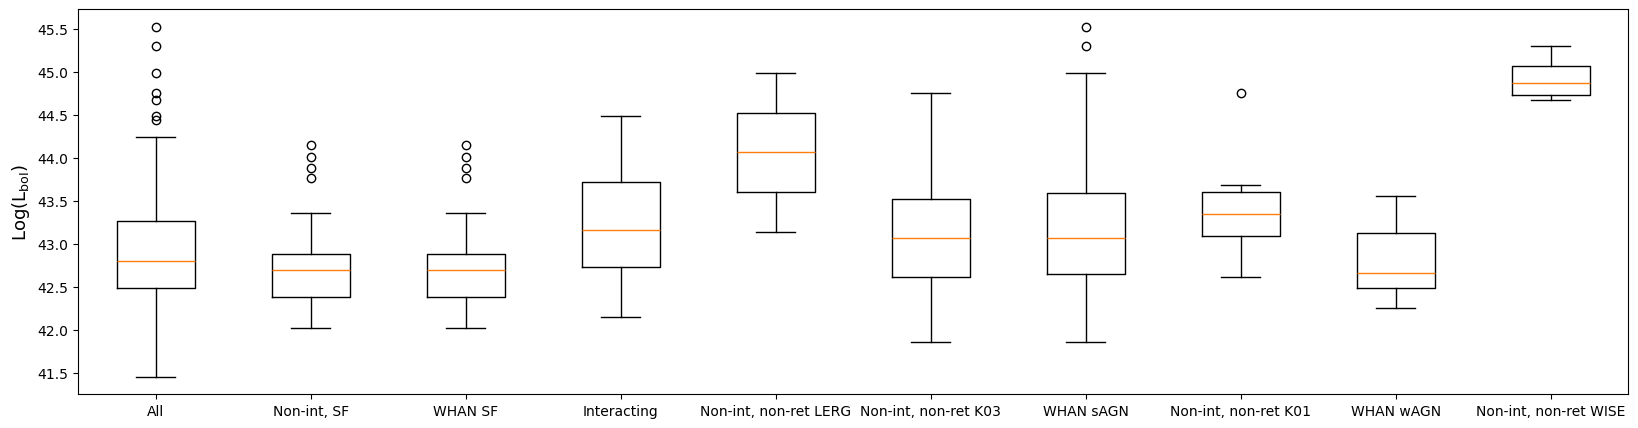

In [128]:
plt.figure(figsize = (20, 5))

plt.boxplot([np.log10(data['L_bol'])[sample_mask], \
             np.log10(data['L_bol'])[sample_mask][(~interacting) & (~retired) & (~data['K03_flag']) & (~data['WISE_flag']) & (~data['LERG_flag']) & (~data['WHAN_flag'])],
             np.log10(data['L_bol'])[sample_mask][(~interacting) & (data['WHAN_flag_multi']=='SF')],
             np.log10(data['L_bol'])[sample_mask][interacting], \
             np.log10(data['L_bol'])[sample_mask][(~interacting) & (~retired) & (data['LERG_flag'])], \
             np.log10(data['L_bol'])[sample_mask][(~interacting) & (~retired) & (data['K03_flag'])], \
             np.log10(data['L_bol'])[sample_mask][(~interacting) & (~retired) & (data['WHAN_flag_multi']=='sAGN')], \
             np.log10(data['L_bol'])[sample_mask][(~interacting) & (~retired) & (data['K01_flag'])], \
             np.log10(data['L_bol'])[sample_mask][(~interacting) & (~retired) & (data['WHAN_flag_multi']=='wAGN')], \
             np.log10(data['L_bol'])[sample_mask][(~interacting) & (~retired) & (data['WISE_flag'])]], \
             labels = ['All', 'Non-int, SF', 'WHAN SF', 'Interacting', 'Non-int, non-ret LERG', 'Non-int, non-ret K03', 'WHAN sAGN', 'Non-int, non-ret K01', 'WHAN wAGN', 'Non-int, non-ret WISE'])

plt.ylabel('Log(L$_\\text{bol}$)', fontsize = 13)
plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  r

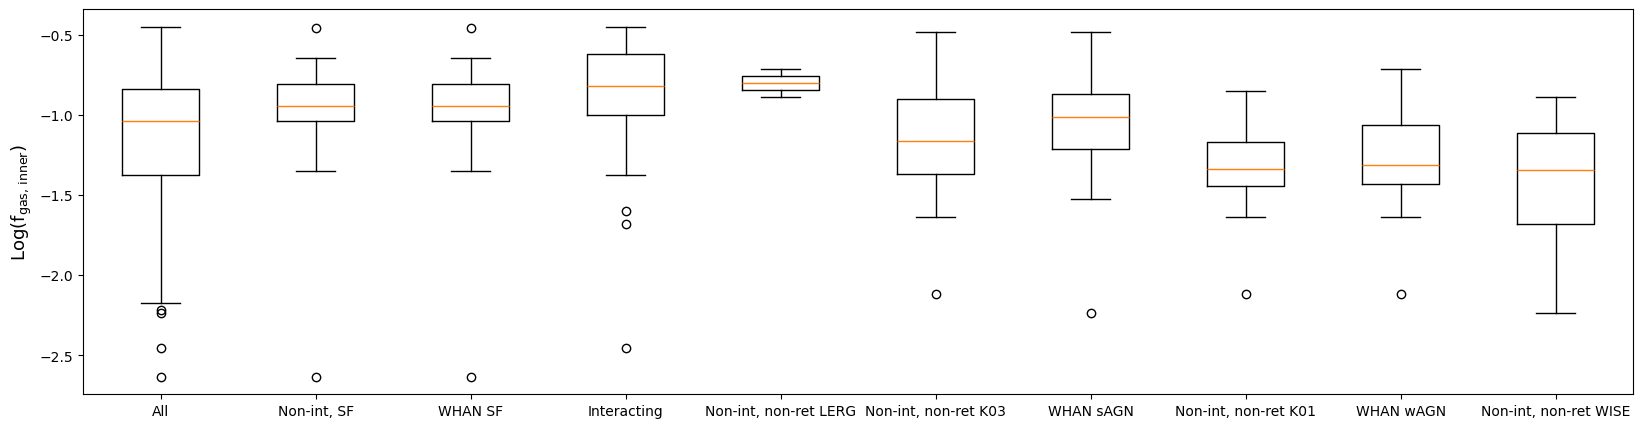

In [130]:
plt.figure(figsize = (20, 5))

plt.boxplot([np.log10(data['fgas_inner'])[sample_mask], \
             np.log10(data['fgas_inner'])[sample_mask][(~interacting) & (~retired) & (~data['K03_flag']) & (~data['WISE_flag']) & (~data['LERG_flag']) & (~data['WHAN_flag'])],
             np.log10(data['fgas_inner'])[sample_mask][(~interacting) & (data['WHAN_flag_multi']=='SF')],
             np.log10(data['fgas_inner'])[sample_mask][interacting], \
             np.log10(data['fgas_inner'])[sample_mask][(~interacting) & (~retired) & (data['LERG_flag'])], \
             np.log10(data['fgas_inner'])[sample_mask][(~interacting) & (~retired) & (data['K03_flag'])], \
             np.log10(data['fgas_inner'])[sample_mask][(~interacting) & (~retired) & (data['WHAN_flag_multi']=='sAGN')], \
             np.log10(data['fgas_inner'])[sample_mask][(~interacting) & (~retired) & (data['K01_flag'])], \
             np.log10(data['fgas_inner'])[sample_mask][(~interacting) & (~retired) & (data['WHAN_flag_multi']=='wAGN')], \
             np.log10(data['fgas_inner'])[sample_mask][(~interacting) & (~retired) & (data['WISE_flag'])]], \
             labels = ['All', 'Non-int, SF', 'WHAN SF', 'Interacting', 'Non-int, non-ret LERG', 'Non-int, non-ret K03', 'WHAN sAGN', 'Non-int, non-ret K01', 'WHAN wAGN', 'Non-int, non-ret WISE'])

plt.ylabel('Log(f$_\\text{gas, inner}$)', fontsize = 13)
plt.show()

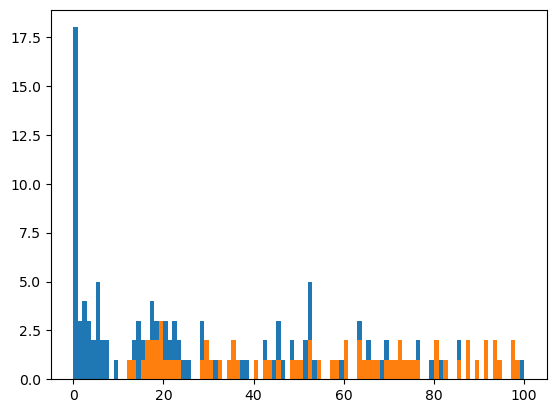

In [44]:
plt.hist(data['Nsigma_inner'], bins = 100, range = [0,100])
plt.hist(data['Nsigma_inner'][sample_mask], bins = 100, range = [0,100])
plt.show()

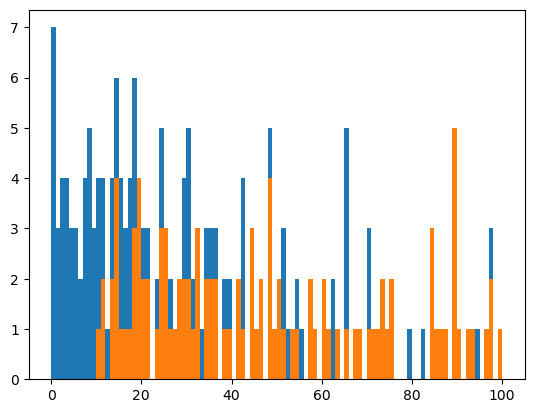

In [45]:
plt.hist(data['Nsigma_outer'], bins = 100, range = [0,100])
plt.hist(data['Nsigma_outer'][sample_mask], bins = 100, range = [0,100])
plt.show()

# AGN Samples using SDSS EW

In [379]:
# initial criteria

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 3)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 3)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

92 28


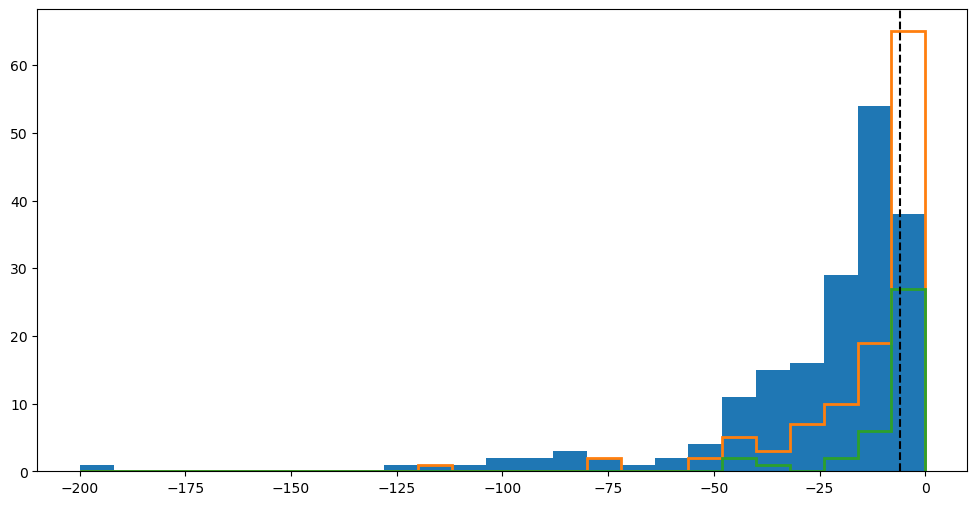

In [393]:
plt.figure(figsize = (12, 6))
plt.hist(data['Ha_eqw'][~K03_flag], bins = 25, range = [-200, 0])
plt.hist(data['Ha_eqw'][K03_flag], bins = 25, range = [-200, 0], histtype = 'step', lw = 2)
plt.hist(data['Ha_eqw'][K01_flag], bins = 25, range = [-200, 0], histtype = 'step', lw = 2)
plt.axvline(-6, ls = '--', c = 'k')
plt.show()

In [391]:
# relaxed S/N criterion

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 2)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 2)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

114 38


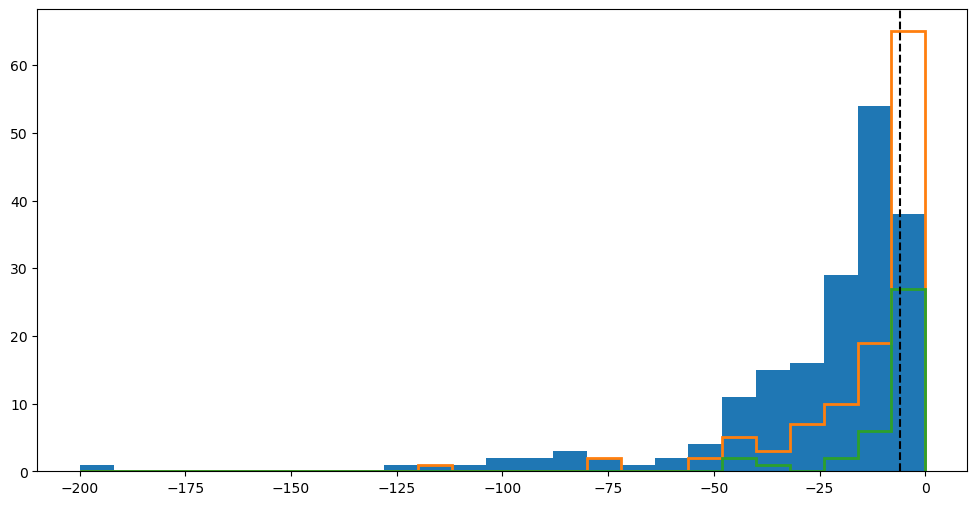

In [392]:
plt.figure(figsize = (12, 6))
plt.hist(data['Ha_eqw'][~K03_flag], bins = 25, range = [-200, 0])
plt.hist(data['Ha_eqw'][K03_flag], bins = 25, range = [-200, 0], histtype = 'step', lw = 2)
plt.hist(data['Ha_eqw'][K01_flag], bins = 25, range = [-200, 0], histtype = 'step', lw = 2)
plt.axvline(-6, ls = '--', c = 'k')
plt.show()

In [385]:
# Ellison et al. (2021) AGN criteria

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 2) & (data['Ha_eqw_sdssquery'] > 6)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 2) & (data['Ha_eqw_sdssquery'] > 6)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

21 4


In [386]:
# semi-strict cut

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 3) & (data['Ha_eqw_sdssquery'] > 3)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 3) & (data['Ha_eqw_sdssquery'] > 3)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

29 4


In [387]:
# strict cut

K03_flag  = (data['K03_lauca'] == 'AGN') & (data['agn_sn'] > 3) & (data['Ha_eqw_sdssquery'] > 6)
K01_flag  = (data['K01_lauca'] == 'AGN') & (data['agn_sn'] > 3) & (data['Ha_eqw_sdssquery'] > 6)

print(len(K03_flag[K03_flag]), len(K01_flag[K01_flag]))

21 4


In [ ]:
# remake this figure with a S/N cut in it...

plt.figure(figsize = (12, 5))
plt.hist(Ha_eqw1 - Ha_eqw, bins = 200, range = [-7,7], label = '-flux / cont')
plt.hist(Ha_eqw_query_matched - (-Ha_eqw), bins = 200, range = [-7,7], histtype = 'step', lw = 2, label = 'Queried from SDSS')
plt.axvline(np.nanmedian(Ha_eqw_query_matched - (-Ha_eqw)), ls = '--', c = 'k')
plt.axvline(np.nanmedian(Ha_eqw1 - Ha_eqw), ls = '--', c = 'k')
plt.legend(fontsize = 13)
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('New EW - Lauca EW Table', fontsize = 14)
plt.show()

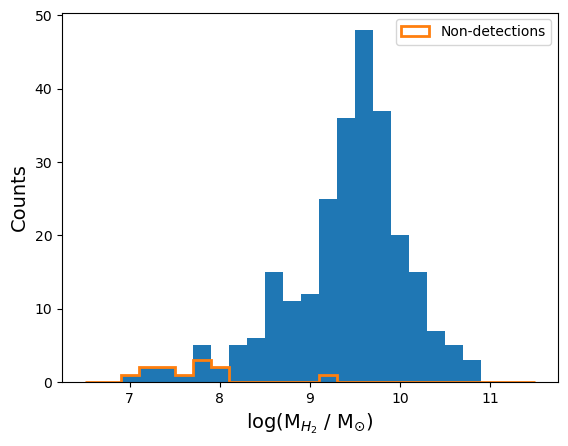

In [454]:
plt.figure()
plt.hist(data['MH2_total'].to_numpy(), range = [6.5,11.5], bins = 25)
plt.hist(data['MH2_total'][data['Nsigma_total'] < 5].to_numpy(), range = [6.5,11.5], bins = 25, label = 'Non-detections', histtype = 'step', lw = 2)
plt.xlabel('log(M$_{H_2}$ / M$_{\\odot}$)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fancybox = True)
plt.show()

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


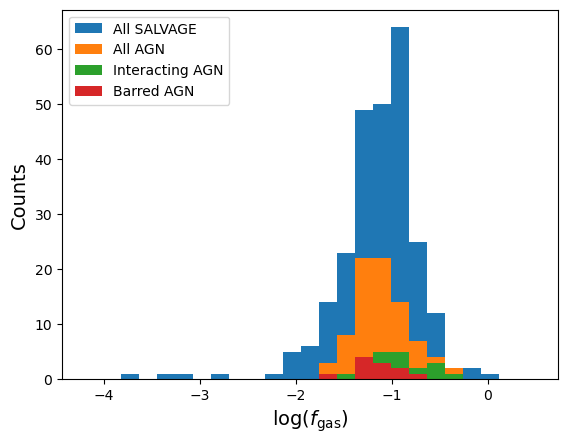

In [456]:
plt.figure()
plt.hist(np.log10(data['fgas_total']).to_numpy(), bins = 25, range = [-4.2,0.5], label = 'All SALVAGE')
plt.hist(np.log10(data['fgas_total'][data['AGN_flag']]).to_numpy(), bins = 25, range = [-4.2,0.5], label = 'All AGN')
plt.hist(np.log10(data['fgas_total'][(data['AGN_flag']) & (data['Nsigma_total']>5) & ((data['visual_class']=='M') | (data['visual_class']=='P'))]).to_numpy(), bins = 25, range = [-4.2,0.5], label = 'Interacting AGN')
plt.hist(np.log10(data['fgas_total'][(data['AGN_flag']) & (data['Nsigma_total']>5) & (data['visual_class']=='B')]).to_numpy(), bins = 25, range = [-4.2,0.5], label = 'Barred AGN')
plt.xlabel('log($f_{\\text{gas}}$)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fancybox = True)
plt.show()

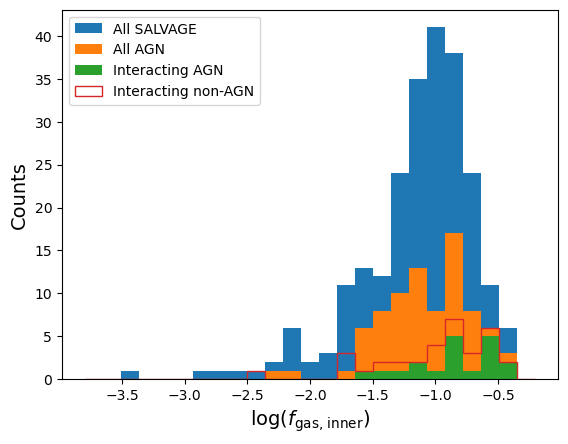

In [459]:
range_ = [-3.8, -0.2]

plt.figure()
plt.hist(np.log10(data['fgas_inner'][data['Nsigma_inner']>5]).to_numpy(), bins = 25, range = range_, label = 'All SALVAGE')
plt.hist(np.log10(data['fgas_inner'][(data['AGN_flag']) & (data['Nsigma_inner']>5)]).to_numpy(), bins = 25, range = range_, label = 'All AGN')
plt.hist(np.log10(data['fgas_inner'][(data['AGN_flag']) & (data['Nsigma_inner']>5) & ((data['visual_class']=='M') | (data['visual_class']=='P'))]).to_numpy(), bins = 25, range = range_, label = 'Interacting AGN')
plt.hist(np.log10(data['fgas_inner'][(data['Nsigma_inner']>5) & ((data['visual_class']=='M') | (data['visual_class']=='P'))]).to_numpy(), bins = 25, range = range_, label = 'Interacting non-AGN', histtype = 'step')
#plt.hist(np.log10(data['fgas_inner'][(data['AGN_flag']) & (data['Nsigma_inner']>5) & (data['visual_class']=='B')]).to_numpy(), bins = 25, range = range_, label = 'Barred AGN')
plt.xlabel('log($f_{\\text{gas, inner}}$)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fancybox = True)
plt.show()

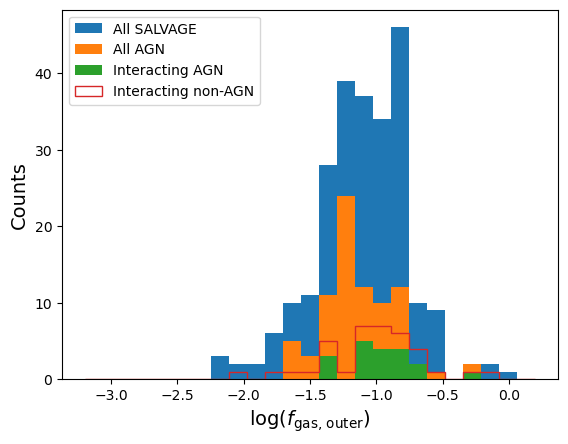

In [462]:
range_ = [-3.2, 0.2]

plt.figure()
plt.hist(np.log10(data['fgas_outer'][data['Nsigma_outer']>5]).to_numpy(), bins = 25, range = range_, label = 'All SALVAGE')
plt.hist(np.log10(data['fgas_outer'][(data['AGN_flag']) & (data['Nsigma_outer']>5)]).to_numpy(), bins = 25, range = range_, label = 'All AGN')
plt.hist(np.log10(data['fgas_outer'][(data['AGN_flag']) & (data['Nsigma_outer']>5) & ((data['visual_class']=='M') | (data['visual_class']=='P'))]).to_numpy(), bins = 25, range = range_, label = 'Interacting AGN')
plt.hist(np.log10(data['fgas_outer'][(data['Nsigma_outer']>5) & ((data['visual_class']=='M') | (data['visual_class']=='P'))]).to_numpy(), bins = 25, range = range_, label = 'Interacting non-AGN', histtype = 'step')
#plt.hist(np.log10(data['fgas_inner'][(data['AGN_flag']) & (data['Nsigma_inner']>5) & (data['visual_class']=='B')]).to_numpy(), bins = 25, range = range_, label = 'Barred AGN')
plt.xlabel('log($f_{\\text{gas, outer}}$)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fancybox = True)
plt.show()

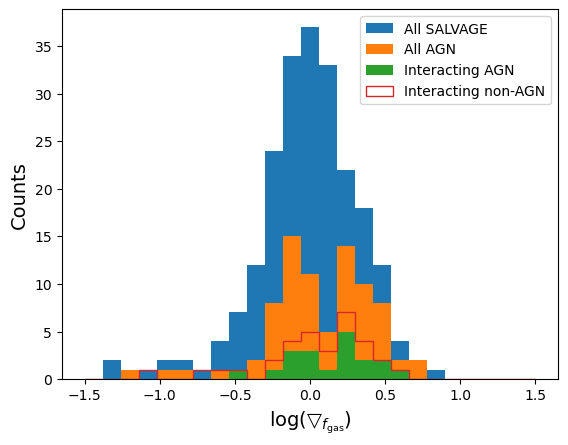

In [467]:
range_ = [-1.5, 1.5]

plt.figure()
plt.hist(np.log10(data['grad_fgas'][(data['Nsigma_inner']>5) & (data['Nsigma_outer']>5)]).to_numpy(), bins = 25, range = range_, label = 'All SALVAGE')
plt.hist(np.log10(data['grad_fgas'][(data['AGN_flag']) & (data['Nsigma_inner']>5) & (data['Nsigma_outer']>5)]).to_numpy(), bins = 25, range = range_, label = 'All AGN')
plt.hist(np.log10(data['grad_fgas'][(data['AGN_flag']) & (data['Nsigma_inner']>5) & (data['Nsigma_outer']>5) & ((data['visual_class']=='M') | (data['visual_class']=='P'))]).to_numpy(), bins = 25, range = range_, label = 'Interacting AGN')
plt.hist(np.log10(data['grad_fgas'][(data['Nsigma_inner']>5) & (data['Nsigma_outer']>5)& ((data['visual_class']=='M') | (data['visual_class']=='P'))]).to_numpy(), bins = 25, range = range_, label = 'Interacting non-AGN', histtype = 'step')
#plt.hist(np.log10(data['fgas_inner'][(data['AGN_flag']) & (data['Nsigma_inner']>5) & (data['visual_class']=='B')]).to_numpy(), bins = 25, range = range_, label = 'Barred AGN')
plt.xlabel('log($\\bigtriangledown_{f_{\\text{gas}}}$)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fancybox = True)
plt.show()

In [197]:
data['mstar_inner'][data['objID']==587742550147137777]

190    8.75151
Name: mstar_inner, dtype: float64

In [198]:
data['MH2_inner'][data['objID']==587742550147137777]

190    10.05243
Name: MH2_inner, dtype: float64

In [201]:
data['objID'][sample_mask][data['fgas_inner'][sample_mask]>0.8]

41     587726032765059337
159    587739647273533569
Name: objID, dtype: int64

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


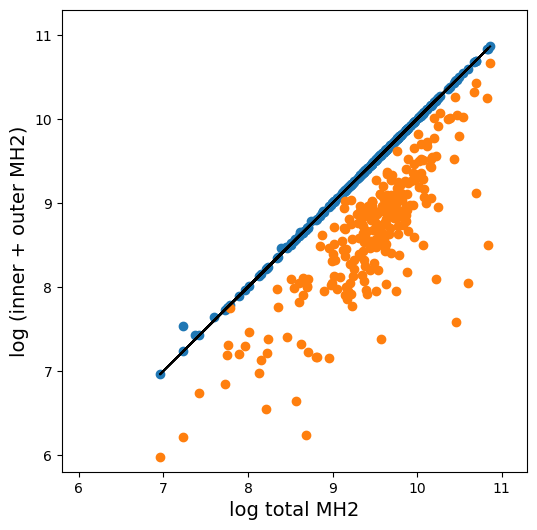

In [469]:
plt.figure(figsize = (6,6))
plt.scatter(data['MH2_total'],np.log10(10**data['MH2_inner'] + 10**data['MH2_outer']))
plt.scatter(data['MH2_total'],np.log10(10**data['MH2_inner']))
#plt.scatter(data['MH2_total'],np.log10(10**data['MH2_outer']))
plt.plot(data['MH2_total'],data['MH2_total'], color = 'k')
plt.xlabel('log total MH2', fontsize = 14)
plt.ylabel('log (inner + outer MH2)', fontsize = 14)
plt.xlim(5.8,11.3)
plt.ylim(5.8,11.3)
plt.show()

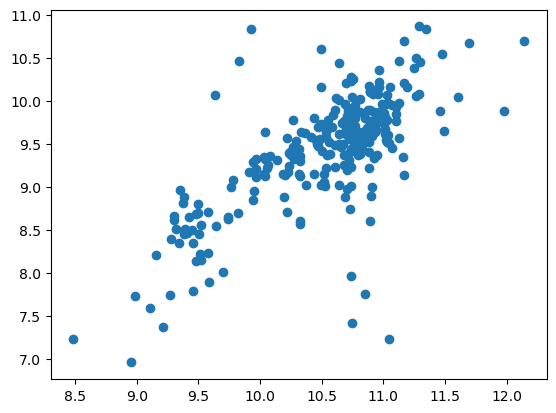

In [470]:
plt.scatter(data['mstar_total'], data['MH2_total'])

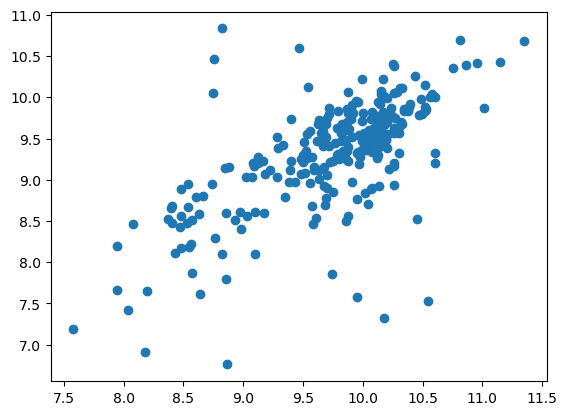

In [143]:
plt.scatter(data['mstar_inner'], data['MH2_inner'])

## Make AGN selection

In [93]:
print(len(mass_tot[idx_tab]))

239


In [94]:
print(len(mass_tot[idx_tab][(K03[idx_tab]=='AGN') & (agn_sn[idx_tab]>3)]))
print(len(mass_tot[idx_tab][(K01[idx_tab]=='AGN') & (agn_sn[idx_tab]>3)]))

85
26


In [95]:
print(len(mass_tot[idx_tab][(K03[idx_tab]=='AGN') & (agn_sn[idx_tab]>3) & (Ha_eqw[idx_tab]>10)]))
print(len(mass_tot[idx_tab][(K01[idx_tab]=='AGN') & (agn_sn[idx_tab]>3) & (Ha_eqw[idx_tab]>10)]))

85
26


In [96]:
print(len(mass_tot[idx_tab][W1[idx_tab]-W2[idx_tab]>0.5]))
print(len(mass_tot[idx_tab][((K03[idx_tab]=='AGN') & (agn_sn[idx_tab]>3)) | (W1[idx_tab]-W2[idx_tab]>0.5)]))

7
89


In [35]:
print(len(mass_tot[idx_tab][W1[idx_tab]-W2[idx_tab]>0.5]))
print(len(mass_tot[idx_tab][((K03[idx_tab]=='AGN') & (agn_sn[idx_tab]>3)) | ((W1[idx_tab]-W2[idx_tab]>0.5) & (W1_sn[idx_tab]>50) & (W2_sn[idx_tab]>50))]))

7
89


In [36]:
print(len(mass_tot[idx_tab][np.array([ID in LERG_ids for ID in table_id[idx_tab]])]))
print(len(mass_tot[idx_tab][np.array([ID in HERG_ids for ID in table_id[idx_tab]])]))

1
0


In [89]:
BPT_flag  = (K03[idx_tab]=='AGN') & (agn_sn[idx_tab]>3) & (Ha_eqw[idx_tab]>10)
K01_flag  = (K01[idx_tab]=='AGN') & (agn_sn[idx_tab]>3) & (Ha_eqw[idx_tab]>10)
K03_flag  = (K03[idx_tab]=='AGN') & (agn_sn[idx_tab]>3) & (Ha_eqw[idx_tab]>10)
WISE_flag = (W1[idx_tab]-W2[idx_tab]>0.5) & (W1_sn[idx_tab]>50) & (W2_sn[idx_tab]>50)
LERG_flag = np.array([ID in LERG_ids for ID in table_id[idx_tab]])
AGN_flag  = BPT_flag | WISE_flag | LERG_flag

## Visualize Sample

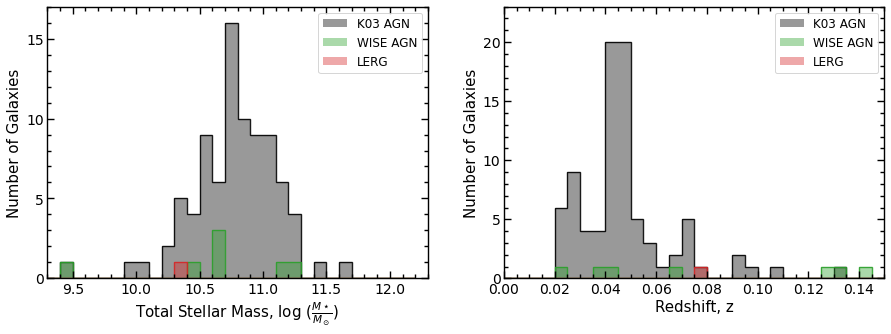

In [90]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))

ax1.hist(mass_tot[idx_tab][BPT_flag], range = [9.2, 12.2], bins = 30, color = 'k', alpha = 0.4, label = 'K03 AGN', zorder = -2)
ax1.hist(mass_tot[idx_tab][BPT_flag], range = [9.2, 12.2], bins = 30, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = -2)
ax1.hist(mass_tot[idx_tab][WISE_flag], range = [9.2, 12.2], bins = 30, color = 'tab:green', alpha = 0.4, label = 'WISE AGN', zorder = -1)
ax1.hist(mass_tot[idx_tab][WISE_flag], range = [9.2, 12.2], bins = 30, color = 'tab:green', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = -1)
ax1.hist(mass_tot[idx_tab][LERG_flag], range = [9.2, 12.2], bins = 30, color = 'tab:red', alpha = 0.4, label = 'LERG', zorder = 0)
ax1.hist(mass_tot[idx_tab][LERG_flag], range = [9.2, 12.2], bins = 30, color = 'tab:red', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = 0)


ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12.4,0.1), minor = True)
ax1.set_xlim(9.3, 12.3)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)

ax1.set_xlabel('Total Stellar Mass, log ($\\frac{M\\star}{M_\\odot}$)', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(z_sdss[idx_tab][BPT_flag], range = [0,0.15], bins = 30, color = 'k', alpha = 0.4, label = 'K03 AGN', zorder = -2)
ax2.hist(z_sdss[idx_tab][BPT_flag], range = [0,0.15], bins = 30, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = -2)
ax2.hist(z_sdss[idx_tab][WISE_flag], range = [0,0.15], bins = 30, color = 'tab:green', alpha = 0.4, label = 'WISE AGN', zorder = -1)
ax2.hist(z_sdss[idx_tab][WISE_flag], range = [0,0.15], bins = 30, color = 'tab:green', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = -1)
ax2.hist(z_sdss[idx_tab][LERG_flag], range = [0,0.15], bins = 30, color = 'tab:red', alpha = 0.4, label = 'LERG', zorder = 0)
ax2.hist(z_sdss[idx_tab][LERG_flag], range = [0,0.15], bins = 30, color = 'tab:red', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = 0)

ax2.set_xticks(np.arange(0,0.16,0.02))
ax2.set_xticks(np.arange(0,0.16,0.005), minor = True)
ax2.set_xlim(0, 0.15)
ax2.set_yticks(np.arange(0,25,5))
ax2.set_yticks(np.arange(0,25,1), minor = True)
ax2.set_ylim(0, 23)

ax2.set_xlabel('Redshift, z', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

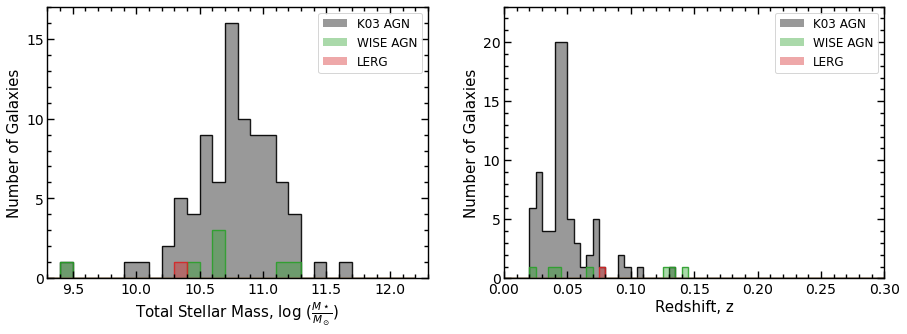

In [91]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))

ax1.hist(mass_tot[idx_tab][BPT_flag], range = [9.2, 12.2], bins = 30, color = 'k', alpha = 0.4, label = 'K03 AGN', zorder = -2)
ax1.hist(mass_tot[idx_tab][BPT_flag], range = [9.2, 12.2], bins = 30, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = -2)
ax1.hist(mass_tot[idx_tab][WISE_flag], range = [9.2, 12.2], bins = 30, color = 'tab:green', alpha = 0.4, label = 'WISE AGN', zorder = -1)
ax1.hist(mass_tot[idx_tab][WISE_flag], range = [9.2, 12.2], bins = 30, color = 'tab:green', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = -1)
ax1.hist(mass_tot[idx_tab][LERG_flag], range = [9.2, 12.2], bins = 30, color = 'tab:red', alpha = 0.4, label = 'LERG', zorder = 0)
ax1.hist(mass_tot[idx_tab][LERG_flag], range = [9.2, 12.2], bins = 30, color = 'tab:red', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = 0)


ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12.4,0.1), minor = True)
ax1.set_xlim(9.3, 12.3)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)

ax1.set_xlabel('Total Stellar Mass, log ($\\frac{M\\star}{M_\\odot}$)', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(z_sdss[idx_tab][BPT_flag], range = [0,0.3], bins = 60, color = 'k', alpha = 0.4, label = 'K03 AGN', zorder = -2)
ax2.hist(z_sdss[idx_tab][BPT_flag], range = [0,0.3], bins = 60, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = -2)
ax2.hist(z_sdss[idx_tab][WISE_flag], range = [0,0.3], bins = 60, color = 'tab:green', alpha = 0.4, label = 'WISE AGN', zorder = -1)
ax2.hist(z_sdss[idx_tab][WISE_flag], range = [0,0.3], bins = 60, color = 'tab:green', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = -1)
ax2.hist(z_sdss[idx_tab][LERG_flag], range = [0,0.3], bins = 60, color = 'tab:red', alpha = 0.4, label = 'LERG', zorder = 0)
ax2.hist(z_sdss[idx_tab][LERG_flag], range = [0,0.3], bins = 60, color = 'tab:red', alpha = 0.9, histtype = 'step', lw = 1.4, zorder = 0)

ax2.set_xticks(np.arange(0,0.31,0.05))
ax2.set_xticks(np.arange(0,0.31,0.01), minor = True)
ax2.set_xlim(0, 0.3)
ax2.set_yticks(np.arange(0,25,5))
ax2.set_yticks(np.arange(0,25,1), minor = True)
ax2.set_ylim(0, 23)

ax2.set_xlabel('Redshift, z', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)
        
#plt.savefig('AGN-distributions.png', bbox_inches = 'tight', dpi = 200)
plt.show()

## Identify Control Pool

### OPTION A: Must be SF (e.g. have emission lines consistent with SF) and not in my AGN sample

In [40]:
print(len(mass_tot[idx_tab][(K03[idx_tab]=='SF') & (agn_sn[idx_tab]>2) & ~AGN_flag]))

106


### OPTION B: CANNOT be in AGN sample (BPT, WISE or LERG) and CANNOT be WEAK BPT AGN

In [41]:
WEAK_BPT = (K03[idx_tab]=='AGN') # cannot have emission lines consistent with BPT AGN, regardless of S/N
print(len(mass_tot[idx_tab][~WEAK_BPT & ~AGN_flag]))

122


In [42]:
len(np.intersect1d(table_id[idx_tab][(K03[idx_tab]=='SF') & (agn_sn[idx_tab]>2) & ~AGN_flag], table_id[idx_tab][~WEAK_BPT & ~AGN_flag]))

106

OPTION B is entirely inclusive of OPTION A.

## Match best controls

In [92]:
#find the best matches

dz_bm,dm_bm=[],[]

ids_control = []
z_control = []
mass_control = []
dist_controls = []
agn_success = []
has_control = []

agn_mask  = BPT_flag | WISE_flag | LERG_flag

mass_agn  = mass_tot[idx_tab][agn_mask]
sfr_agn   = sfr_tot[idx_tab][agn_mask]
z_agn     = z_sdss[idx_tab][agn_mask]
objID_agn = table_id[idx_tab][agn_mask]

#control_mask = ((K03[idx_tab]=='SF') & (agn_sn[idx_tab]>2)) | (agn_sn[idx_tab]<2)
control_mask = ~(agn_mask) & (K03[idx_tab] != 'AGN')

mass_pool  = mass_tot[idx_tab][control_mask]
sfr_pool   = sfr_tot[idx_tab][control_mask]
z_pool     = z_sdss[idx_tab][control_mask]
objID_pool = table_id[idx_tab][control_mask]


for ID,z,m,s in zip(objID_agn,z_agn,mass_agn, sfr_agn):
    
    # clip control pool to maximum limits
    mask1 = np.abs(mass_pool - m) < 0.3
    mask2 = np.abs(z_pool - z) < 0.02
    mask3 = np.abs(sfr_pool - s) < 1
    
    mask = mask1 & mask2 & mask3

    match_mass = mass_pool[mask]
    match_zed = z_pool[mask]
    match_obj = objID_pool[mask]
    
    #print(m)
    #plt.figure()
    #plt.hist(match_mass)
    #plt.axvline(m)
    #plt.show()

    # Reset comparison values
    dist_bm=10 # dummy value

    for ii in range(len(match_mass)):

        dz = np.log10(match_zed[ii] / z)
        dm = match_mass[ii] - m
        dist = np.sqrt(dz**2 + dm**2)

        # If best match so far, keep
        if (dist < dist_bm) and (match_obj[ii] not in ids_control):

            dist_bm=dist
            o_bm=match_obj[ii]
            m_bm=match_mass[ii]
            z_bm=match_zed[ii]

    if dist_bm<10:

        agn_success.append(ID)

        dz_bm.append(z_bm - z)
        dm_bm.append(m_bm - m)
        z_control.append(z_bm)
        mass_control.append(m_bm)
        ids_control.append(o_bm)
        dist_controls.append(dist_bm)
        
        has_control.append(True)
        
    else:
        
        has_control.append(False)

print(len(ids_control), len(z_control), len(mass_control))


has_control = np.array(has_control)

63 63 63


In [44]:
is_control = []

for ID in table_id[idx_tab]:
    
    if ID in ids_control:
        
        is_control.append(True)
        
    else:
        
        is_control.append(False)
        
is_control = np.array(is_control)

In [45]:
has_control = []

for ID in table_id[idx_tab]:
    
    if ID in agn_success:
        
        has_control.append(True)
        
    else:
        
        has_control.append(False)
        
has_control = np.array(has_control)

In [46]:
len(agn_success)

63

(array([ 3.,  0.,  3.,  5., 21., 14., 10.,  1.,  2.,  4.]),
 array([-0.017877 , -0.0141765, -0.010476 , -0.0067755, -0.003075 ,
         0.0006255,  0.004326 ,  0.0080265,  0.011727 ,  0.0154275,
         0.019128 ]),
 <BarContainer object of 10 artists>)

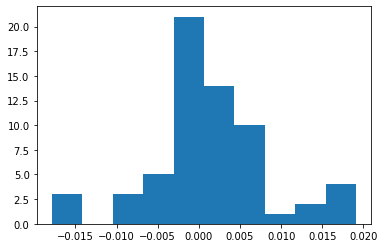

In [47]:
plt.hist(dz_bm)

In [48]:
np.max(z_sdss[idx_tab][has_control])

0.128077

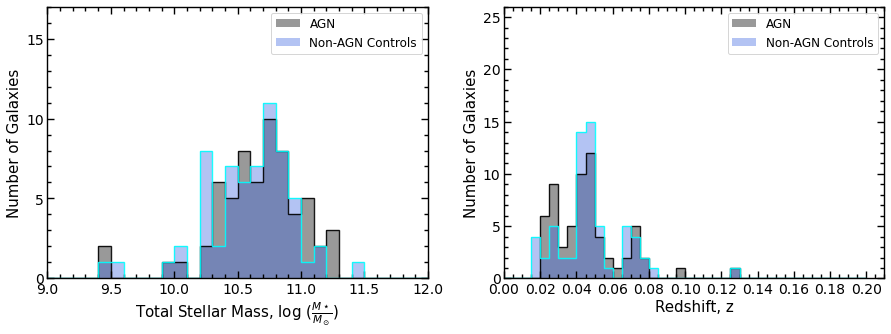

In [49]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))

ax1.hist(mass_tot[idx_tab][has_control], range = [9, 12], bins = 30, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(mass_tot[idx_tab][has_control], range = [9, 12], bins = 30, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax1.hist(mass_control, range = [9, 12], bins = 30, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax1.hist(mass_control, range = [9, 12], bins = 30, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)

ax1.set_xlabel('Total Stellar Mass, log ($\\frac{M\\star}{M_\\odot}$)', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(z_sdss[idx_tab][has_control], range = [0,0.2], bins = 40, color = 'k', alpha = 0.4, label = 'AGN')
ax2.hist(z_sdss[idx_tab][has_control], range = [0,0.2], bins = 40, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax2.hist(z_control, range = [0,0.2], bins = 40, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax2.hist(z_control, range = [0,0.2], bins = 40, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

ax2.set_xticks(np.arange(0,0.22,0.02))
ax2.set_xticks(np.arange(0,0.22,0.005), minor = True)
ax2.set_xlim(0, 0.21)
ax2.set_yticks(np.arange(0,30,5))
ax2.set_yticks(np.arange(0,30,1), minor = True)
ax2.set_ylim(0, 26)

ax2.set_xlabel('Redshift, z', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

#plt.savefig('SALVAGE-AGN-control-match-histograms-July29.png', bbox_inches = 'tight', dpi = 200)
plt.show()

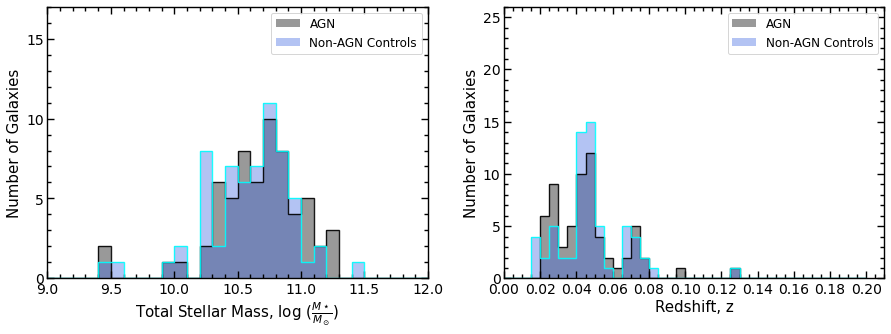

In [50]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))

ax1.hist(mass_tot[idx_tab][has_control], range = [9, 12], bins = 30, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(mass_tot[idx_tab][has_control], range = [9, 12], bins = 30, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax1.hist(mass_tot[idx_tab][is_control], range = [9, 12], bins = 30, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax1.hist(mass_tot[idx_tab][is_control], range = [9, 12], bins = 30, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)

ax1.set_xlabel('Total Stellar Mass, log ($\\frac{M\\star}{M_\\odot}$)', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(z_sdss[idx_tab][has_control], range = [0,0.2], bins = 40, color = 'k', alpha = 0.4, label = 'AGN')
ax2.hist(z_sdss[idx_tab][has_control], range = [0,0.2], bins = 40, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax2.hist(z_control, range = [0,0.2], bins = 40, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax2.hist(z_control, range = [0,0.2], bins = 40, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

ax2.set_xticks(np.arange(0,0.22,0.02))
ax2.set_xticks(np.arange(0,0.22,0.005), minor = True)
ax2.set_xlim(0, 0.21)
ax2.set_yticks(np.arange(0,30,5))
ax2.set_yticks(np.arange(0,30,1), minor = True)
ax2.set_ylim(0, 26)

ax2.set_xlabel('Redshift, z', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

#plt.savefig('SALVAGE-AGN-control-match-histograms-July29.png', bbox_inches = 'tight', dpi = 200)
plt.show()

In [51]:
grad_ssfr = np.log10((10**sfr_fib / 10**mass_fib) / (10**sfr_out / 10**mass_out))
delta_ssfr = np.log10((10**sfr_fib / 10**mass_fib)) - np.log10((10**sfr_out / 10**mass_out))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


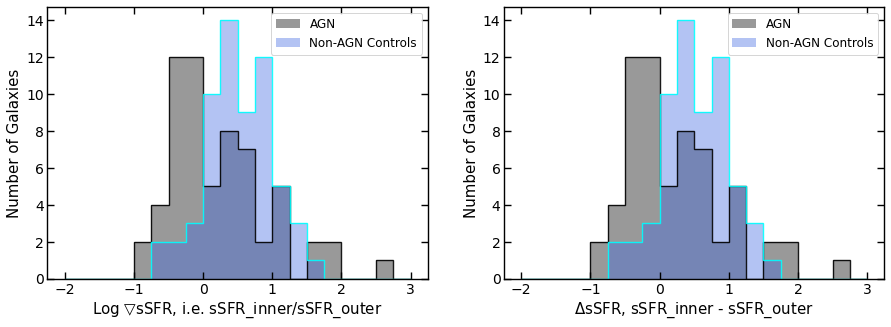

In [52]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))


ax1.hist(grad_ssfr[idx_tab][has_control], range = [-2,3], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(grad_ssfr[idx_tab][has_control], range = [-2,3], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax1.hist(grad_ssfr[idx_tab][is_control], range = [-2,3], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax1.hist(grad_ssfr[idx_tab][is_control], range = [-2,3], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


'''
ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)
'''

ax1.set_xlabel('Log $\\bigtriangledown$sSFR, i.e. sSFR_inner/sSFR_outer', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(delta_ssfr[idx_tab][has_control], range = [-2,3], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax2.hist(delta_ssfr[idx_tab][has_control], range = [-2,3], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax2.hist(delta_ssfr[idx_tab][is_control], range = [-2,3], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax2.hist(delta_ssfr[idx_tab][is_control], range = [-2,3], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

'''
ax2.set_xticks(np.arange(0,0.16,0.02))
ax2.set_xticks(np.arange(0,0.16,0.005), minor = True)
ax2.set_xlim(0, 0.15)
ax2.set_yticks(np.arange(0,25,5))
ax2.set_yticks(np.arange(0,25,1), minor = True)
ax2.set_ylim(0, 23)
'''

ax2.set_xlabel('$\\Delta$sSFR, sSFR_inner - sSFR_outer', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

In [53]:
len(np.intersect1d(ids_control, objID_sample))

63

In [54]:
len(objID_sample)

242

# Initial Science Plots (August 6th)

In [55]:
#Query MySQL for SDSS and xCOLD GASS ancillary data

db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')
x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec, u.petroR50_r, u.total_sfr_med, u.fiber_mass_med, u.fiber_sfr_med, x.LogMH2, x.LogMH2_lim FROM dr7_uberuber u, xCOLDGASS x WHERE u.objID=x.objID AND u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
data = np.array(db_data, dtype = float).T
table_id_xcg = np.array(db_data, dtype = str).T[0]

ra_xcg = data[1]
dec_xcg = data[2]
mass_xcg = data[3]
z_xcg = data[4]
rpetro_xcg = data[5]
sfr_xcg = data[6]
fib_mass_xcg = data[7]
fib_sfr_xcg = data[8]
M_H2_xcg = data[9]
M_H2_lim_xcg = data[10]

In [56]:
# compute ssfr gradients

ssfr = 10**sfr_tot[idx_tab] / 10**mass_tot[idx_tab]

ssfr_inner = 10**sfr_fib[idx_tab] / 10**mass_fib[idx_tab]
ssfr_outer = (10**sfr_tot[idx_tab] - 10**sfr_fib[idx_tab]) / (10**mass_tot[idx_tab] - 10**mass_fib[idx_tab])

grad_ssfr = ssfr_inner/ssfr_outer

len(grad_ssfr)

242

In [57]:
# compute fgas gradients

fgas = 10**M_H2[idx_sam] / (10**mass_tot[idx_tab] + 10**M_H2[idx_sam])

fgas_inner = 10**M_H2_inner_stacked[idx_sam] / (10**mass_fib[idx_tab] + 10**M_H2_inner_stacked[idx_sam])
fgas_outer = 10**M_H2_outer_stacked[idx_sam] / (10**mass_tot[idx_tab]-10**mass_fib[idx_tab] + 10**M_H2_outer_stacked[idx_sam])

grad_fgas = fgas_inner/fgas_outer

print(len(grad_fgas))

242


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [58]:
# compute sfe gradients

sfe = 10**M_H2[idx_sam] / 10**sfr_tot[idx_tab]

sfe_inner = 10**M_H2_inner_stacked[idx_sam] / 10**sfr_fib[idx_tab] 
sfe_outer = 10**M_H2_outer_stacked[idx_sam] / (10**sfr_tot[idx_tab]-10**sfr_fib[idx_tab])

grad_sfe = sfe_inner/sfe_outer

print(len(grad_sfe))

242


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


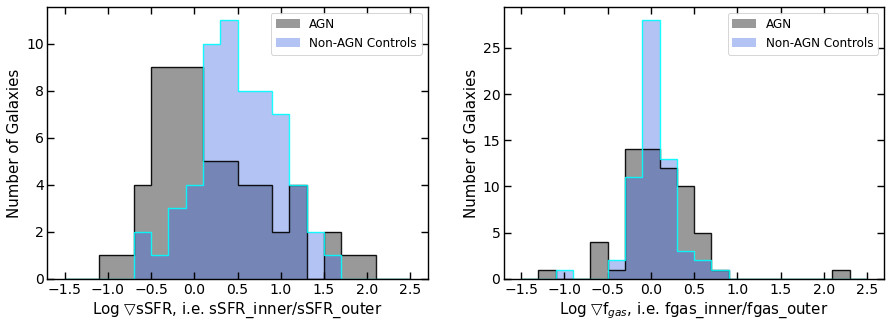

In [59]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))


ax1.hist(np.log10(grad_ssfr[has_control]), range = [-1.5,2.5], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(np.log10(grad_ssfr[has_control]), range = [-1.5,2.5], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax1.hist(np.log10(grad_ssfr[is_control]), range = [-1.5,2.5], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax1.hist(np.log10(grad_ssfr[is_control]), range = [-1.5,2.5], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


'''
ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)
'''

ax1.set_xlabel('Log $\\bigtriangledown$sSFR, i.e. sSFR_inner/sSFR_outer', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(np.log10(grad_fgas[has_control]), range = [-1.5,2.5], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax2.hist(np.log10(grad_fgas[has_control]), range = [-1.5,2.5], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax2.hist(np.log10(grad_fgas[is_control]), range = [-1.5,2.5], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax2.hist(np.log10(grad_fgas[is_control]), range = [-1.5,2.5], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

'''
ax2.set_xticks(np.arange(0,0.16,0.02))
ax2.set_xticks(np.arange(0,0.16,0.005), minor = True)
ax2.set_xlim(0, 0.15)
ax2.set_yticks(np.arange(0,25,5))
ax2.set_yticks(np.arange(0,25,1), minor = True)
ax2.set_ylim(0, 23)
'''

ax2.set_xlabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


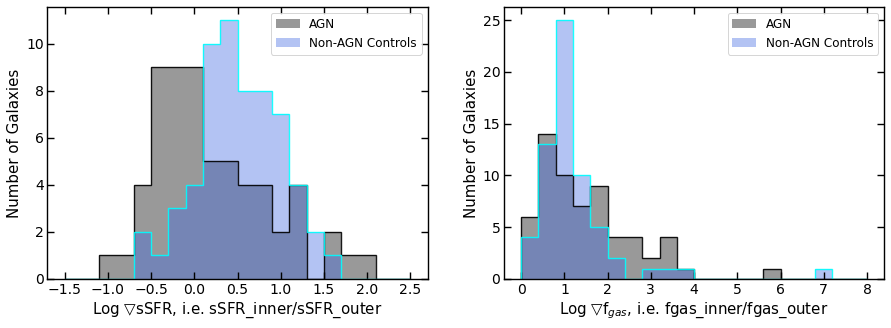

In [79]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))


ax1.hist(np.log10(grad_ssfr[has_control]), range = [-1.5,2.5], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(np.log10(grad_ssfr[has_control]), range = [-1.5,2.5], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax1.hist(np.log10(grad_ssfr[is_control]), range = [-1.5,2.5], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax1.hist(np.log10(grad_ssfr[is_control]), range = [-1.5,2.5], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


'''
ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)
'''

ax1.set_xlabel('Log $\\bigtriangledown$sSFR, i.e. sSFR_inner/sSFR_outer', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(grad_fgas[has_control], range = [0,8], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax2.hist(grad_fgas[has_control], range = [0,8], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax2.hist(grad_fgas[is_control], range = [0,8], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax2.hist(grad_fgas[is_control], range = [0,8], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

'''
ax2.set_xticks(np.arange(0,0.16,0.02))
ax2.set_xticks(np.arange(0,0.16,0.005), minor = True)
ax2.set_xlim(0, 0.15)
ax2.set_yticks(np.arange(0,25,5))
ax2.set_yticks(np.arange(0,25,1), minor = True)
ax2.set_ylim(0, 23)
'''

ax2.set_xlabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

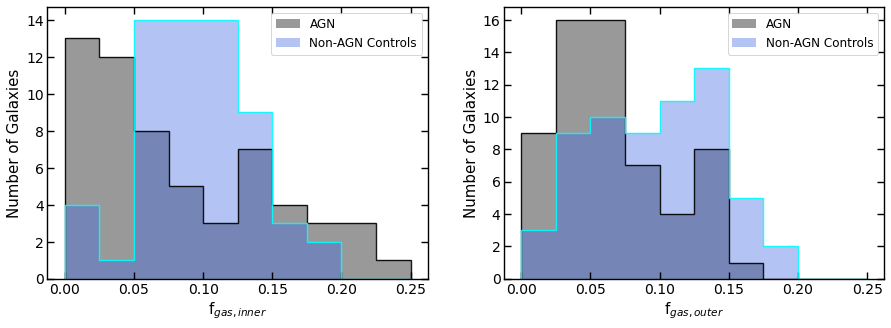

In [60]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))


ax1.hist(fgas_inner[has_control], range = [0,0.25], bins = 10, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(fgas_inner[has_control], range = [0,0.25], bins = 10, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax1.hist(fgas_inner[is_control], range = [0,0.25], bins = 10, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax1.hist(fgas_inner[is_control], range = [0,0.25], bins = 10, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


'''
ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)
'''

ax1.set_xlabel('f$_{gas, inner}$', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(fgas_outer[has_control], range = [0,0.25], bins = 10, color = 'k', alpha = 0.4, label = 'AGN')
ax2.hist(fgas_outer[has_control], range = [0,0.25], bins = 10, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax2.hist(fgas_outer[is_control], range = [0,0.25], bins = 10, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax2.hist(fgas_outer[is_control], range = [0,0.25], bins = 10, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

'''
ax2.set_xticks(np.arange(0,0.16,0.02))
ax2.set_xticks(np.arange(0,0.16,0.005), minor = True)
ax2.set_xlim(0, 0.15)
ax2.set_yticks(np.arange(0,25,5))
ax2.set_yticks(np.arange(0,25,1), minor = True)
ax2.set_ylim(0, 23)
'''

ax2.set_xlabel('f$_{gas, outer}$', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


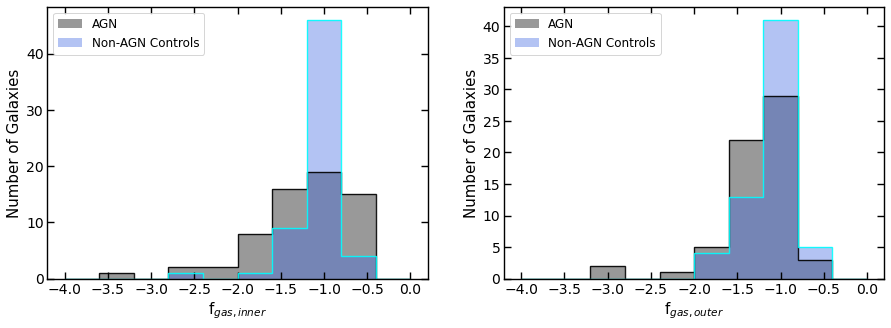

In [76]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))


ax1.hist(np.log10(fgas_inner[has_control]), range = [-4,0], bins = 10, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(np.log10(fgas_inner[has_control]), range = [-4,0], bins = 10, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax1.hist(np.log10(fgas_inner[is_control]), range = [-4,0], bins = 10, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax1.hist(np.log10(fgas_inner[is_control]), range = [-4,0], bins = 10, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


'''
ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)
'''

ax1.set_xlabel('f$_{gas, inner}$', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(np.log10(fgas_outer[has_control]), range = [-4,0], bins = 10, color = 'k', alpha = 0.4, label = 'AGN')
ax2.hist(np.log10(fgas_outer[has_control]), range = [-4,0], bins = 10, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)
ax2.hist(np.log10(fgas_outer[is_control]), range = [-4,0], bins = 10, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
ax2.hist(np.log10(fgas_outer[is_control]), range = [-4,0], bins = 10, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)

'''
ax2.set_xticks(np.arange(0,0.16,0.02))
ax2.set_xticks(np.arange(0,0.16,0.005), minor = True)
ax2.set_xlim(0, 0.15)
ax2.set_yticks(np.arange(0,25,5))
ax2.set_yticks(np.arange(0,25,1), minor = True)
ax2.set_ylim(0, 23)
'''

ax2.set_xlabel('f$_{gas, outer}$', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

In [41]:
# are total molecular gas masses enhanced?

# MGMS, agn and controls, are AGN above or below?

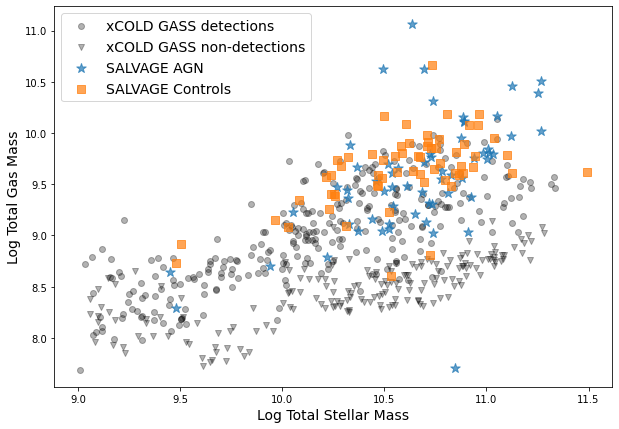

In [61]:
plt.figure(figsize = (10,7))
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_tot[idx_tab][has_control], M_H2[idx_sam][has_control], alpha = 0.7, marker = '*', s= 100, label = 'SALVAGE AGN')#, c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.scatter(mass_tot[idx_tab][is_control], M_H2[idx_sam][is_control], alpha = 0.7, marker = 's', s= 60, label = 'SALVAGE Controls')
#plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass', fontsize = 14)
plt.ylabel('Log Total Gas Mass', fontsize = 14)
plt.legend(fancybox = True, fontsize = 14)
plt.show()

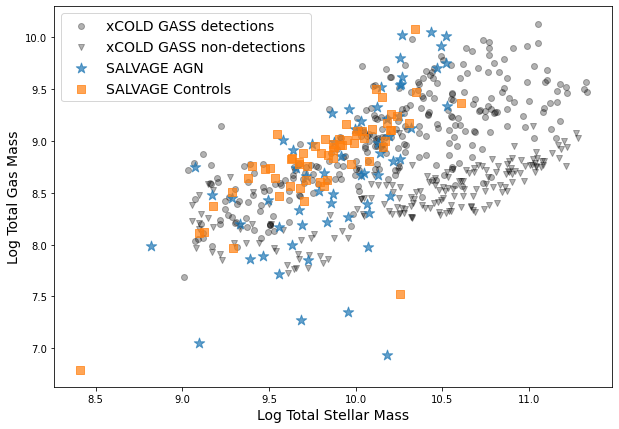

In [62]:
plt.figure(figsize = (10,7))
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_fib[idx_tab][has_control], M_H2_inner_stacked[idx_sam][has_control], alpha = 0.7, marker = '*', s= 120, label = 'SALVAGE AGN')#, c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.scatter(mass_fib[idx_tab][is_control], M_H2_inner_stacked[idx_sam][is_control], alpha = 0.7, marker = 's', s= 60, label = 'SALVAGE Controls')
#plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass', fontsize = 14)
plt.ylabel('Log Total Gas Mass', fontsize = 14)
plt.legend(fancybox = True, fontsize = 14)
plt.show()

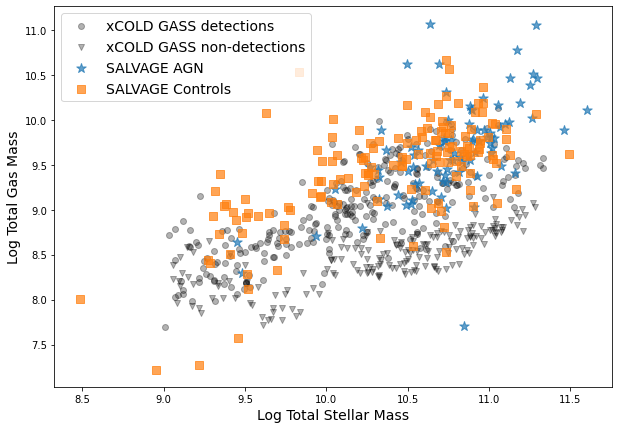

In [63]:
plt.figure(figsize = (10,7))
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_tot[idx_tab][agn_mask], M_H2[idx_sam][agn_mask], alpha = 0.7, marker = '*', s= 100, label = 'SALVAGE AGN')#, c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.scatter(mass_tot[idx_tab][~agn_mask], M_H2[idx_sam][~agn_mask], alpha = 0.7, marker = 's', s= 60, label = 'SALVAGE Controls')
#plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass', fontsize = 14)
plt.ylabel('Log Total Gas Mass', fontsize = 14)
plt.legend(fancybox = True, fontsize = 14)
plt.show()

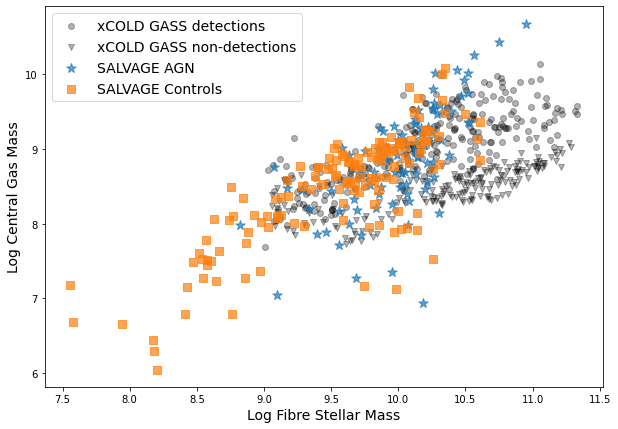

In [64]:
plt.figure(figsize = (10,7))
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_fib[idx_tab][agn_mask], M_H2_inner_stacked[idx_sam][agn_mask], alpha = 0.7, marker = '*', s= 100, label = 'SALVAGE AGN')#, c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.scatter(mass_fib[idx_tab][~agn_mask], M_H2_inner_stacked[idx_sam][~agn_mask], alpha = 0.7, marker = 's', s= 60, label = 'SALVAGE Controls')
#plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Fibre Stellar Mass', fontsize = 14)
plt.ylabel('Log Central Gas Mass', fontsize = 14)
plt.legend(fancybox = True, fontsize = 14)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


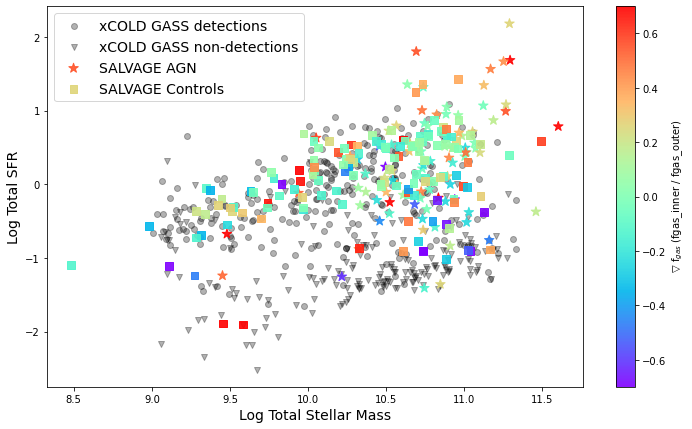

In [65]:
plt.figure(figsize = (12,7))

plt.scatter(mass_xcg[M_H2_xcg>1], sfr_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], sfr_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')

plt.scatter(mass_tot[idx_tab][agn_mask], sfr_tot[idx_tab][agn_mask], alpha = 0.9, marker = '*', s= 100, label = 'SALVAGE AGN', c=np.log10(grad_fgas[agn_mask]), cmap = 'rainbow', vmin = -0.7, vmax = 0.7)
plt.scatter(mass_tot[idx_tab][~agn_mask], sfr_tot[idx_tab][~agn_mask], alpha = 0.9, marker = 's', s= 60, label = 'SALVAGE Controls', c=np.log10(grad_fgas[~agn_mask]), cmap = 'rainbow', vmin = -0.7, vmax = 0.7)

plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass', fontsize = 14)
plt.ylabel('Log Total SFR', fontsize = 14)
plt.legend(fancybox = True, fontsize = 14)
plt.show()

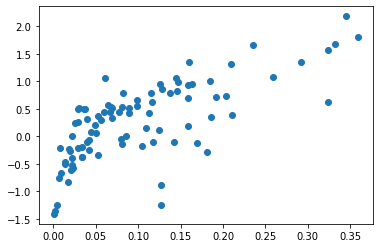

In [66]:
plt.scatter(fgas_inner[agn_mask], sfr_tot[idx_tab][agn_mask])
#plt.scatter(fgas_outer[agn_mask], sfr_tot[idx_tab][agn_mask])

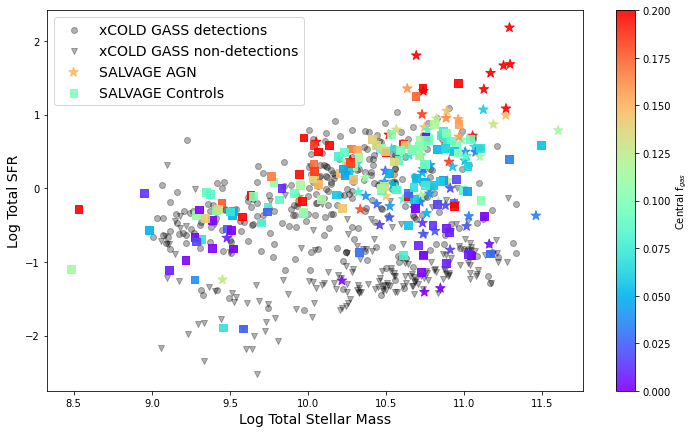

In [67]:
plt.figure(figsize = (12,7))

plt.scatter(mass_xcg[M_H2_xcg>1], sfr_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], sfr_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')

plt.scatter(mass_tot[idx_tab][agn_mask], sfr_tot[idx_tab][agn_mask], alpha = 0.9, marker = '*', s= 100, label = 'SALVAGE AGN', c=fgas_inner[agn_mask], cmap = 'rainbow', vmin = 0, vmax = 0.2)
plt.scatter(mass_tot[idx_tab][~agn_mask], sfr_tot[idx_tab][~agn_mask], alpha = 0.9, marker = 's', s= 60, label = 'SALVAGE Controls', c=fgas_inner[~agn_mask], cmap = 'rainbow', vmin = 0, vmax = 0.2)

plt.colorbar(label = 'Central f$_{gas}$')
plt.xlabel('Log Total Stellar Mass', fontsize = 14)
plt.ylabel('Log Total SFR', fontsize = 14)
plt.legend(fancybox = True, fontsize = 14)
plt.show()

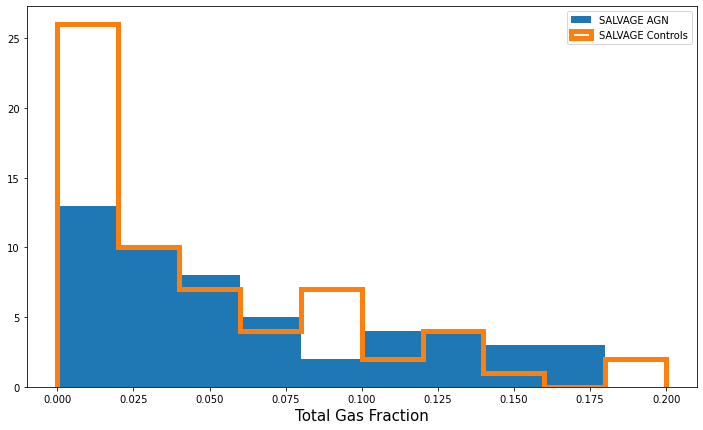

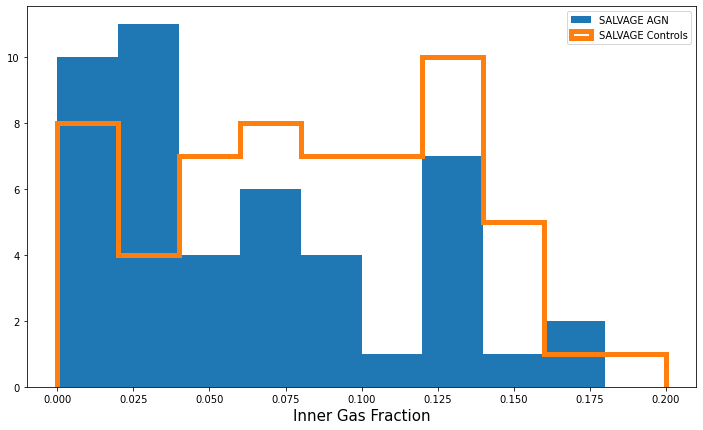

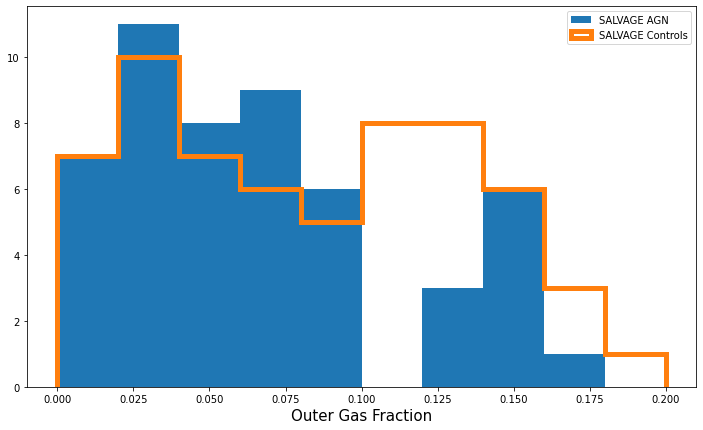

In [84]:
plt.figure(figsize = (12,7))
plt.hist(fgas[agn_mask], label = 'SALVAGE AGN', range = [0,0.2])
plt.hist(fgas[~agn_mask], label = 'SALVAGE Controls', range = [0,0.2], histtype = 'step', lw = 5)
plt.xlabel('Total Gas Fraction', fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (12,7))
plt.hist(fgas_inner[agn_mask], label = 'SALVAGE AGN', range = [0,0.2])
#plt.hist(fgas_inner[agn_mask][incl[idx_tab][has_control]>70], label = 'SALVAGE AGN (inclined)', range = [0,0.2])
plt.hist(fgas_inner[~agn_mask], label = 'SALVAGE Controls', range = [0,0.2], histtype = 'step', lw = 5)
plt.xlabel('Inner Gas Fraction', fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (12,7))
plt.hist(fgas_outer[agn_mask], label = 'SALVAGE AGN', range = [0,0.2])
plt.hist(fgas_outer[~agn_mask], label = 'SALVAGE Controls', range = [0,0.2], histtype = 'step', lw = 5)
plt.xlabel('Outer Gas Fraction', fontsize = 15)
plt.legend()
plt.show()

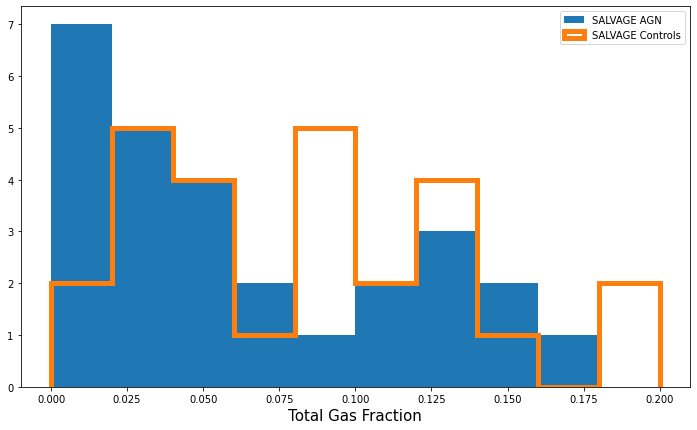

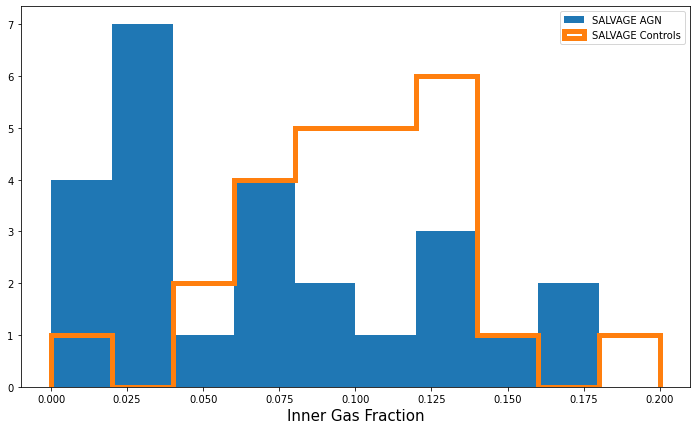

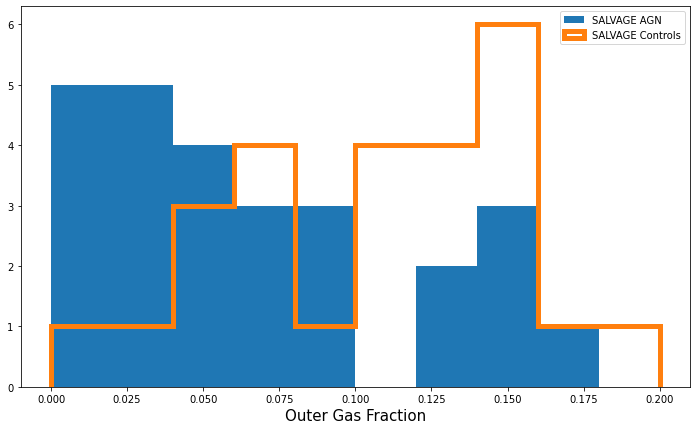

In [43]:
plt.figure(figsize = (12,7))
plt.hist(fgas[has_control], label = 'SALVAGE AGN', range = [0,0.2])
plt.hist(fgas[is_control], label = 'SALVAGE Controls', range = [0,0.2], histtype = 'step', lw = 5)
plt.xlabel('Total Gas Fraction', fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (12,7))
plt.hist(fgas_inner[has_control], label = 'SALVAGE AGN', range = [0,0.2])
plt.hist(fgas_inner[is_control], label = 'SALVAGE Controls', range = [0,0.2], histtype = 'step', lw = 5)
plt.xlabel('Inner Gas Fraction', fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (12,7))
plt.hist(fgas_outer[has_control], label = 'SALVAGE AGN', range = [0,0.2])
plt.hist(fgas_outer[is_control], label = 'SALVAGE Controls', range = [0,0.2], histtype = 'step', lw = 5)
plt.xlabel('Outer Gas Fraction', fontsize = 15)
plt.legend()
plt.show()

In [46]:
grad_ssfr

array([ 1.75758607e+01,  5.16593704e-01,  1.45931143e+01,  2.69512709e+00,
        1.05555056e+01,  6.82837544e-01,  7.99415495e+01,  2.95090507e+00,
        3.39629952e+00,  9.35330914e-01,  5.92231659e+00,  2.14141062e+00,
        5.85803617e+00,  2.81457518e-01,  6.87713410e-01,  4.49527276e-01,
        3.70364724e+00,  4.82502637e-01,  1.37008111e+00,  2.18486831e+01,
        2.67744563e+00,  2.95128468e-01,  5.68800257e+00,  1.37831855e+00,
        1.92436964e+00,  2.02566447e-01,  4.09602709e+00,  1.07759123e+00,
        9.30605299e+00,  3.65083398e+00,  1.95450907e+00,  3.01812790e-01,
        4.83594623e-01,  6.17302550e-01,  7.66140973e+00,  1.79319085e+00,
        1.61903994e+01,  4.41687049e-01,  3.59023117e-01,  2.79579172e+01,
        6.50705307e-01,  2.80229188e-01,  7.25179361e-01,  4.24782256e-01,
        5.44604780e-01,  2.47365643e+00,  1.97928724e+00,  1.21036516e+00,
        5.88869168e+01,  1.47848558e+00,  6.73644428e-01,  3.21025877e+00,
        3.71028439e+00,  

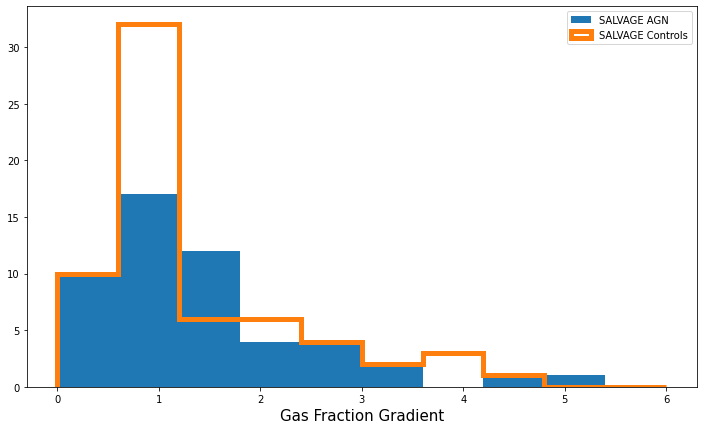

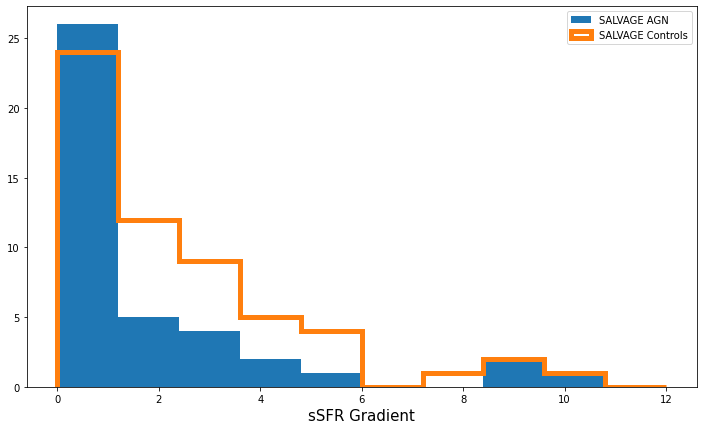

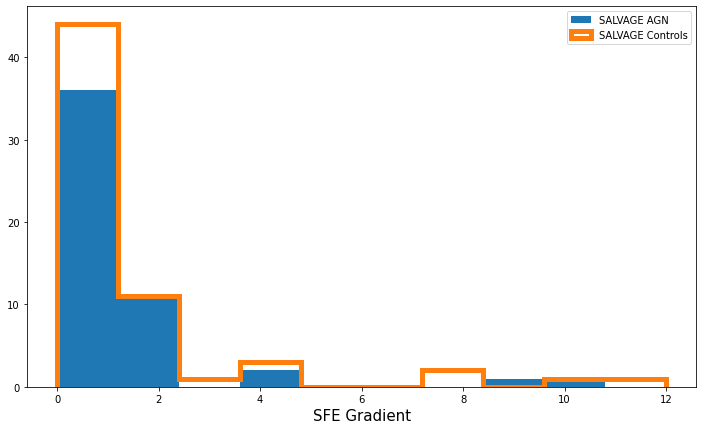

In [85]:
plt.figure(figsize = (12,7))
plt.hist(grad_fgas[agn_mask], label = 'SALVAGE AGN', range = [0,6])
plt.hist(grad_fgas[~agn_mask], label = 'SALVAGE Controls', range = [0,6], histtype = 'step', lw = 5)
plt.xlabel('Gas Fraction Gradient', fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (12,7))
plt.hist(grad_ssfr[agn_mask], label = 'SALVAGE AGN', range = [0,12])
plt.hist(grad_ssfr[~agn_mask], label = 'SALVAGE Controls', range = [0,12], histtype = 'step', lw = 5)
plt.xlabel('sSFR Gradient', fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (12,7))
plt.hist(grad_sfe[agn_mask], label = 'SALVAGE AGN', range = [0,12])
plt.hist(grad_sfe[~agn_mask], label = 'SALVAGE Controls', range = [0,12], histtype = 'step', lw = 5)
plt.xlabel('SFE Gradient', fontsize = 15)
plt.legend()
plt.show()

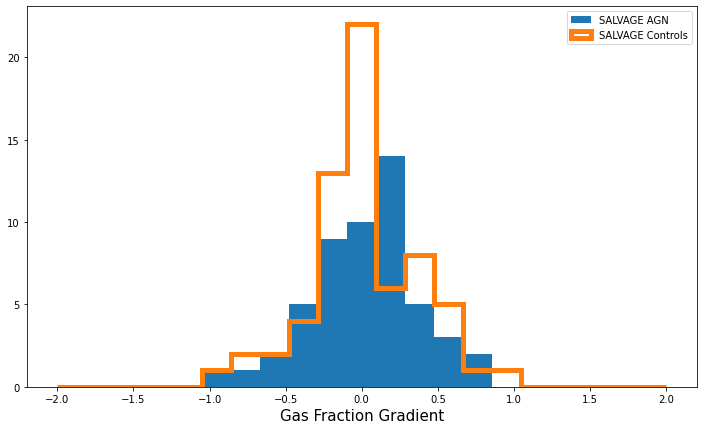

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


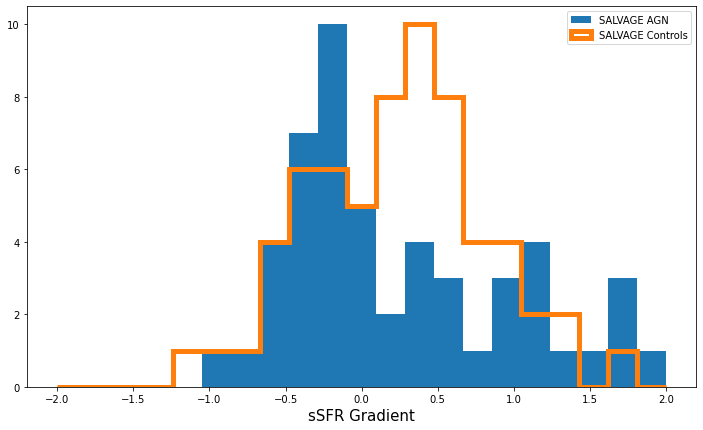

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


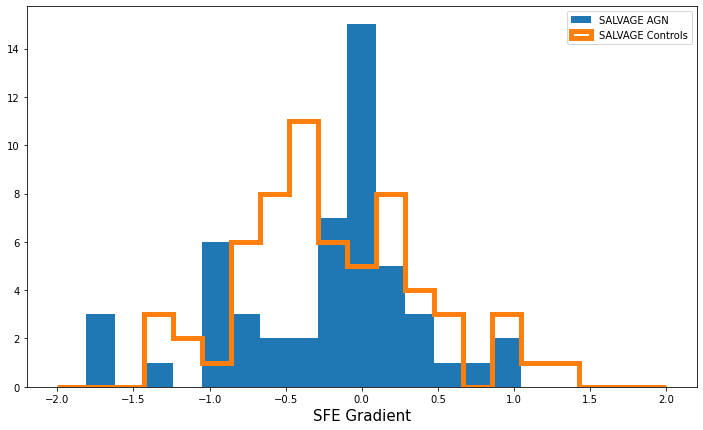

In [86]:
bins = 21

plt.figure(figsize = (12,7))
plt.hist(np.log10(grad_fgas[agn_mask]), label = 'SALVAGE AGN', range = [-2,2], bins = bins)
plt.hist(np.log10(grad_fgas[~agn_mask]), label = 'SALVAGE Controls', range = [-2,2], histtype = 'step', lw = 5, bins = bins)
plt.xlabel('Gas Fraction Gradient', fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (12,7))
plt.hist(np.log10(grad_ssfr[agn_mask]), label = 'SALVAGE AGN', range = [-2,2], bins = bins)
plt.hist(np.log10(grad_ssfr[~agn_mask]), label = 'SALVAGE Controls', range = [-2,2], histtype = 'step', lw = 5, bins = bins)
plt.xlabel('sSFR Gradient', fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (12,7))
plt.hist(np.log10(grad_sfe[agn_mask]), range = [-2,2], label = 'SALVAGE AGN', bins = bins)
plt.hist(np.log10(grad_sfe[~agn_mask]), range = [-2,2], label = 'SALVAGE Controls', histtype = 'step', lw = 5, bins = bins)
plt.xlabel('SFE Gradient', fontsize = 15)
plt.legend()
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


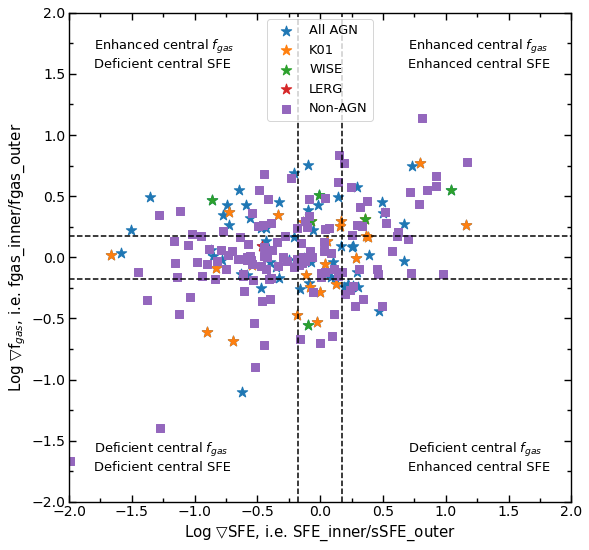

In [68]:
fig, ax = plt.subplots(1,1, figsize = (9,9))

ax.scatter(np.log10(grad_sfe[agn_mask]), np.log10(grad_fgas[agn_mask]), marker = '*', s = 120, label = 'All AGN')
ax.scatter(np.log10(grad_sfe[K01_flag]), np.log10(grad_fgas[K01_flag]), marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10(grad_sfe[WISE_flag]), np.log10(grad_fgas[WISE_flag]), marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10(grad_sfe[LERG_flag]), np.log10(grad_fgas[LERG_flag]), marker = '*', s = 120, label = 'LERG')
ax.scatter(np.log10(grad_sfe[~agn_mask]), np.log10(grad_fgas[~agn_mask]), marker = 's', s = 60, label = 'Non-AGN')
ax.axhline(0.1761, color = 'k', ls = '--')
ax.axhline(-0.1761, color = 'k', ls = '--')
ax.axvline(0.1761, color = 'k', ls = '--')
ax.axvline(-0.1761, color = 'k', ls = '--')

ax.set_ylabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax.set_xlabel('Log $\\bigtriangledown$SFE, i.e. SFE_inner/sSFE_outer', fontsize = 15)

ax.text(-1.8,1.55,'Enhanced central $f_{gas}$\nDeficient central SFE', fontsize = 13)
ax.text(0.7,1.55,'Enhanced central $f_{gas}$\nEnhanced central SFE', fontsize = 13)
ax.text(-1.8,-1.75,'Deficient central $f_{gas}$\nDeficient central SFE', fontsize = 13)
ax.text(0.7,-1.75,'Deficient central $f_{gas}$\nEnhanced central SFE', fontsize = 13)

ax.set_xticks(np.arange(-2,3,0.5))
ax.set_xticks(np.arange(-2,3,0.25), minor = True)
ax.set_yticks(np.arange(-2,3,0.5))
ax.set_yticks(np.arange(-2,3,0.25), minor = True)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.4)


plt.legend(fancybox = True, fontsize = 13, loc = 'upper center')
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


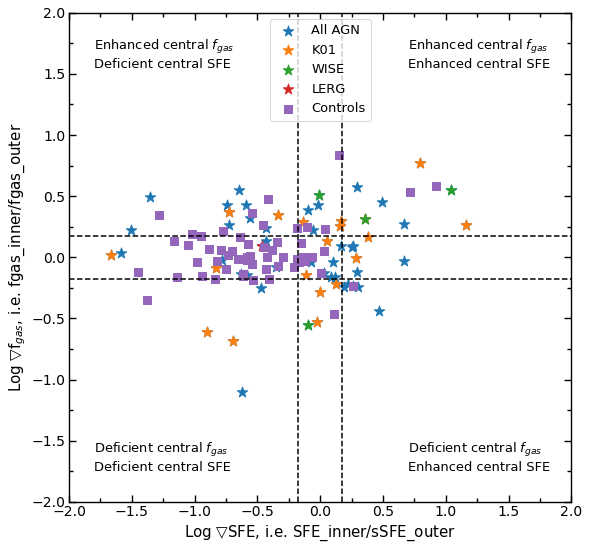

In [69]:
fig, ax = plt.subplots(1,1, figsize = (9,9))

ax.scatter(np.log10(grad_sfe[has_control][agn_mask[has_control]]), np.log10(grad_fgas[has_control][agn_mask[has_control]]), marker = '*', s = 120, label = 'All AGN')
ax.scatter(np.log10(grad_sfe[has_control][K01_flag[has_control]]), np.log10(grad_fgas[has_control][K01_flag[has_control]]), marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10(grad_sfe[has_control][WISE_flag[has_control]]), np.log10(grad_fgas[has_control][WISE_flag[has_control]]), marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10(grad_sfe[has_control][LERG_flag[has_control]]), np.log10(grad_fgas[has_control][LERG_flag[has_control]]), marker = '*', s = 120, label = 'LERG')
ax.scatter(np.log10(grad_sfe[is_control][~agn_mask[is_control]]), np.log10(grad_fgas[is_control][~agn_mask[is_control]]), marker = 's', s = 60, label = 'Controls')
ax.axhline(0.1761, color = 'k', ls = '--')
ax.axhline(-0.1761, color = 'k', ls = '--')
ax.axvline(0.1761, color = 'k', ls = '--')
ax.axvline(-0.1761, color = 'k', ls = '--')

ax.set_ylabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax.set_xlabel('Log $\\bigtriangledown$SFE, i.e. SFE_inner/sSFE_outer', fontsize = 15)

ax.text(-1.8,1.55,'Enhanced central $f_{gas}$\nDeficient central SFE', fontsize = 13)
ax.text(0.7,1.55,'Enhanced central $f_{gas}$\nEnhanced central SFE', fontsize = 13)
ax.text(-1.8,-1.75,'Deficient central $f_{gas}$\nDeficient central SFE', fontsize = 13)
ax.text(0.7,-1.75,'Deficient central $f_{gas}$\nEnhanced central SFE', fontsize = 13)

ax.set_xticks(np.arange(-2,3,0.5))
ax.set_xticks(np.arange(-2,3,0.25), minor = True)
ax.set_yticks(np.arange(-2,3,0.5))
ax.set_yticks(np.arange(-2,3,0.25), minor = True)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.4)


plt.legend(fancybox = True, fontsize = 13, loc = 'upper center')
plt.show()

In [ ]:
ax.scatter(np.log10(grad_sfe[agn_mask]), np.log10(grad_fgas[agn_mask]), marker = '*', s = 120, label = 'All AGN')
ax.scatter(np.log10(grad_sfe[K01_flag]), np.log10(grad_fgas[K01_flag]), marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10(grad_sfe[WISE_flag]), np.log10(grad_fgas[WISE_flag]), marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10(grad_sfe[LERG_flag]), np.log10(grad_fgas[LERG_flag]), marker = '*', s = 120, label = 'LERG')
ax.scatter(np.log10(grad_sfe[~agn_mask]), np.log10(grad_fgas[~agn_mask]), marker = 's', s = 60, label = 'Non-AGN')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


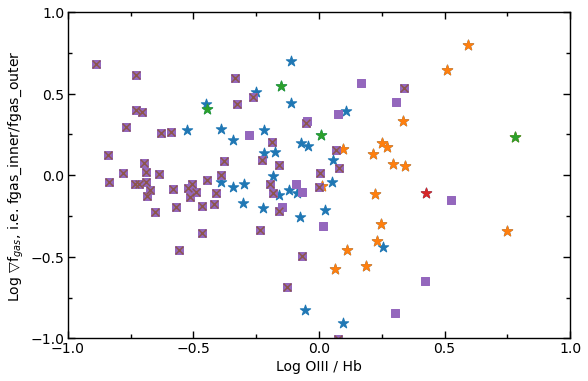

In [89]:
fig, ax = plt.subplots(1,1, figsize = (9,6))

ax.scatter(np.log10(OIII_flux[idx_tab][agn_mask] / Hb_flux[idx_tab][agn_mask]), np.log10(grad_fgas[agn_mask]), marker = '*', s = 120, label = 'K03')
ax.scatter(np.log10(OIII_flux[idx_tab][K01_flag] / Hb_flux[idx_tab][K01_flag]), np.log10(grad_fgas[K01_flag]), marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10(OIII_flux[idx_tab][WISE_flag] / Hb_flux[idx_tab][WISE_flag]), np.log10(grad_fgas[WISE_flag]), marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10(OIII_flux[idx_tab][LERG_flag] / Hb_flux[idx_tab][LERG_flag]), np.log10(grad_fgas[LERG_flag]), marker = '*', s = 120, label = 'LERG')
ax.scatter(np.log10(OIII_flux[idx_tab][~agn_mask] / Hb_flux[idx_tab][~agn_mask]), np.log10(grad_fgas[~agn_mask]), marker = 's', s = 60, label = 'Non-AGN')
ax.scatter(np.log10(OIII_flux[idx_tab][control_mask] / Hb_flux[idx_tab][control_mask]), np.log10(grad_fgas[control_mask]), marker = 'x', s = 60, label = 'Controls')


ax.set_xlabel('Log OIII / Hb', fontsize = 14)
ax.set_ylabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 14)

ax.set_xticks(np.arange(-1,1.5,0.5))
ax.set_xticks(np.arange(-1,1,0.25), minor = True)
ax.set_yticks(np.arange(-1,1.5,0.5))
ax.set_yticks(np.arange(-1,1,0.25), minor = True)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.4)

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


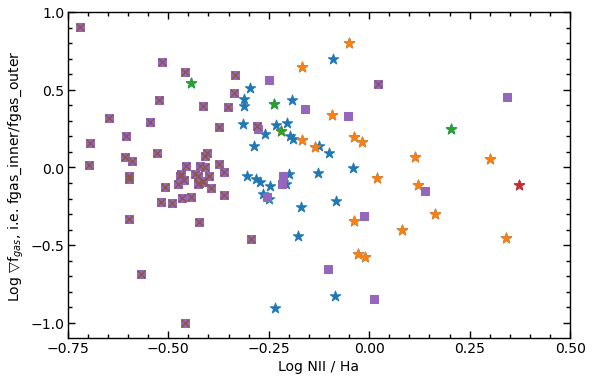

In [92]:
fig, ax = plt.subplots(1,1, figsize = (9,6))

ax.scatter(np.log10(NII_flux[idx_tab][agn_mask] / Ha_flux[idx_tab][agn_mask]), np.log10(grad_fgas[agn_mask]), marker = '*', s = 120, label = 'K03')
ax.scatter(np.log10(NII_flux[idx_tab][K01_flag] / Ha_flux[idx_tab][K01_flag]), np.log10(grad_fgas[K01_flag]), marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10(NII_flux[idx_tab][WISE_flag] / Ha_flux[idx_tab][WISE_flag]), np.log10(grad_fgas[WISE_flag]), marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10(NII_flux[idx_tab][LERG_flag] / Ha_flux[idx_tab][LERG_flag]), np.log10(grad_fgas[LERG_flag]), marker = '*', s = 120, label = 'LERG')
ax.scatter(np.log10(NII_flux[idx_tab][~agn_mask] / Ha_flux[idx_tab][~agn_mask]), np.log10(grad_fgas[~agn_mask]), marker = 's', s = 60, label = 'Non-AGN')
ax.scatter(np.log10(NII_flux[idx_tab][control_mask] / Ha_flux[idx_tab][control_mask]), np.log10(grad_fgas[control_mask]), marker = 'x', s = 60, label = 'Controls')


ax.set_xlabel('Log NII / Ha', fontsize = 14)
ax.set_ylabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 14)

ax.set_xticks(np.arange(-1,1.5,0.25))
ax.set_xticks(np.arange(-1,1,0.05), minor = True)
ax.set_yticks(np.arange(-1,1.5,0.5))
ax.set_yticks(np.arange(-1,1,0.1), minor = True)

ax.set_xlim(-0.75,0.5)
ax.set_ylim(-1.1,1)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.4)

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


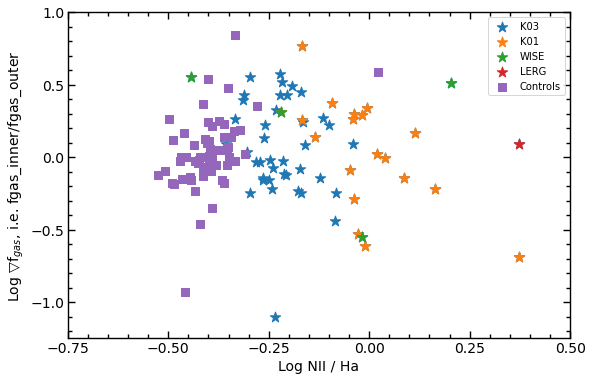

In [71]:
fig, ax = plt.subplots(1,1, figsize = (9,6))

ax.scatter(np.log10(NII_flux[idx_tab][has_control][agn_mask[has_control]] / Ha_flux[idx_tab][has_control][agn_mask[has_control]]), np.log10(grad_fgas[has_control][agn_mask[has_control]]), marker = '*', s = 120, label = 'K03')
ax.scatter(np.log10(NII_flux[idx_tab][has_control][K01_flag[has_control]] / Ha_flux[idx_tab][has_control][K01_flag[has_control]]), np.log10(grad_fgas[has_control][K01_flag[has_control]]), marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10(NII_flux[idx_tab][has_control][WISE_flag[has_control]] / Ha_flux[idx_tab][has_control][WISE_flag[has_control]]), np.log10(grad_fgas[has_control][WISE_flag[has_control]]), marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10(NII_flux[idx_tab][has_control][LERG_flag[has_control]] / Ha_flux[idx_tab][has_control][LERG_flag[has_control]]), np.log10(grad_fgas[has_control][LERG_flag[has_control]]), marker = '*', s = 120, label = 'LERG')
#ax.scatter(np.log10(NII_flux[idx_tab][~agn_mask] / Ha_flux[idx_tab][~agn_mask]), np.log10(grad_fgas[~agn_mask]), marker = 's', s = 60, label = 'Non-AGN')
#ax.scatter(np.log10(NII_flux[idx_tab][control_mask] / Ha_flux[idx_tab][control_mask]), np.log10(grad_fgas[control_mask]), marker = 'x', s = 60, label = 'Controls')
ax.scatter(np.log10(NII_flux[idx_tab][is_control] / Ha_flux[idx_tab][is_control]), np.log10(grad_fgas[is_control]), marker = 's', s = 60, label = 'Controls')


ax.set_xlabel('Log NII / Ha', fontsize = 14)
ax.set_ylabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 14)

ax.set_xticks(np.arange(-1.5,1.5,0.25))
ax.set_xticks(np.arange(-1.5,1,0.05), minor = True)
ax.set_yticks(np.arange(-1.5,1.5,0.5))
ax.set_yticks(np.arange(-1.5,1,0.1), minor = True)

ax.set_xlim(-0.75,0.5)
ax.set_ylim(-1.25,1)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.4)

plt.legend()
plt.show()

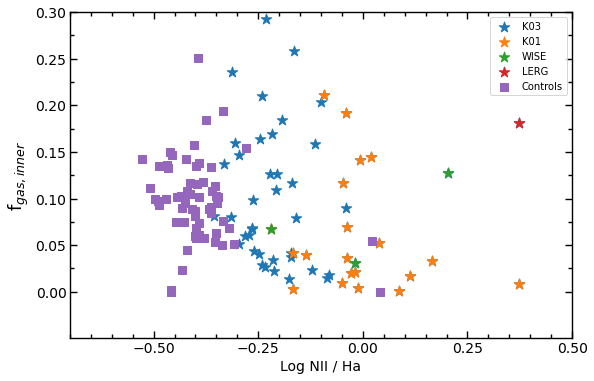

In [72]:
fig, ax = plt.subplots(1,1, figsize = (9,6))

ax.scatter(np.log10(NII_flux[idx_tab][has_control][agn_mask[has_control]] / Ha_flux[idx_tab][has_control][agn_mask[has_control]]), fgas_inner[has_control][agn_mask[has_control]], marker = '*', s = 120, label = 'K03')
ax.scatter(np.log10(NII_flux[idx_tab][has_control][K01_flag[has_control]] / Ha_flux[idx_tab][has_control][K01_flag[has_control]]), fgas_inner[has_control][K01_flag[has_control]], marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10(NII_flux[idx_tab][has_control][WISE_flag[has_control]] / Ha_flux[idx_tab][has_control][WISE_flag[has_control]]), fgas_inner[has_control][WISE_flag[has_control]], marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10(NII_flux[idx_tab][has_control][LERG_flag[has_control]] / Ha_flux[idx_tab][has_control][LERG_flag[has_control]]), fgas_inner[has_control][LERG_flag[has_control]], marker = '*', s = 120, label = 'LERG')
#ax.scatter(np.log10(NII_flux[idx_tab][~agn_mask] / Ha_flux[idx_tab][~agn_mask]), np.log10(grad_fgas[~agn_mask]), marker = 's', s = 60, label = 'Non-AGN')
#ax.scatter(np.log10(NII_flux[idx_tab][control_mask] / Ha_flux[idx_tab][control_mask]), np.log10(grad_fgas[control_mask]), marker = 'x', s = 60, label = 'Controls')
ax.scatter(np.log10(NII_flux[idx_tab][is_control] / Ha_flux[idx_tab][is_control]), fgas_inner[is_control], marker = 's', s = 60, label = 'Controls')


ax.set_xlabel('Log NII / Ha', fontsize = 14)
ax.set_ylabel('f$_{gas, inner}$', fontsize = 18)

ax.set_xticks(np.arange(-1,1.5,0.25))
ax.set_xticks(np.arange(-1,1,0.05), minor = True)
ax.set_yticks(np.arange(0,0.35,0.05))
ax.set_yticks(np.arange(0,0.35,0.025), minor = True)

ax.set_xlim(-0.7,0.5)
ax.set_ylim(-0.05,0.3)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.4)

plt.legend()
plt.show()

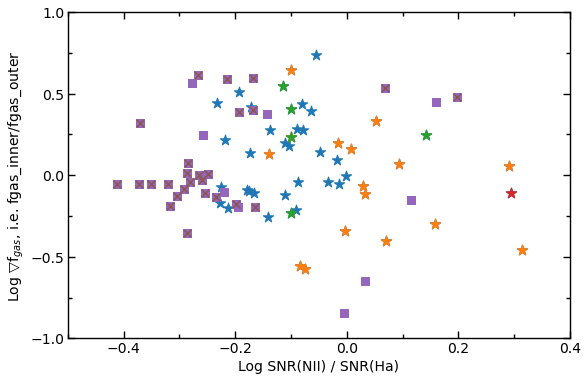

In [62]:
fig, ax = plt.subplots(1,1, figsize = (9,6))

ax.scatter(np.log10((NII_flux[idx_tab][agn_mask]/NII_err[idx_tab][agn_mask]) / (Ha_flux[idx_tab][agn_mask]/Ha_err[idx_tab][agn_mask])), np.log10(grad_fgas[agn_mask]), marker = '*', s = 120, label = 'K03')
ax.scatter(np.log10((NII_flux[idx_tab][K01_flag]/NII_err[idx_tab][K01_flag]) / (Ha_flux[idx_tab][K01_flag]/Ha_err[idx_tab][K01_flag])), np.log10(grad_fgas[K01_flag]), marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10((NII_flux[idx_tab][WISE_flag]/NII_err[idx_tab][WISE_flag]) / (Ha_flux[idx_tab][WISE_flag]/Ha_err[idx_tab][WISE_flag])), np.log10(grad_fgas[WISE_flag]), marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10((NII_flux[idx_tab][LERG_flag]/NII_err[idx_tab][LERG_flag]) / (Ha_flux[idx_tab][LERG_flag]/Ha_err[idx_tab][LERG_flag])), np.log10(grad_fgas[LERG_flag]), marker = '*', s = 120, label = 'LERG')
ax.scatter(np.log10((NII_flux[idx_tab][~agn_mask]/NII_err[idx_tab][~agn_mask]) / (Ha_flux[idx_tab][~agn_mask]/Ha_err[idx_tab][~agn_mask])), np.log10(grad_fgas[~agn_mask]), marker = 's', s = 60, label = 'Non-AGN')
ax.scatter(np.log10((NII_flux[idx_tab][control_mask]/NII_err[idx_tab][control_mask]) / (Ha_flux[idx_tab][control_mask]/Ha_err[idx_tab][control_mask])), np.log10(grad_fgas[control_mask]), marker = 'x', s = 60, label = 'Controls')


ax.set_xlabel('Log SNR(NII) / SNR(Ha)', fontsize = 14)
ax.set_ylabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 14)

ax.set_xticks(np.arange(-1,1.5,0.2))
ax.set_xticks(np.arange(-1,1,0.1), minor = True)
ax.set_yticks(np.arange(-1,1.5,0.5))
ax.set_yticks(np.arange(-1,1,0.25), minor = True)

ax.set_xlim(-0.5,0.4)
ax.set_ylim(-1,1)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.4)

plt.show()

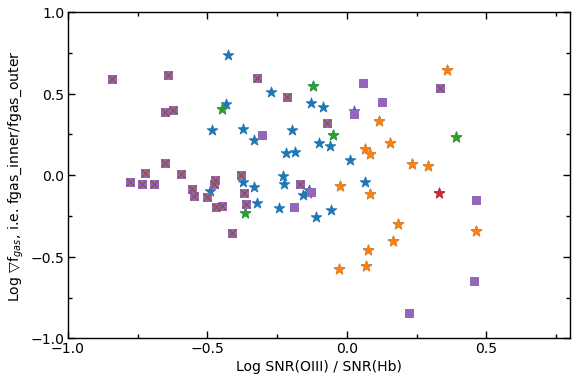

In [63]:
fig, ax = plt.subplots(1,1, figsize = (9,6))

ax.scatter(np.log10((OIII_flux[idx_tab][agn_mask]/OIII_err[idx_tab][agn_mask]) / (Hb_flux[idx_tab][agn_mask]/Hb_err[idx_tab][agn_mask])), np.log10(grad_fgas[agn_mask]), marker = '*', s = 120, label = 'K03')
ax.scatter(np.log10((OIII_flux[idx_tab][K01_flag]/OIII_err[idx_tab][K01_flag]) / (Hb_flux[idx_tab][K01_flag]/Hb_err[idx_tab][K01_flag])), np.log10(grad_fgas[K01_flag]), marker = '*', s = 120, label = 'K01')
ax.scatter(np.log10((OIII_flux[idx_tab][WISE_flag]/OIII_err[idx_tab][WISE_flag]) / (Hb_flux[idx_tab][WISE_flag]/Hb_err[idx_tab][WISE_flag])), np.log10(grad_fgas[WISE_flag]), marker = '*', s = 120, label = 'WISE')
ax.scatter(np.log10((OIII_flux[idx_tab][LERG_flag]/OIII_err[idx_tab][LERG_flag]) / (Hb_flux[idx_tab][LERG_flag]/Hb_err[idx_tab][LERG_flag])), np.log10(grad_fgas[LERG_flag]), marker = '*', s = 120, label = 'LERG')
ax.scatter(np.log10((OIII_flux[idx_tab][~agn_mask]/OIII_err[idx_tab][~agn_mask]) / (Hb_flux[idx_tab][~agn_mask]/Hb_err[idx_tab][~agn_mask])), np.log10(grad_fgas[~agn_mask]), marker = 's', s = 60, label = 'Non-AGN')
ax.scatter(np.log10((OIII_flux[idx_tab][control_mask]/OIII_err[idx_tab][control_mask]) / (Hb_flux[idx_tab][control_mask]/Hb_err[idx_tab][control_mask])), np.log10(grad_fgas[control_mask]), marker = 'x', s = 60, label = 'Controls')


ax.set_xlabel('Log SNR(OIII) / SNR(Hb)', fontsize = 14)
ax.set_ylabel('Log $\\bigtriangledown$f$_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 14)

ax.set_xticks(np.arange(-1,1.5,0.5))
ax.set_xticks(np.arange(-1,1,0.25), minor = True)
ax.set_yticks(np.arange(-1,1.5,0.5))
ax.set_yticks(np.arange(-1,1,0.25), minor = True)

ax.set_xlim(-1,0.8)
ax.set_ylim(-1,1)

ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
ax.tick_params(axis = 'both', which = 'major', length = 7)
ax.tick_params(axis = 'both', which = 'minor', length = 4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.4)

plt.show()

In [105]:
objID_sample[idx_sam][~agn_mask][grad_fgas[~agn_mask] == np.nanmin(grad_fgas[~agn_mask])]

array(['587731512085708963'], dtype='<U18')

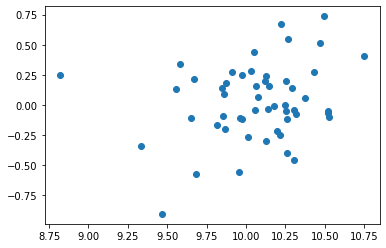

In [133]:
plt.scatter(mass_fib[idx_tab][agn_mask], np.log10(grad_fgas[agn_mask]))

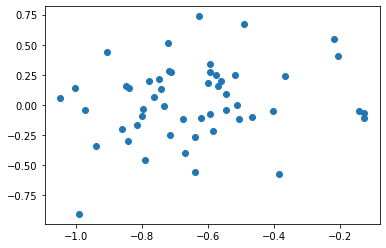

In [139]:
plt.scatter(np.log10(10**mass_fib[idx_tab][agn_mask]/10**mass_out[idx_tab][agn_mask]), np.log10(grad_fgas[agn_mask]))

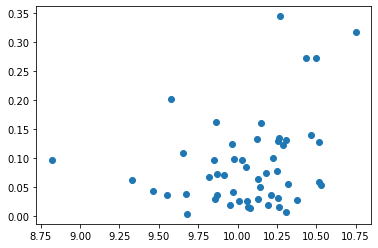

In [135]:
plt.scatter(mass_fib[idx_tab][agn_mask], fgas_inner[agn_mask])

In [ ]:
# is the sSFR gradient real? Are the controls and AGN measuring central SFR using the same method? i.e. D4000 vs Ha?
# should the gradient have a ~per unit distance~ in it?, i.e. divide by distance between inner and outer radii?

In [ ]:
# does fgas, ssfr, sfe affect MGMS location?

# MGMS coloured by total fgas, ssfr, sfe

# MGMS coloured by fgas, ssfr, sfe gradients

In [ ]:
# does fgas, ssfr, sfe affect SFMS location?

# SFMS coloured by fgas, ssfr, sfe gradients

# delta-SFR vs fgas gradient..?

In [ ]:
plt.figure(figsize = (10,7))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
#plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

In [ ]:
# do AGN centrals live below the MGMS?

# MGMS only for central masses and gas masses

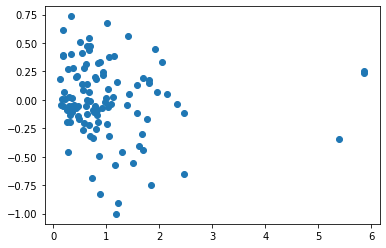

In [26]:
plt.scatter(OIII_flux[idx_tab][table_gas]/Hb_flux[idx_tab][table_gas], np.log10(fgas_inner_stacked/fgas_outer_stacked))

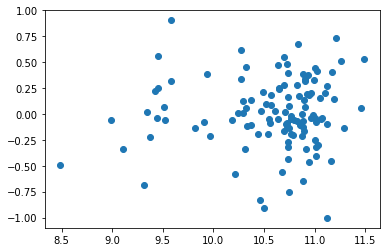

In [27]:
plt.scatter(mass_tot[idx_tab][table_gas], np.log10(fgas_inner_stacked/fgas_outer_stacked))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


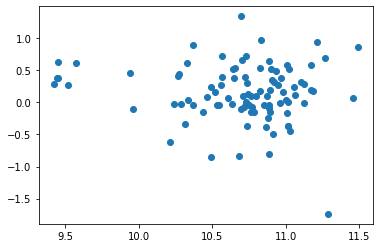

In [28]:
plt.scatter(mass_tot[idx_tab][table_gas], np.log10(fgas_inner/fgas_outer))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


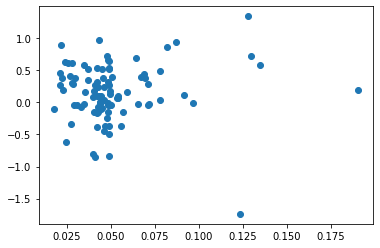

In [29]:
plt.scatter(z_sdss[idx_tab][table_gas], np.log10(fgas_inner/fgas_outer))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


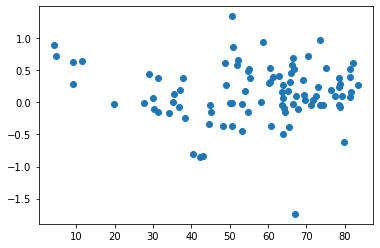

In [30]:
plt.scatter(incl[idx_tab][table_gas], np.log10(fgas_inner/fgas_outer))

In [130]:
plt.scatter(incl[idx_tab][table_gas], np.log10(fgas_inner_stacked/fgas_outer_stacked))

NameError: name 'table_gas' is not defined

In [121]:
M_H2_inner

array([9.67113418, 8.42540495, 8.99628265, 8.30033189, 9.13210352,
       9.23632584, 8.85055086, 8.2077618 , 9.67530971, 9.09357527,
             -inf, 9.0216665 , 9.01019988, 8.36150898, 7.63941259,
       9.45269865, 8.69935612,       -inf, 7.85823069, 8.37020665,
       8.14590785,       -inf, 9.06110023, 8.34649448, 8.75938783,
       9.42782194, 8.75330869, 9.08203258,       -inf, 9.22086446,
       9.43300459,       -inf, 7.99140922, 9.1535059 ,       -inf,
             -inf, 8.92635989, 9.12487242, 8.70171902, 8.62782764,
       9.30649819, 8.88112114, 9.48555529, 8.69097703, 8.32460091,
       8.15973085, 9.68444824, 7.97658663, 9.06833558,       -inf,
       8.96695523, 8.98973391, 9.22977059, 9.34914036])

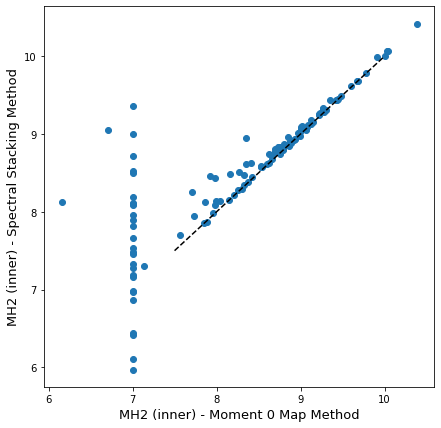

In [32]:
M_H2_inner2 = M_H2_inner.copy()
M_H2_inner2[M_H2_inner2<0] = 7

plt.figure(figsize = (7,7))
plt.scatter(M_H2_inner2, M_H2_inner_stacked)
plt.plot([7.5,10], [7.5,10], 'k--')
plt.xlabel('MH2 (inner) - Moment 0 Map Method', fontsize = 13)
plt.ylabel('MH2 (inner) - Spectral Stacking Method', fontsize = 13)
plt.show()

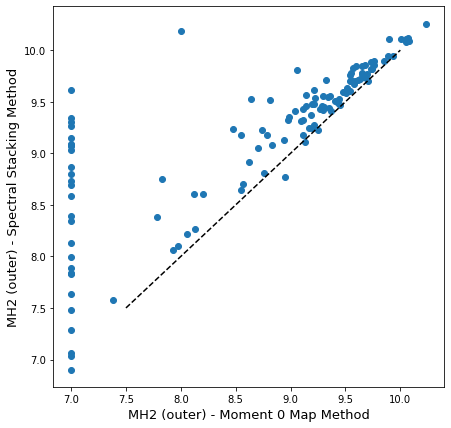

In [33]:
M_H2_outer2 = M_H2_outer.copy()
M_H2_outer2[M_H2_outer2<0] = 7

plt.figure(figsize = (7,7))
plt.scatter(M_H2_outer2, M_H2_outer_stacked)
plt.plot([7.5,10], [7.5,10], 'k--')
plt.xlabel('MH2 (outer) - Moment 0 Map Method', fontsize = 13)
plt.ylabel('MH2 (outer) - Spectral Stacking Method', fontsize = 13)
plt.show()

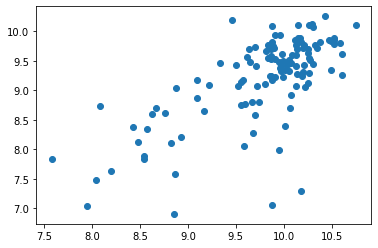

In [34]:
plt.scatter(mass_fib[idx_tab][table_gas], M_H2_outer_stacked[gas])

(array([51., 23., 17., 18.,  8.,  1.,  2.,  1.,  2.,  3.]),
 array([0.        , 0.03327931, 0.06655861, 0.09983792, 0.13311723,
        0.16639654, 0.19967584, 0.23295515, 0.26623446, 0.29951376,
        0.33279307]),
 <BarContainer object of 10 artists>)

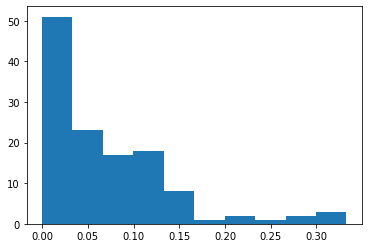

In [35]:
plt.hist(fgas_inner)

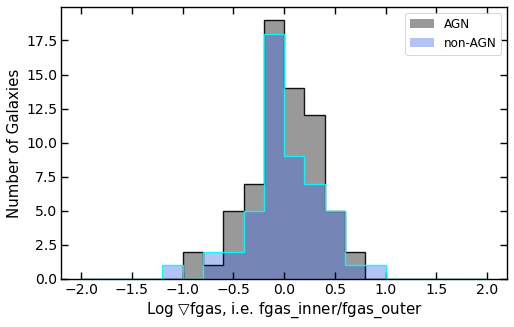

In [36]:
fig, ax1 = plt.subplots(1,1, figsize = (8,5))


ax1.hist(np.log10(fgas_inner_stacked[agn_mask[table_gas]]/fgas_outer_stacked[agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(np.log10(fgas_inner_stacked[agn_mask[table_gas]]/fgas_outer_stacked[agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)

ax1.hist(np.log10(fgas_inner_stacked[~agn_mask[table_gas]]/fgas_outer_stacked[~agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'royalblue', alpha = 0.4, label = 'non-AGN')
ax1.hist(np.log10(fgas_inner_stacked[~agn_mask[table_gas]]/fgas_outer_stacked[~agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


#ax1.hist(grad_ssfr[is_control], range = [-2,3], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
#ax1.hist(grad_ssfr[is_control], range = [-2,3], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


'''
ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)
'''

ax1.set_xlabel('Log $\\bigtriangledown$fgas, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)



ax1.legend(fancybox = True, fontsize = 12)

for ax in [ax1]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


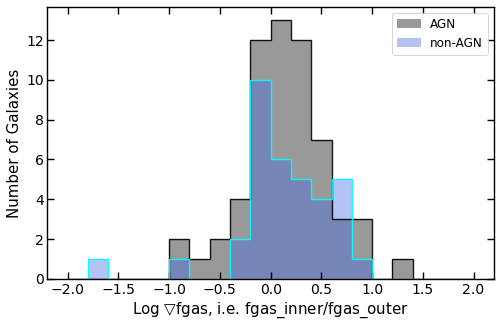

In [37]:
fig, ax1 = plt.subplots(1,1, figsize = (8,5))


ax1.hist(np.log10(fgas_inner[agn_mask[table_gas]]/fgas_outer[agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(np.log10(fgas_inner[agn_mask[table_gas]]/fgas_outer[agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)

ax1.hist(np.log10(fgas_inner[~agn_mask[table_gas]]/fgas_outer[~agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'royalblue', alpha = 0.4, label = 'non-AGN')
ax1.hist(np.log10(fgas_inner[~agn_mask[table_gas]]/fgas_outer[~agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


#ax1.hist(grad_ssfr[is_control], range = [-2,3], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
#ax1.hist(grad_ssfr[is_control], range = [-2,3], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


'''
ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)
'''

ax1.set_xlabel('Log $\\bigtriangledown$fgas, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)



ax1.legend(fancybox = True, fontsize = 12)

for ax in [ax1]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

NameError: name 'grad_ssfr' is not defined

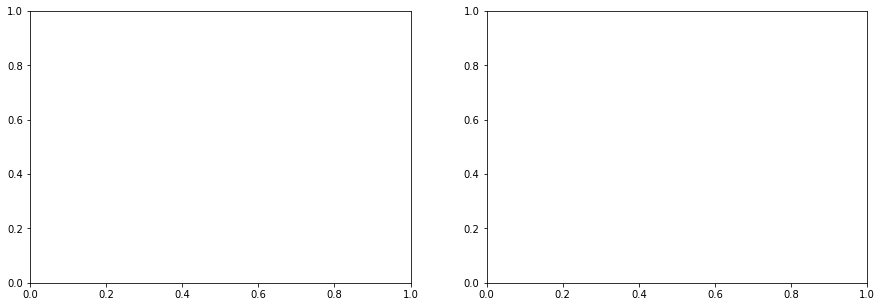

In [41]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,5))


ax1.hist(grad_ssfr[agn_mask], range = [-2,3], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(grad_ssfr[agn_mask], range = [-2,3], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)

ax1.set_xlabel('Log $\\bigtriangledown$sSFR, i.e. sSFR_inner/sSFR_outer', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)

ax2.hist(np.log10(fgas_inner/fgas_outer), range = [-2,3], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax2.hist(np.log10(fgas_inner/fgas_outer), range = [-2,3], bins = 20, color = 'k',alpha = 0.9, histtype = 'step', lw = 1.4)

ax2.set_xlabel('Log $\\bigtriangledown f_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax2.set_xlabel('Log $\\bigtriangledown f_{gas}$, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax2.set_ylabel('Number of Galaxies', fontsize = 15)

ax1.legend(fancybox = True, fontsize = 12)
ax2.legend(fancybox = True, fontsize = 12)

for ax in [ax1,ax2]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

## Visualize Sample and Abstracts

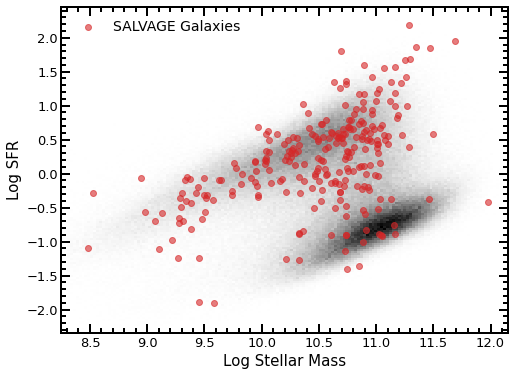

In [226]:
fig, ax = plt.subplots(1,1,figsize = (8,6))

plt.hist2d(mass_tot, sfr_tot, range = [[8.3,12.1], [-2.3,2.4]], cmap = 'gray_r', bins = 150)
plt.scatter(mass_tot[idx_tab], sfr_tot[idx_tab], alpha = 0.6, color = 'tab:red', label = 'SALVAGE Galaxies')

ax.set_xticks(np.arange(8.5, 12.5, 0.5))
ax.set_xticks(np.arange(8.2,12.2,0.1), minor = True)
ax.set_yticks(np.arange(-2.5,3,0.5))
ax.set_yticks(np.arange(-2.5,3,0.1), minor = True)
ax.set_xlim(8.25,12.15)
ax.set_ylim(-2.35, 2.45)


ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 2, labelsize = 13)
ax.tick_params(axis = 'both', which = 'major', length = 9)
ax.tick_params(axis = 'both', which = 'minor', length = 5)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)  
    
    
ax.set_xlabel('Log Stellar Mass', fontsize = 15)
ax.set_ylabel('Log SFR', fontsize = 15)
ax.legend(fancybox = True, frameon = False, fontsize = 14)

plt.savefig('./SALVAGE-sample_sfr_mstar-July8.png', bbox_inches = 'tight', dpi = 200)

plt.show()

In [39]:
fpath = './'
file  =  'salvage-July15-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.txt'

objID_sample, year_sample, muid_sample, proj_sample, name_sample = np.loadtxt(fpath+file, unpack = True, dtype = str, usecols = [0,9,10,11,12])
z_sample, mass_sample, rpetro_sample, ra_sample, dec_sample, res_sample, mrs_sample, sens_sample = np.loadtxt(fpath+file, unpack = True, dtype = float, usecols = [1,2,3,4,5,6,7,8])

In [40]:
matched, idx_tab, idx_sam = np.intersect1d(table_id, objID_sample, return_indices = True)

In [42]:
file = 'salvage-AGN-July8-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'

objID = np.loadtxt(file, dtype = str, usecols = [0], unpack = True)
M_H2, M_H2_err, M_H2_inner, M_H2_inner_err, M_H2_outer, M_H2_outer_err, M_H2_inner_stacked, M_H2_outer_stacked = np.loadtxt(file, dtype = float, usecols = [1,2,3,4,5,6,7,8], unpack = True)

In [41]:
file = 'salvage-AGN-July23-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'

objID = np.loadtxt(file, dtype = str, usecols = [0], unpack = True)
M_H2, M_H2_err, M_H2_inner, M_H2_inner_err, M_H2_outer, M_H2_outer_err, M_H2_inner_stacked, M_H2_outer_stacked, f_inner, f_outer = np.loadtxt(file, dtype = float, usecols = [1,2,3,4,5,6,7,8,9,10], unpack = True)

In [42]:
matched, table_gas, gas = np.intersect1d(table_id[idx_tab], objID, return_indices = True)

In [43]:
M_H2_inner2 = M_H2_inner.copy()
M_H2_inner2[M_H2_inner<0] = 0

M_H2_outer2 = M_H2_outer.copy()
M_H2_outer2[M_H2_outer<0] = 0

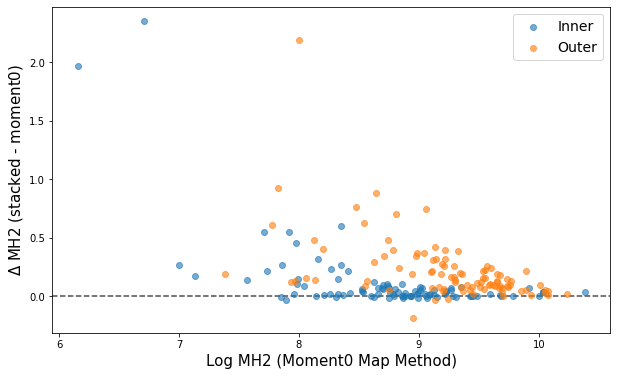

In [44]:
plt.figure(figsize = (10,6))
plt.scatter(M_H2_inner, M_H2_inner_stacked - M_H2_inner, alpha = 0.6, label = 'Inner')
plt.scatter(M_H2_outer, M_H2_outer_stacked - M_H2_outer, alpha = 0.6, label = 'Outer')
plt.axhline(ls = '--', color = 'k' ,zorder = -1, alpha = 0.7)
plt.ylabel('$\Delta$ MH2 (stacked - moment0)', fontsize = 15)
plt.xlabel('Log MH2 (Moment0 Map Method)', fontsize = 15)
plt.legend(fancybox = True, fontsize = 14)
plt.show()

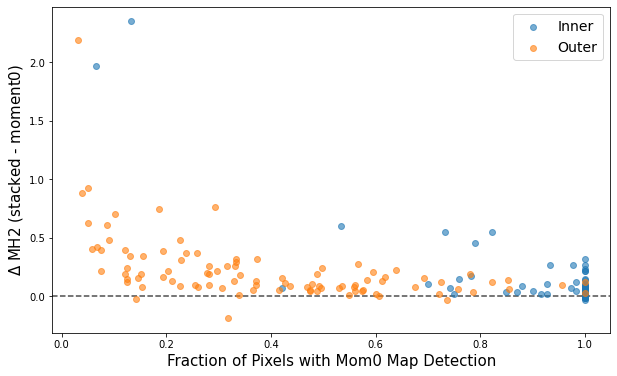

In [45]:
plt.figure(figsize = (10,6))
plt.scatter(f_inner, M_H2_inner_stacked - M_H2_inner, alpha = 0.6, label = 'Inner')
plt.scatter(f_outer, M_H2_outer_stacked - M_H2_outer, alpha = 0.6, label = 'Outer')
plt.axhline(ls = '--', color = 'k' ,zorder = -1, alpha = 0.7)
plt.ylabel('$\Delta$ MH2 (stacked - moment0)', fontsize = 15)
plt.xlabel('Fraction of Pixels with Mom0 Map Detection', fontsize = 15)
plt.legend(fancybox = True, fontsize = 14)
plt.show()

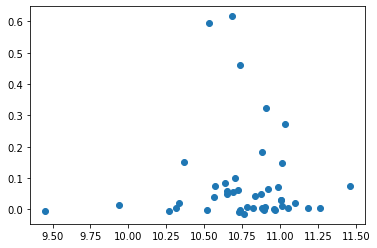

In [22]:
plt.scatter(mass_tot[idx_tab][table_gas], M_H2_inner_stacked[gas] - M_H2_inner[gas])

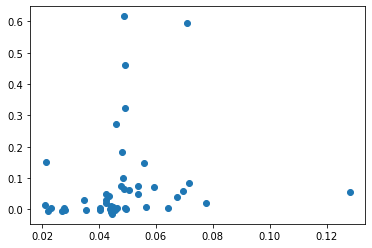

In [16]:
plt.scatter(z_sample[idx_sam][table_gas], M_H2_inner_stacked[gas] - M_H2_inner[gas])

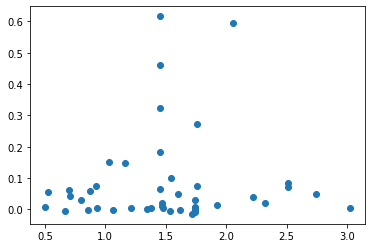

In [19]:
plt.scatter(sens_sample[idx_sam][table_gas], M_H2_inner_stacked[gas] - M_H2_inner[gas])

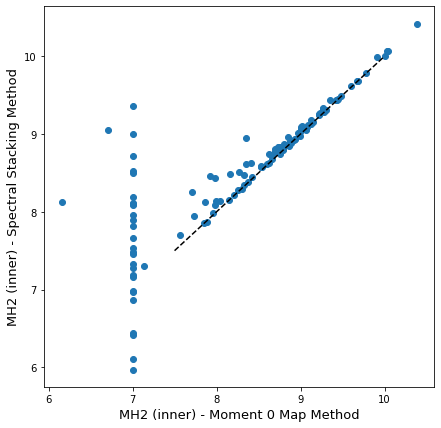

In [46]:
M_H2_inner2 = M_H2_inner.copy()
M_H2_inner2[M_H2_inner2<0] = 7

plt.figure(figsize = (7,7))
plt.scatter(M_H2_inner2, M_H2_inner_stacked)
plt.plot([7.5,10], [7.5,10], 'k--')
plt.xlabel('MH2 (inner) - Moment 0 Map Method', fontsize = 13)
plt.ylabel('MH2 (inner) - Spectral Stacking Method', fontsize = 13)
plt.show()

In [51]:
print(len(year_sample[year_sample<=2013]), len(year_sample[year_sample<=2013])/len(year_sample))

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'int'

In [52]:
len(year_sample)

279

In [53]:
len(year_sample[year_sample<=2013])

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'int'

(array([ 0.,  3., 10., 26., 27., 19., 13.,  0.,  1.,  0.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

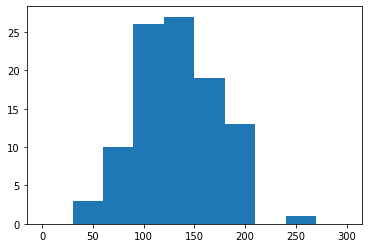

In [33]:
plt.hist(vdisp[idx_tab], range = [0,300])

In [24]:
file = 'salvage-AGN-July23-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'

objID = np.loadtxt(file, dtype = str, usecols = [0], unpack = True)
M_H2, M_H2_err, M_H2_inner, M_H2_inner_err, M_H2_outer, M_H2_outer_err, M_H2_inner_stacked, M_H2_outer_stacked, f_inner, f_outer = np.loadtxt(file, dtype = float, usecols = [1,2,3,4,5,6,7,8,9,10], unpack = True)

## July 31 -- Stackarator first results

In [126]:
file = 'salvage-AGN-July31-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'

objID = np.loadtxt(file, dtype = str, usecols = [0], unpack = True)
M_H2_inner, M_H2_inner_err, M_H2_outer, M_H2_outer_err = np.loadtxt(file, dtype = float, usecols = [1,2,3,4], unpack = True)

In [127]:
matched, table_gas, gas = np.intersect1d(table_id[idx_tab], objID, return_indices = True)

In [128]:
fgas_inner = 10**M_H2_inner[gas] / (10**mass_fib[idx_tab][table_gas] + 10**M_H2_inner[gas])
fgas_outer = 10**M_H2_outer[gas] / (10**mass_tot[idx_tab][table_gas]-10**mass_fib[idx_tab][table_gas] + 10**M_H2_outer[gas])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(array([29., 37., 12., 14.,  3.,  1.,  2.,  2.,  1.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

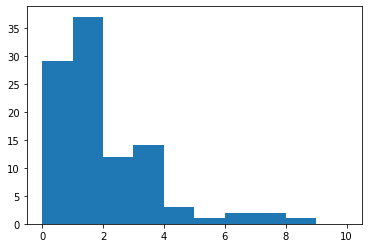

In [129]:
plt.hist(fgas_inner/fgas_outer, range = [0,10])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


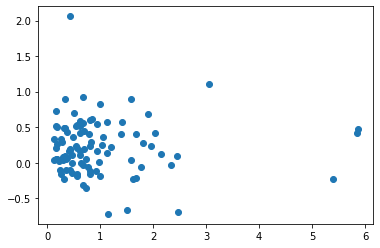

In [131]:
plt.scatter(OIII_flux[idx_tab][table_gas]/Hb_flux[idx_tab][table_gas], np.log10(fgas_inner/fgas_outer))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


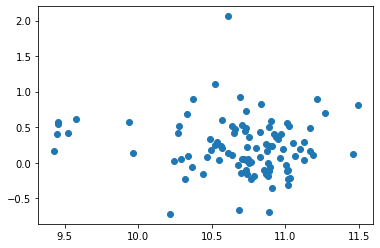

In [132]:
plt.scatter(mass_tot[idx_tab][table_gas], np.log10(fgas_inner/fgas_outer))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


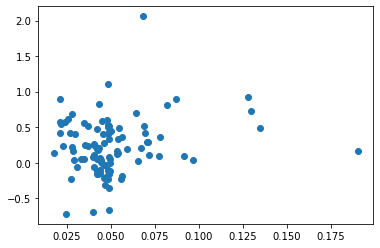

In [134]:
plt.scatter(z_sdss[idx_tab][table_gas], np.log10(fgas_inner/fgas_outer))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


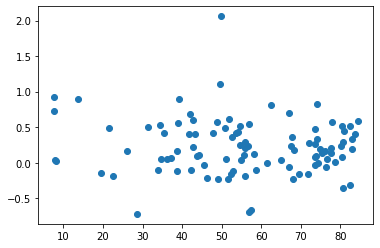

In [135]:
plt.scatter(incl[idx_tab][table_gas], np.log10(fgas_inner/fgas_outer))

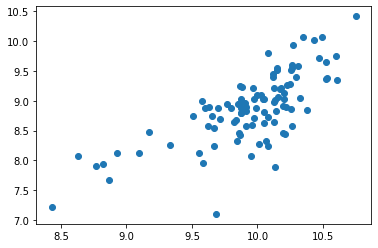

In [137]:
plt.scatter(mass_fib[idx_tab][table_gas], M_H2_inner[gas])

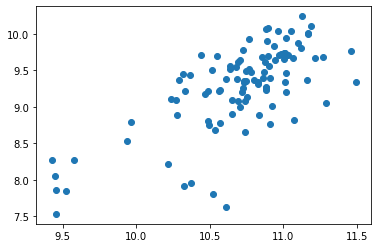

In [138]:
plt.scatter(mass_tot[idx_tab][table_gas], M_H2_outer[gas])

(array([58., 23., 23., 15., 10.,  7.,  1.,  1.,  1.,  4.]),
 array([0.        , 0.0347557 , 0.0695114 , 0.1042671 , 0.13902281,
        0.17377851, 0.20853421, 0.24328991, 0.27804561, 0.31280131,
        0.34755701]),
 <BarContainer object of 10 artists>)

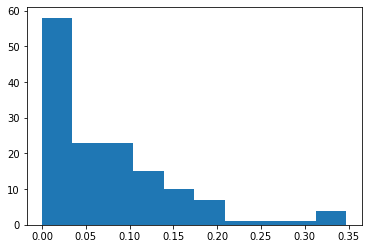

In [139]:
plt.hist(fgas_inner)

(array([55., 23., 18., 19.,  9.,  5.,  6.,  5.,  2.,  1.]),
 array([0.        , 0.0189118 , 0.03782361, 0.05673541, 0.07564721,
        0.09455901, 0.11347082, 0.13238262, 0.15129442, 0.17020622,
        0.18911803]),
 <BarContainer object of 10 artists>)

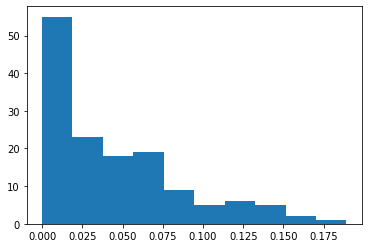

In [140]:
plt.hist(fgas_outer)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encount

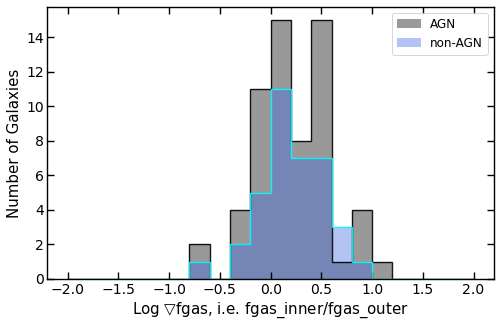

In [141]:
fig, ax1 = plt.subplots(1,1, figsize = (8,5))


ax1.hist(np.log10(fgas_inner[agn_mask[table_gas]]/fgas_outer[agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'k', alpha = 0.4, label = 'AGN')
ax1.hist(np.log10(fgas_inner[agn_mask[table_gas]]/fgas_outer[agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'k', alpha = 0.9, histtype = 'step', lw = 1.4)

ax1.hist(np.log10(fgas_inner[~agn_mask[table_gas]]/fgas_outer[~agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'royalblue', alpha = 0.4, label = 'non-AGN')
ax1.hist(np.log10(fgas_inner[~agn_mask[table_gas]]/fgas_outer[~agn_mask[table_gas]]), range = [-2,2], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


#ax1.hist(grad_ssfr[is_control], range = [-2,3], bins = 20, color = 'royalblue', alpha = 0.4, label = 'Non-AGN Controls')
#ax1.hist(grad_ssfr[is_control], range = [-2,3], bins = 20, color = 'cyan', alpha = 0.9, histtype = 'step', lw = 1.4)


'''
ax1.set_xticks(np.arange(9,12.5,0.5))
ax1.set_xticks(np.arange(9,12,0.1), minor = True)
ax1.set_xlim(9, 12)
ax1.set_yticks(np.arange(0,20,5))
ax1.set_yticks(np.arange(0,20,1), minor = True)
ax1.set_ylim(0, 17)
'''

ax1.set_xlabel('Log $\\bigtriangledown$fgas, i.e. fgas_inner/fgas_outer', fontsize = 15)
ax1.set_ylabel('Number of Galaxies', fontsize = 15)



ax1.legend(fancybox = True, fontsize = 12)

for ax in [ax1]:

    ax.tick_params('both', direction='in', which = 'both', top = True, right = True, width = 1.4, labelsize = 14)
    ax.tick_params(axis = 'both', which = 'major', length = 7)
    ax.tick_params(axis = 'both', which = 'minor', length = 4)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.4)

plt.show()

In [146]:
file = 'salvage-AGN-July31-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups (1).out'

objID1 = np.loadtxt(file, dtype = str, usecols = [0], unpack = True)
M_H2_inner_stackarator, M_H2_inner_stackarator_err, M_H2_outer_stackarator, M_H2_outer_stackarator_err = np.loadtxt(file, dtype = float, usecols = [1,2,3,4], unpack = True)

In [147]:
file = 'salvage-AGN-July23-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'

objID2 = np.loadtxt(file, dtype = str, usecols = [0], unpack = True)
M_H2, M_H2_err, M_H2_inner, M_H2_inner_err, M_H2_outer, M_H2_outer_err, M_H2_inner_stacked, M_H2_outer_stacked, f_inner, f_outer = np.loadtxt(file, dtype = float, usecols = [1,2,3,4,5,6,7,8,9,10], unpack = True)

In [148]:
matched, idx_stackarator, idx_int = np.intersect1d(objID1, objID2, return_indices = True)

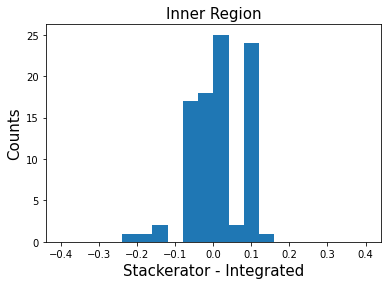

In [73]:
plt.hist(M_H2_inner_stackarator[idx_stackarator] - M_H2_inner_stacked[idx_int], range = [-0.4,0.4], bins = 20)
plt.xlabel('Stackerator - Integrated', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Inner Region', fontsize = 15)
plt.show()

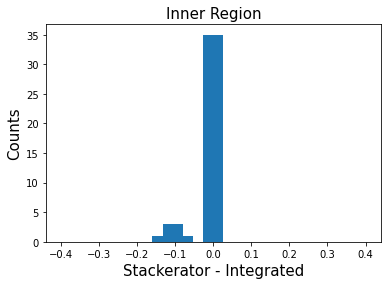

In [149]:
plt.hist(M_H2_inner_stackarator[idx_stackarator] - M_H2_inner_stacked[idx_int], range = [-0.4,0.4], bins = 30)
plt.xlabel('Stackerator - Integrated', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Inner Region', fontsize = 15)
plt.show()

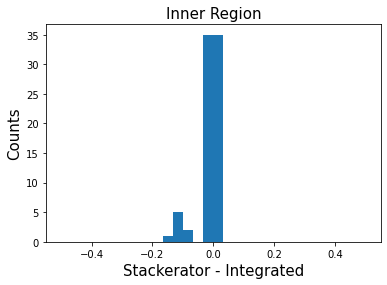

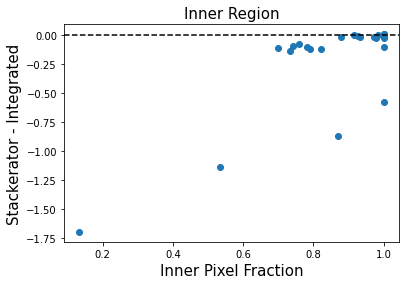

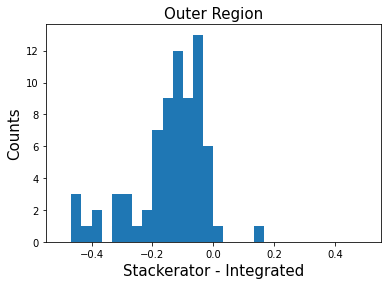

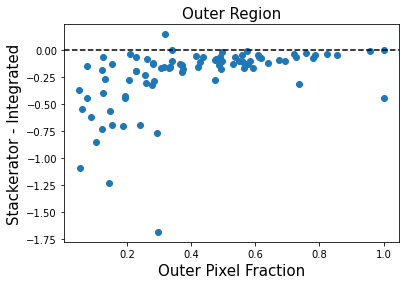

In [150]:
plt.hist(M_H2_inner_stackarator[idx_stackarator] - M_H2_inner_stacked[idx_int], range = [-0.5,0.5], bins = 30)
plt.xlabel('Stackerator - Integrated', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Inner Region', fontsize = 15)
plt.show()

plt.scatter(f_inner[idx_int], M_H2_inner_stackarator[idx_stackarator] - M_H2_inner_stacked[idx_int])
plt.axhline(ls = '--', color = 'k')
plt.ylabel('Stackerator - Integrated', fontsize = 15)
plt.xlabel('Inner Pixel Fraction', fontsize = 15)
plt.title('Inner Region', fontsize = 15)
plt.show()

plt.hist(M_H2_outer_stackarator[idx_stackarator] - M_H2_outer_stacked[idx_int], range = [-0.5,0.5], bins = 30)
plt.xlabel('Stackerator - Integrated', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Outer Region', fontsize = 15)
plt.show()

plt.scatter(f_outer[idx_int], M_H2_outer_stackarator[idx_stackarator] - M_H2_outer_stacked[idx_int])
plt.axhline(ls = '--', color = 'k')
plt.ylabel('Stackerator - Integrated', fontsize = 15)
plt.xlabel('Outer Pixel Fraction', fontsize = 15)
plt.title('Outer Region', fontsize = 15)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


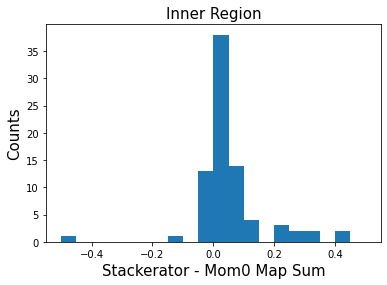

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


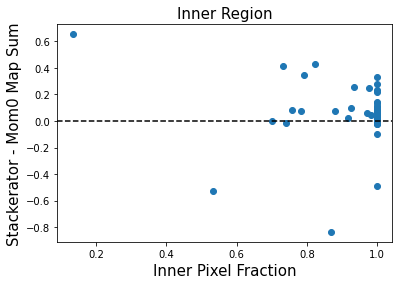

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


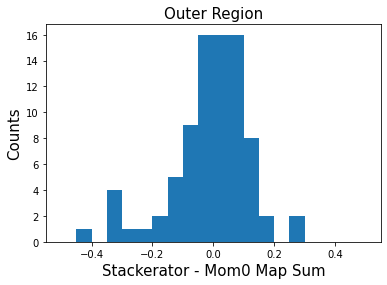

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


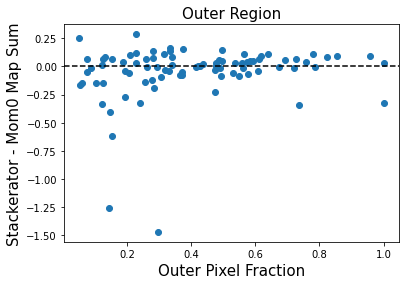

In [151]:
plt.hist(M_H2_inner_stackarator[idx_stackarator] - M_H2_inner[idx_int], range = [-0.5,0.5], bins = 20)
plt.xlabel('Stackerator - Mom0 Map Sum', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Inner Region', fontsize = 15)
plt.show()

plt.scatter(f_inner[idx_int], M_H2_inner_stackarator[idx_stackarator] - M_H2_inner[idx_int])
plt.axhline(ls = '--', color = 'k')
plt.ylabel('Stackerator - Mom0 Map Sum', fontsize = 15)
plt.xlabel('Inner Pixel Fraction', fontsize = 15)
plt.title('Inner Region', fontsize = 15)
plt.show()

plt.hist(M_H2_outer_stackarator[idx_stackarator] - M_H2_outer[idx_int], range = [-0.5,0.5], bins = 20)
plt.xlabel('Stackerator - Mom0 Map Sum', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Outer Region', fontsize = 15)
plt.show()

plt.scatter(f_outer[idx_int], M_H2_outer_stackarator[idx_stackarator] - M_H2_outer[idx_int])
plt.axhline(ls = '--', color = 'k')
plt.ylabel('Stackerator - Mom0 Map Sum', fontsize = 15)
plt.xlabel('Outer Pixel Fraction', fontsize = 15)
plt.title('Outer Region', fontsize = 15)
plt.show()

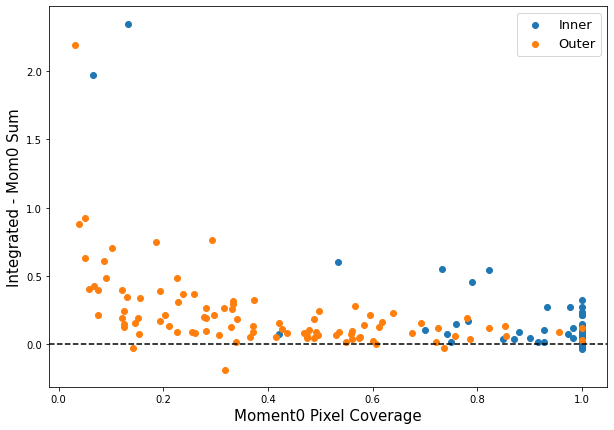

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


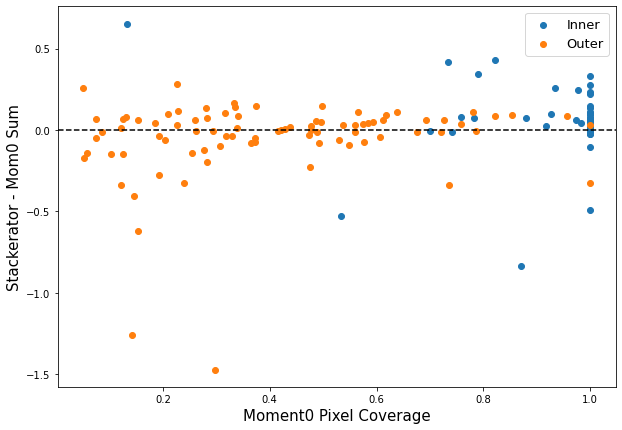

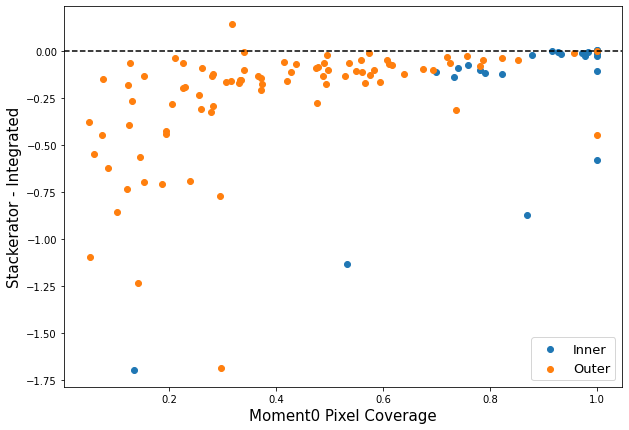

In [160]:
plt.figure(figsize = (10,7))
plt.scatter(f_inner, M_H2_inner_stacked - M_H2_inner, label = 'Inner')
plt.scatter(f_outer, M_H2_outer_stacked - M_H2_outer, label = 'Outer')
plt.axhline(ls = '--', color = 'k')
plt.legend(fancybox = True, fontsize = 13)
plt.ylabel('Integrated - Mom0 Sum', fontsize = 15)
plt.xlabel('Moment0 Pixel Coverage', fontsize = 15)
plt.show()

plt.figure(figsize = (10,7))
plt.scatter(f_inner[idx_int], M_H2_inner_stackarator[idx_stackarator] - M_H2_inner[idx_int], label = 'Inner')
plt.scatter(f_outer[idx_int], M_H2_outer_stackarator[idx_stackarator] - M_H2_outer[idx_int], label = 'Outer')
plt.axhline(ls = '--', color = 'k')
plt.legend(fancybox = True, fontsize = 13)
plt.ylabel('Stackerator - Mom0 Sum', fontsize = 15)
plt.xlabel('Moment0 Pixel Coverage', fontsize = 15)
plt.show()

plt.figure(figsize = (10,7))
plt.scatter(f_inner[idx_int], M_H2_inner_stackarator[idx_stackarator] - M_H2_inner_stacked[idx_int], label = 'Inner')
plt.scatter(f_outer[idx_int], M_H2_outer_stackarator[idx_stackarator] - M_H2_outer_stacked[idx_int], label = 'Outer')
plt.axhline(ls = '--', color = 'k')
plt.legend(fancybox = True, fontsize = 13)
plt.ylabel('Stackerator - Integrated', fontsize = 15)
plt.xlabel('Moment0 Pixel Coverage', fontsize = 15)
plt.show()
